## 2nd Project | Trading

###  Instructions
- Follow a Python Project structure.
- Work with a training and validation dataset to optimize & test your trading strategies using the datasets provided in the introduction section.
- Select n technical indicators (one for each team member).
- For each timeframe train/test files (1d, 1h, 5m, 1m):
    - Define buy/sell signals for each indicator.
    - Create all possible combinations of all technical indicators (2^n - 1).
    - Backtest the strategies while keeping track of the operations and cash/portfolio value time series, remember that we'll be opening long & short positions.
    - Optimize all technical indicator's parameters (TPE, Grid Search, PSO, Genetic Algorithms, ...), stop-loss/take-profit, volume of the trade, maximizing the profit of the strategy with the training dataset, consider the bounds of each variable!
    - Select the optimal strategy and describe it thoroughly (what indicators are used, when is the trade signal produced, etc.).
    - Now, use the optimal strategy with the test dataset and compare it to a passive strategy.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
from utils import TradingStrategy, Operation

data = pd.read_csv('data/aapl_5m_train.csv')

data = data.dropna()

rsi_data = ta.momentum.RSIIndicator(close = data.Close, window= 14)
data['RSI'] = rsi_data.rsi()

short_ma  = ta.trend.SMAIndicator(data.Close, window=5)
long_ma  = ta.trend.SMAIndicator(data.Close, window=21)
data["SHORT_SMA"] = short_ma.sma_indicator()
data["LONG_SMA"] = long_ma.sma_indicator()

macd = ta.trend.MACD(close=data['Close'], window_slow=26, window_fast=12, window_sign=9)
data['MACD'] = macd.macd()
data['Signal_Line'] = macd.macd_signal()

data['SAR'] = ta.trend.PSARIndicator(data['High'], data['Low'], data['Close'], step=0.02, max_step=0.2).psar()

adx_indicator = ta.trend.ADXIndicator(high=data['High'], low=data['Low'], close=data['Close'], window=14)
data['ADX'] = adx_indicator.adx()
data['+DI'] = adx_indicator.adx_pos()
data['-DI'] = adx_indicator.adx_neg()
data['prev_DI+'] = data['+DI'].shift(1)
data['prev_DI-'] = data['-DI'].shift(1)

data = data.dropna()

In [7]:
data.head(8)

,Unnamed: 0,Timestamp,Gmtoffset,Datetime,Open,High,Low,Close,Volume,RSI,SHORT_SMA,LONG_SMA,MACD,Signal_Line,SAR,ADX,+DI,-DI,prev_DI+,prev_DI-
33,33,1609780500,0,2021-01-04 17:15:00,127.410003,128.029998,126.760002,128.005004,2891333.0,26.712155,128.233343,129.705785,-0.872535,-0.728380,128.770004,73.503071,3.365347,46.382888,3.964850,45.666999
34,34,1609780800,0,2021-01-04 17:20:00,128.000793,128.399993,127.750000,128.289993,1956101.0,31.714234,128.127340,129.571257,-0.856193,-0.753943,126.760002,73.269762,7.485484,42.814693,3.365347,46.382888
35,35,1609781100,0,2021-01-04 17:25:00,128.289993,128.320007,127.889999,128.250000,1331407.0,31.390449,128.061340,129.438161,-0.836823,-0.770519,126.760002,73.053118,7.096538,40.590038,7.485484,42.814693
36,36,1609781400,0,2021-01-04 17:30:00,128.246902,128.310104,127.910003,128.119995,1314757.0,30.307246,128.014999,129.312928,-0.822481,-0.780911,126.792802,72.851949,6.745340,38.581294,7.096538,40.590038
37,37,1609781700,0,2021-01-04 17:35:00,128.125000,128.210006,127.889999,127.955001,982464.0,28.942233,128.123999,129.181748,-0.815033,-0.787736,126.824946,72.677574,6.469565,37.259515,6.745340,38.581294
38,38,1609782000,0,2021-01-04 17:40:00,127.950103,128.020004,127.720001,127.980003,1238030.0,29.460690,128.118998,129.037938,-0.797916,-0.789772,126.856447,72.622961,6.213110,38.028769,6.469565,37.259515
39,39,1609782300,0,2021-01-04 17:45:00,127.985000,127.985000,127.650001,127.710098,910041.0,27.157098,128.003019,128.914134,-0.796942,-0.791206,126.887318,72.616422,5.930412,37.249204,6.213110,38.028769
40,40,1609782600,0,2021-01-04 17:50:00,127.709999,128.289993,127.630096,128.229995,1161917.0,37.323323,127.999018,128.836195,-0.745625,-0.782089,126.917571,71.456349,9.476813,33.970286,5.930412,37.249204


### RSI

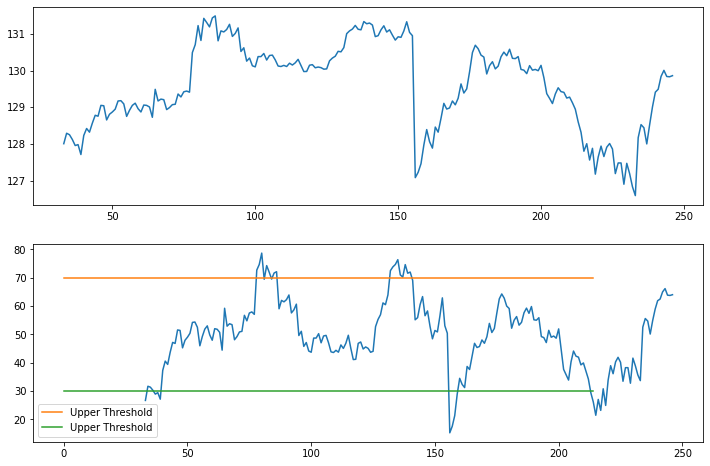

In [3]:
fig, axs = plt.subplots(2, 1, figsize = (12,8))


axs[0].plot(data.Close[:214])


axs[1].plot(data.RSI[:214])
axs[1].plot([0, 214], [70,70], label = "Upper Threshold")
axs[1].plot([0, 214], [30,30], label = "Upper Threshold")
plt.legend()

33 buy
37 buy
38 buy
39 buy
78 sell
79 sell
80 sell
82 sell
83 sell
85 sell
86 sell
132 sell
133 sell
134 sell
135 sell
136 sell
137 sell
138 sell
139 sell
140 sell
156 buy
157 buy
158 buy
159 buy
213 buy
214 buy
215 buy
216 buy
217 buy
219 buy
251 sell
252 sell
253 sell
304 sell
305 sell
306 sell
309 sell
312 sell
390 buy
391 buy
393 buy
394 buy
499 buy
500 buy
501 buy
502 buy
550 sell
560 sell
561 sell
565 sell
627 buy
628 buy
629 buy
630 buy
631 buy
693 buy
766 buy
767 buy
768 buy
769 buy
774 buy
775 buy
776 buy
778 buy
779 buy
858 sell
859 sell
860 sell
861 sell
862 sell
863 sell
864 sell
865 sell
866 sell
867 sell
868 sell
869 sell
870 sell
871 sell
872 sell
873 sell
874 sell
875 sell
876 sell
878 sell
879 sell
880 sell
881 sell
882 sell
883 sell
884 sell
885 sell
886 sell
887 sell
888 sell
889 sell
892 sell
936 sell
937 sell
938 sell
939 sell
940 sell
941 sell
942 sell
943 sell
944 sell
945 sell
946 sell
947 sell
948 sell
949 sell
950 sell
951 sell
952 sell
953 sell
954 sell
955 

8659 sell
8685 sell
8686 sell
8687 sell
8688 sell
8689 sell
8690 sell
8693 sell
8694 sell
8695 sell
8698 sell
8699 sell
8700 sell
8701 sell
8705 sell
8706 sell
8707 sell
8708 sell
8728 sell
8742 sell
8744 sell
8745 sell
8746 sell
8846 sell
8896 buy
8899 buy
8904 buy
8930 sell
8931 sell
8932 sell
8933 sell
8934 sell
8935 sell
8936 sell
8937 sell
8944 sell
8945 sell
8946 sell
8947 sell
8948 sell
9000 buy
9004 buy
9079 buy
9080 buy
9082 buy
9111 sell
9112 sell
9130 sell
9131 sell
9180 sell
9197 sell
9198 sell
9224 sell
9225 sell
9226 sell
9227 sell
9228 sell
9229 sell
9230 sell
9355 buy
9356 buy
9357 buy
9359 buy
9361 buy
9474 sell
9475 sell
9476 sell
9477 sell
9478 sell
9479 sell
9480 sell
9481 sell
9482 sell
9483 sell
9484 sell
9485 sell
9486 sell
9487 sell
9488 sell
9489 sell
9490 sell
9557 sell
9558 sell
9565 sell
9566 sell
9567 sell
9568 sell
9569 sell
9570 sell
9572 sell
9588 sell
9704 sell
9712 buy
9733 buy
9788 sell
9790 sell
9791 sell
9792 sell
9793 sell
9794 sell
9795 sell
9796 

15683 sell
15699 sell
15700 sell
15701 sell
15702 sell
15703 sell
15704 sell
15705 sell
15706 sell
15708 sell
15714 sell
15715 sell
15718 sell
15719 sell
15720 sell
15721 sell
15722 sell
15723 sell
15724 sell
15725 sell
15726 sell
15729 sell
15730 sell
15731 sell
15732 sell
15733 sell
15796 sell
15839 buy
15840 buy
15841 buy
15870 sell
15903 buy
15938 sell
15941 sell
15942 sell
15943 sell
15944 sell
15945 sell
15946 sell
15947 sell
15948 sell
15949 sell
15951 sell
15952 sell
15953 sell
15955 sell
16109 sell
16110 sell
16111 sell
16256 buy
16257 buy
16267 sell
16268 sell
16269 sell
16270 sell
16271 sell
16272 sell
16273 sell
16274 sell
16275 sell
16276 sell
16277 sell
16278 sell
16279 sell
16280 sell
16281 sell
16282 sell
16283 sell
16284 sell
16285 sell
16286 sell
16287 sell
16288 sell
16289 sell
16290 sell
16292 sell
16293 sell
16346 buy
16347 buy
16348 buy
16349 buy
16350 buy
16351 buy
16352 buy
16353 buy
16354 buy
16355 buy
16356 buy
16357 buy
16358 buy
16359 buy
16360 buy
16361 buy

23093 buy
23106 buy
23107 buy
23108 buy
23112 buy
23113 buy
23115 buy
23116 buy
23117 buy
23118 buy
23119 buy
23120 buy
23121 buy
23122 buy
23123 buy
23124 buy
23125 buy
23126 buy
23127 buy
23128 buy
23259 buy
23262 buy
23273 buy
23274 buy
23275 buy
23295 sell
23299 sell
23300 sell
23301 sell
23302 sell
23304 sell
23305 sell
23420 buy
23421 buy
23422 buy
23423 buy
23424 buy
23425 buy
23426 buy
23427 buy
23428 buy
23431 buy
23432 buy
23433 buy
23436 buy
23438 buy
23439 buy
23440 buy
23441 buy
23442 buy
23443 buy
23444 buy
23445 buy
23460 buy
23461 buy
23462 buy
23522 buy
23523 buy
23524 buy
23530 buy
23531 buy
23578 buy
23579 buy
23580 buy
23581 buy
23582 buy
23583 buy
23584 buy
23609 buy
23620 buy
23621 buy
23681 sell
23682 sell
23683 sell
23684 sell
23726 sell
23727 sell
23730 sell
23733 sell
23736 sell
23737 sell
23738 sell
23739 sell
23740 sell
23741 sell
23742 sell
23745 sell
23746 sell
23747 sell
23748 sell
23749 sell
23751 sell
23753 sell
23791 buy
23792 buy
23796 buy
23813 sell


30554 sell
30645 sell
30646 sell
30647 sell
30831 buy
30832 buy
30833 buy
30848 buy
30858 buy
30874 buy
30875 buy
30878 buy
30926 sell
30927 sell
30928 sell
30929 sell
30930 sell
30931 sell
30932 sell
30933 sell
30934 sell
30935 sell
30936 sell
30987 sell
30989 sell
30991 sell
30993 sell
30994 sell
30995 sell
30996 sell
30997 sell
30998 sell
30999 sell
31000 sell
31001 sell
31083 sell
31084 sell
31085 sell
31086 sell
31087 sell
31088 sell
31089 sell
31090 sell
31091 sell
31092 sell
31093 sell
31094 sell
31095 sell
31096 sell
31097 sell
31098 sell
31162 buy
31210 buy
31213 buy
31214 buy
31245 buy
31289 buy
31290 buy
31292 buy
31321 sell
31324 sell
31325 sell
31326 sell
31327 sell
31328 sell
31329 sell
31330 sell
31331 sell
31338 sell
31339 sell
31340 sell
31341 sell
31342 sell
31345 sell
31346 sell
31347 sell
31348 sell
31349 sell
31356 sell
31357 sell
31358 sell
31359 sell
31360 sell
31361 sell
31362 sell
31363 sell
31364 sell
31377 sell
31478 buy
31501 buy
31557 sell
31558 sell
31559 

37403 buy
37404 buy
37405 buy
37413 buy
37415 buy
37416 buy
37417 buy
37418 buy
37438 buy
37484 buy
37485 buy
37486 buy
37515 sell
37526 sell
37527 sell
37530 sell
37531 sell
37532 sell
37533 sell
37534 sell
37535 sell
37536 sell
37562 sell
37563 sell
37564 sell
37565 sell
37566 sell
37571 sell
37572 sell
37573 sell
37574 sell
37575 sell
37577 sell
37578 sell
37589 buy
37590 buy
37591 buy
37601 buy
37602 buy
37605 buy
37615 sell
37640 buy
37641 buy
37642 buy
37643 buy
37664 buy
37665 buy
37683 buy
37684 buy
37686 buy
37687 buy
37688 buy
37689 buy
37690 buy
37691 buy
37692 buy
37693 buy
37694 buy
37695 buy
37696 buy
37698 buy
37699 buy
37700 buy
37701 buy
37735 buy
37736 buy
37737 buy
37738 buy
37739 buy
37740 buy
37741 buy
37742 buy
37807 buy
37808 buy
37809 buy
37810 buy
37843 sell
37890 sell
37891 sell
37892 sell
37893 sell
37894 sell
37895 sell
37896 sell
37897 sell
37898 sell
37899 sell
37900 sell
37901 sell
37902 sell
37903 sell
37904 sell
37905 sell
37906 sell
37907 sell
37908 se

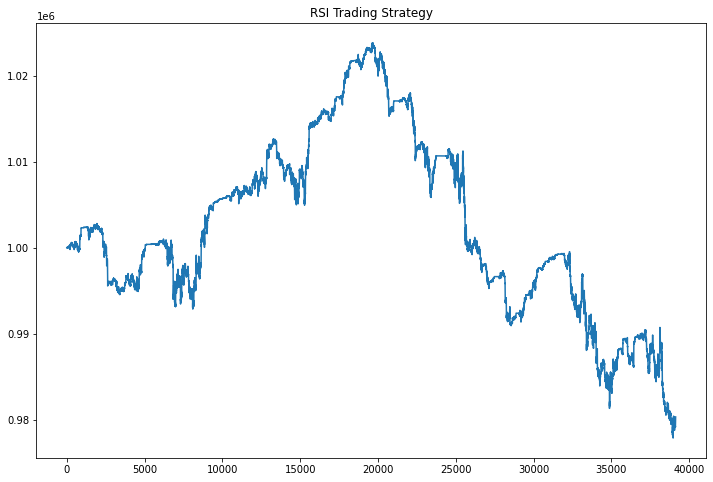

In [2]:
class Operation:
    def __init__(self, operation_type, bought_at, timestamp, n_shares, stop_loss, take_profit):
        self.operation_type = operation_type
        self.bought_at = bought_at
        self.timestamp = timestamp
        self.n_shares = n_shares
        self.sold_at = None
        self.stop_loss = stop_loss
        self.take_profit = take_profit

cash = 1_000_000
active_operations = []
com = 0.00125
strategy_value = [1_000_000]
n_shares = 10

for i, row in data.iterrows():
    temp_operations = []
    for op in active_operations:
        if op.stop_loss > row.Close:
            cash += row.Close * op.n_shares * (1 - com)  
        elif op.take_profit < row.Close: # Close profit
            cash += row.Close * op.n_shares *  (1 - com)
        else:
            temp_operations.append(op)
    active_operations = temp_operations
    
    if cash > row.Close * n_shares * (1 + com):   
        # Buy signal
        if row.RSI < 30:
            print(i, "buy")
            active_operations.append(Operation(operation_type = 'long', 
                                               bought_at = row.Close, 
                                               timestamp = row.Timestamp, 
                                               n_shares = n_shares,
                                               stop_loss = row.Close * 0.95,
                                               take_profit = row.Close * 1.05))
            cash -= row.Close * n_shares *  (1 + com)
        if row.RSI > 70:
            print(i, "sell")   
    else:
        print('no money available..')
    
    total_value = len(active_operations) * row.Close * n_shares
    strategy_value.append(cash + total_value)
        
        
plt.figure(figsize = (12, 8))
plt.plot(strategy_value)
plt.title('RSI Trading Strategy')
plt.show()

### SMA

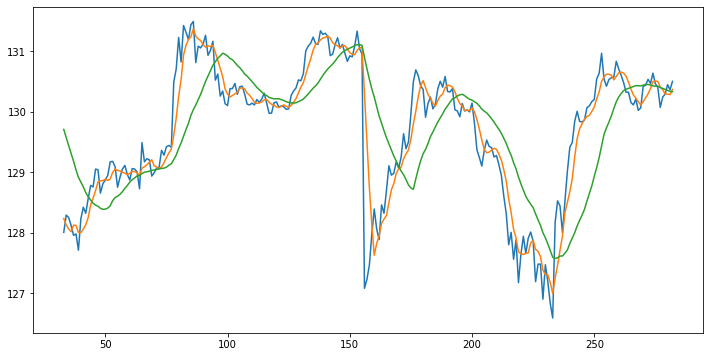

In [5]:
plt.figure(figsize = (12, 6))
plt.plot(data.Close[:250], label = 'price')
plt.plot(data.SHORT_SMA[:250], label = 'SAM(5)')
plt.plot(data.LONG_SMA[:250], label = 'SMA(21)')

33 sell
34 sell
35 sell
36 sell
37 sell
38 sell
39 sell
40 sell
41 sell
42 sell
43 sell
44 sell
45 buy
64 sell
65 buy
96 sell
97 sell
98 sell
99 sell
100 sell
101 sell
102 sell
103 sell
104 sell
105 sell
106 sell
107 sell
108 sell
109 sell
110 sell
111 sell
112 sell
113 sell
114 sell
115 sell
116 sell
117 sell
118 sell
119 sell
120 sell
121 sell
122 sell
123 sell
124 sell
125 sell
126 sell
127 buy
150 sell
151 sell
152 sell
153 sell
154 sell
155 sell
156 sell
157 sell
158 sell
159 sell
160 sell
161 sell
162 sell
163 sell
164 sell
165 sell
166 sell
167 sell
168 sell
169 sell
170 sell
171 buy
194 sell
195 sell
196 sell
197 sell
198 sell
199 sell
200 sell
201 sell
202 sell
203 sell
204 sell
205 sell
206 sell
207 sell
208 sell
209 sell
210 sell
211 sell
212 sell
213 sell
214 sell
215 sell
216 sell
217 sell
218 sell
219 sell
220 sell
221 sell
222 sell
223 sell
224 sell
225 sell
226 sell
227 sell
228 sell
229 sell
230 sell
231 sell
232 sell
233 sell
234 sell
235 sell
236 buy
265 sell
266 sel

2027 sell
2028 sell
2029 sell
2030 sell
2031 sell
2032 sell
2033 sell
2034 sell
2035 sell
2036 sell
2037 sell
2038 sell
2039 sell
2040 sell
2041 sell
2042 sell
2043 sell
2044 sell
2045 sell
2046 sell
2047 sell
2048 sell
2049 sell
2050 sell
2051 sell
2052 sell
2053 sell
2054 sell
2055 buy
2062 sell
2063 sell
2064 sell
2065 sell
2066 sell
2067 sell
2068 sell
2069 sell
2070 sell
2071 sell
2072 sell
2073 sell
2074 sell
2075 sell
2076 sell
2077 sell
2078 sell
2079 sell
2080 sell
2081 sell
2082 sell
2083 sell
2084 sell
2085 buy
2101 sell
2102 sell
2103 sell
2104 sell
2105 sell
2106 sell
2107 buy
2112 sell
2113 sell
2114 sell
2115 sell
2116 sell
2117 sell
2118 sell
2119 sell
2120 sell
2121 sell
2122 sell
2123 sell
2124 sell
2125 sell
2126 sell
2127 sell
2128 sell
2129 sell
2130 sell
2131 sell
2132 sell
2133 sell
2134 sell
2135 sell
2136 sell
2137 sell
2138 sell
2139 sell
2140 sell
2141 sell
2142 sell
2143 sell
2144 sell
2145 sell
2146 sell
2147 sell
2148 sell
2149 sell
2150 sell
2151 sell
215

3720 sell
3721 sell
3722 sell
3723 sell
3724 sell
3725 sell
3726 sell
3727 sell
3728 sell
3729 sell
3730 sell
3731 buy
3733 sell
3734 sell
3735 sell
3736 buy
3767 sell
3768 sell
3769 sell
3770 sell
3771 sell
3772 sell
3773 sell
3774 sell
3775 sell
3776 sell
3777 sell
3778 sell
3779 sell
3780 sell
3781 sell
3782 sell
3783 sell
3784 buy
3813 sell
3814 sell
3815 sell
3816 sell
3817 sell
3818 buy
3850 sell
3851 sell
3852 sell
3853 sell
3854 sell
3855 sell
3856 sell
3857 sell
3858 sell
3859 sell
3860 sell
3861 sell
3862 sell
3863 sell
3864 sell
3865 sell
3866 sell
3867 buy
3871 sell
3872 sell
3873 sell
3874 sell
3875 sell
3876 sell
3877 sell
3878 sell
3879 sell
3880 sell
3881 sell
3882 sell
3883 sell
3884 sell
3885 sell
3886 sell
3887 sell
3888 sell
3889 sell
3890 sell
3891 buy
3900 sell
3901 sell
3902 sell
3903 sell
3904 sell
3905 sell
3906 sell
3907 sell
3908 sell
3909 sell
3910 sell
3911 sell
3912 sell
3913 sell
3914 sell
3915 sell
3916 sell
3917 sell
3918 sell
3919 sell
3920 sell
3921 s

5633 sell
5634 sell
5635 sell
5636 buy
5641 sell
5642 sell
5643 sell
5644 sell
5645 sell
5646 sell
5647 sell
5648 sell
5649 sell
5650 sell
5651 sell
5652 sell
5653 sell
5654 sell
5655 sell
5656 sell
5657 sell
5658 sell
5659 sell
5660 sell
5661 buy
5680 sell
5681 sell
5682 sell
5683 sell
5684 sell
5685 sell
5686 sell
5687 sell
5688 sell
5689 sell
5690 sell
5691 sell
5692 sell
5693 buy
5705 sell
5706 sell
5707 sell
5708 sell
5709 sell
5710 sell
5711 sell
5712 sell
5713 sell
5714 sell
5715 sell
5716 sell
5717 sell
5718 sell
5719 sell
5720 sell
5721 sell
5722 sell
5723 sell
5724 sell
5725 sell
5726 sell
5727 buy
5740 sell
5741 sell
5742 sell
5743 sell
5744 sell
5745 sell
5746 sell
5747 sell
5748 sell
5749 sell
5750 sell
5751 sell
5752 sell
5753 sell
5754 sell
5755 sell
5756 sell
5757 sell
5758 sell
5759 sell
5760 sell
5761 sell
5762 sell
5763 sell
5764 sell
5765 sell
5766 buy
5774 sell
5775 sell
5776 sell
5777 sell
5778 sell
5779 sell
5780 sell
5781 sell
5782 sell
5783 sell
5784 sell
5785 

7405 sell
7406 sell
7407 sell
7408 sell
7409 sell
7410 sell
7411 buy
7497 sell
7499 sell
7500 sell
7501 sell
7502 sell
7503 sell
7504 sell
7505 sell
7506 sell
7507 sell
7508 sell
7509 sell
7510 sell
7511 sell
7512 sell
7513 sell
7514 sell
7515 sell
7516 sell
7517 sell
7518 sell
7519 sell
7520 sell
7521 sell
7522 sell
7523 sell
7524 sell
7525 sell
7526 sell
7527 sell
7528 sell
7529 sell
7530 sell
7531 sell
7532 sell
7533 sell
7534 sell
7535 sell
7536 sell
7537 sell
7538 sell
7539 sell
7540 sell
7541 sell
7542 sell
7543 sell
7544 sell
7545 sell
7546 sell
7547 sell
7548 buy
7561 sell
7562 sell
7563 sell
7564 sell
7565 buy
7573 sell
7574 sell
7575 sell
7576 sell
7578 sell
7579 buy
7613 sell
7614 sell
7615 sell
7616 sell
7617 sell
7618 sell
7619 sell
7620 sell
7621 sell
7622 sell
7623 sell
7624 sell
7625 sell
7626 buy
7650 sell
7651 sell
7652 sell
7653 sell
7654 sell
7655 sell
7657 sell
7658 sell
7659 sell
7660 sell
7661 sell
7662 sell
7663 sell
7664 sell
7665 sell
7666 sell
7667 sell
7668 

9614 sell
9615 sell
9616 sell
9617 sell
9618 sell
9619 sell
9620 buy
9624 sell
9625 buy
9628 sell
9629 sell
9630 sell
9632 sell
9633 sell
9634 sell
9635 buy
9659 sell
9660 sell
9661 sell
9662 sell
9663 sell
9664 sell
9665 sell
9666 sell
9667 sell
9668 sell
9669 sell
9670 sell
9671 sell
9672 sell
9673 sell
9674 sell
9675 sell
9676 buy
9690 sell
9691 sell
9692 buy
9711 sell
9712 sell
9713 sell
9714 sell
9715 sell
9716 sell
9717 sell
9718 sell
9719 sell
9720 sell
9721 sell
9722 sell
9723 sell
9724 sell
9725 sell
9726 sell
9727 sell
9728 sell
9729 sell
9730 sell
9731 sell
9732 sell
9733 sell
9734 sell
9735 sell
9736 sell
9737 sell
9738 sell
9739 sell
9740 sell
9741 buy
9751 sell
9752 sell
9753 sell
9754 sell
9755 sell
9756 sell
9757 sell
9758 sell
9759 sell
9760 buy
9809 sell
9810 sell
9811 buy
9814 sell
9815 sell
9816 buy
9854 sell
9855 sell
9856 sell
9857 sell
9858 sell
9859 sell
9860 buy
9888 sell
9889 sell
9890 sell
9891 sell
9892 sell
9893 sell
9894 sell
9895 sell
9896 sell
9897 sell


11435 sell
11436 sell
11437 sell
11438 sell
11439 sell
11440 sell
11441 sell
11442 sell
11443 sell
11444 sell
11445 sell
11446 sell
11448 sell
11449 sell
11450 sell
11451 buy
11456 sell
11457 sell
11458 sell
11459 buy
11464 sell
11465 buy
11470 sell
11471 sell
11472 buy
11506 sell
11507 sell
11508 sell
11509 sell
11510 sell
11511 sell
11512 sell
11513 sell
11514 sell
11515 sell
11516 sell
11517 sell
11518 sell
11519 sell
11520 sell
11521 sell
11522 sell
11523 sell
11524 sell
11525 sell
11527 sell
11528 sell
11529 sell
11530 sell
11531 sell
11532 buy
11534 sell
11535 sell
11536 sell
11537 sell
11538 sell
11539 sell
11540 sell
11541 sell
11542 sell
11543 sell
11544 sell
11545 sell
11546 sell
11547 sell
11548 sell
11549 sell
11550 sell
11551 sell
11552 sell
11553 sell
11554 sell
11555 sell
11556 sell
11557 buy
11578 sell
11579 sell
11580 sell
11581 sell
11582 sell
11583 sell
11584 sell
11585 sell
11586 sell
11587 sell
11588 sell
11589 sell
11590 sell
11591 sell
11592 sell
11593 sell
11594

13011 sell
13012 sell
13013 sell
13014 sell
13015 sell
13016 sell
13017 sell
13018 sell
13019 sell
13020 buy
13021 sell
13022 buy
13028 sell
13029 sell
13030 sell
13031 sell
13032 sell
13033 sell
13034 sell
13035 sell
13036 sell
13037 sell
13038 sell
13039 sell
13040 sell
13041 sell
13042 sell
13043 sell
13044 sell
13045 sell
13046 sell
13047 sell
13048 sell
13049 buy
13074 sell
13075 sell
13076 sell
13077 sell
13078 sell
13079 sell
13080 sell
13081 sell
13082 sell
13083 sell
13084 sell
13085 sell
13086 sell
13087 sell
13088 buy
13095 sell
13096 sell
13097 sell
13098 sell
13099 sell
13100 sell
13101 sell
13102 sell
13103 sell
13104 sell
13105 sell
13107 buy
13135 sell
13136 sell
13137 sell
13138 sell
13139 sell
13140 sell
13141 sell
13142 sell
13143 sell
13144 sell
13145 sell
13146 sell
13147 sell
13148 sell
13149 sell
13150 sell
13151 sell
13152 sell
13153 sell
13154 sell
13155 sell
13156 sell
13157 sell
13158 sell
13159 sell
13160 sell
13161 sell
13162 sell
13163 sell
13164 sell
1316

14919 sell
14920 sell
14921 sell
14922 sell
14924 buy
14993 sell
14994 sell
14995 sell
14996 sell
14997 sell
14998 sell
14999 sell
15000 sell
15001 sell
15003 sell
15004 sell
15005 sell
15006 sell
15007 sell
15008 sell
15009 sell
15010 sell
15011 sell
15012 sell
15013 sell
15014 sell
15015 sell
15016 sell
15017 buy
15027 sell
15028 sell
15029 sell
15030 sell
15031 sell
15032 buy
15037 sell
15038 sell
15039 sell
15040 sell
15041 sell
15042 sell
15043 sell
15044 sell
15045 sell
15046 sell
15047 sell
15048 sell
15049 sell
15050 sell
15051 buy
15103 sell
15104 sell
15105 sell
15106 sell
15107 sell
15108 sell
15109 sell
15110 buy
15116 sell
15117 sell
15118 sell
15119 sell
15120 buy
15122 sell
15123 buy
15136 sell
15137 sell
15138 sell
15139 sell
15140 sell
15141 sell
15142 sell
15143 sell
15144 sell
15145 sell
15146 sell
15147 sell
15148 sell
15149 sell
15150 sell
15151 sell
15152 sell
15153 sell
15154 buy
15156 sell
15157 sell
15158 sell
15159 sell
15161 sell
15162 sell
15163 sell
15164 s

16772 sell
16773 sell
16774 sell
16775 sell
16776 sell
16777 sell
16778 sell
16779 sell
16780 sell
16781 sell
16782 sell
16783 sell
16784 sell
16785 sell
16786 sell
16787 sell
16788 sell
16789 sell
16790 sell
16791 sell
16792 sell
16793 sell
16794 sell
16795 sell
16796 sell
16797 sell
16798 sell
16799 sell
16800 sell
16801 sell
16802 sell
16803 sell
16804 sell
16805 sell
16806 buy
16825 sell
16826 buy
16833 sell
16834 sell
16835 sell
16836 sell
16837 sell
16838 sell
16839 sell
16840 sell
16841 sell
16842 sell
16843 sell
16844 sell
16845 sell
16846 sell
16847 sell
16848 sell
16849 sell
16850 sell
16851 sell
16852 sell
16853 sell
16854 sell
16855 sell
16856 sell
16857 sell
16858 sell
16859 sell
16860 sell
16861 buy
16875 sell
16876 sell
16877 sell
16878 sell
16879 sell
16880 sell
16881 sell
16882 sell
16883 sell
16884 sell
16885 sell
16886 sell
16887 sell
16888 sell
16889 sell
16890 sell
16891 sell
16892 sell
16893 sell
16894 sell
16895 sell
16896 sell
16897 sell
16899 sell
16900 sell
16

18987 sell
18988 sell
18989 sell
18990 buy
18997 sell
18998 sell
18999 sell
19000 sell
19001 sell
19002 sell
19003 sell
19004 sell
19005 sell
19006 sell
19007 sell
19008 sell
19009 sell
19010 sell
19011 sell
19012 buy
19024 sell
19025 sell
19026 sell
19027 sell
19028 sell
19029 sell
19030 sell
19031 sell
19032 sell
19033 sell
19034 sell
19035 sell
19036 sell
19037 sell
19038 sell
19039 sell
19040 sell
19041 buy
19065 sell
19066 sell
19067 sell
19068 sell
19069 sell
19070 sell
19071 sell
19072 sell
19073 sell
19075 sell
19076 sell
19077 sell
19078 sell
19079 sell
19080 sell
19081 sell
19082 sell
19083 sell
19084 sell
19085 sell
19086 sell
19087 sell
19088 sell
19089 sell
19090 sell
19091 sell
19092 sell
19093 sell
19094 sell
19095 sell
19096 sell
19097 sell
19098 buy
19116 sell
19117 sell
19118 sell
19119 sell
19120 sell
19121 sell
19122 sell
19123 sell
19124 sell
19125 sell
19126 buy
19145 sell
19146 sell
19147 sell
19148 sell
19149 sell
19150 sell
19151 sell
19152 sell
19154 buy
19165

20763 sell
20764 sell
20765 sell
20766 sell
20767 sell
20768 sell
20769 sell
20770 sell
20771 sell
20772 sell
20773 sell
20774 sell
20775 sell
20776 sell
20777 sell
20778 sell
20779 sell
20780 sell
20781 sell
20782 sell
20783 sell
20784 sell
20785 sell
20786 sell
20787 sell
20788 sell
20789 sell
20790 sell
20791 sell
20792 sell
20793 sell
20794 sell
20795 sell
20796 sell
20797 sell
20798 sell
20799 sell
20800 sell
20801 sell
20802 sell
20803 sell
20804 sell
20805 sell
20806 sell
20807 sell
20808 sell
20809 sell
20810 sell
20811 sell
20813 sell
20814 sell
20815 sell
20816 sell
20817 sell
20818 sell
20819 sell
20820 sell
20821 sell
20822 sell
20823 sell
20824 sell
20825 sell
20826 sell
20827 buy
20841 sell
20842 sell
20843 sell
20844 sell
20845 sell
20846 sell
20847 sell
20848 sell
20849 sell
20850 sell
20851 sell
20852 sell
20853 sell
20854 sell
20855 sell
20856 sell
20857 sell
20858 buy
20862 sell
20863 sell
20864 buy
20872 sell
20873 sell
20874 sell
20875 sell
20876 sell
20877 sell
20

22383 sell
22384 sell
22385 sell
22386 sell
22387 sell
22388 sell
22389 sell
22390 sell
22391 sell
22393 sell
22394 sell
22395 sell
22396 sell
22397 sell
22398 sell
22399 sell
22400 sell
22401 sell
22402 sell
22403 sell
22404 sell
22405 sell
22406 sell
22407 sell
22408 sell
22409 sell
22410 sell
22411 sell
22412 sell
22413 sell
22414 sell
22415 sell
22416 sell
22417 sell
22418 sell
22419 sell
22420 sell
22421 sell
22422 sell
22423 sell
22424 sell
22425 sell
22426 sell
22427 sell
22428 sell
22429 sell
22430 sell
22431 sell
22432 sell
22433 sell
22434 sell
22435 sell
22436 sell
22437 sell
22438 sell
22439 sell
22440 sell
22441 sell
22442 sell
22443 sell
22444 sell
22445 sell
22446 buy
22464 sell
22465 sell
22466 sell
22467 sell
22468 sell
22469 sell
22470 sell
22472 sell
22473 sell
22474 sell
22475 sell
22476 sell
22477 sell
22478 sell
22479 sell
22480 sell
22481 sell
22482 sell
22483 sell
22484 sell
22485 sell
22486 sell
22487 sell
22488 sell
22489 sell
22490 sell
22491 sell
22492 sell


24085 sell
24086 sell
24087 sell
24088 sell
24089 sell
24090 sell
24091 sell
24092 sell
24093 sell
24094 buy
24111 sell
24112 sell
24113 sell
24114 sell
24115 sell
24116 sell
24117 sell
24118 sell
24119 sell
24120 sell
24121 sell
24122 buy
24131 sell
24132 sell
24133 sell
24134 sell
24135 sell
24136 buy
24173 sell
24174 buy
24188 sell
24189 sell
24190 sell
24191 sell
24192 sell
24193 sell
24194 sell
24195 sell
24196 sell
24197 sell
24198 sell
24199 sell
24200 sell
24201 sell
24202 sell
24203 sell
24204 sell
24205 sell
24206 sell
24207 sell
24208 sell
24210 sell
24211 sell
24212 sell
24213 sell
24214 buy
24219 sell
24220 sell
24221 sell
24222 sell
24223 sell
24224 sell
24225 sell
24226 sell
24227 sell
24228 sell
24229 sell
24230 sell
24231 sell
24232 buy
24244 sell
24245 sell
24246 sell
24247 sell
24248 sell
24249 sell
24250 sell
24251 sell
24252 sell
24253 sell
24254 sell
24255 buy
24309 sell
24310 sell
24311 sell
24312 sell
24313 sell
24314 sell
24315 sell
24316 sell
24317 sell
24318 

25740 sell
25741 sell
25742 sell
25743 sell
25744 sell
25745 sell
25746 sell
25747 sell
25748 sell
25749 sell
25750 sell
25751 sell
25752 sell
25753 sell
25754 sell
25755 sell
25756 sell
25757 sell
25758 sell
25759 sell
25760 sell
25761 sell
25762 sell
25763 sell
25764 sell
25765 sell
25766 sell
25767 sell
25768 sell
25769 sell
25770 sell
25771 sell
25772 sell
25773 sell
25774 sell
25775 sell
25776 sell
25777 sell
25778 sell
25779 sell
25780 sell
25781 sell
25782 sell
25783 sell
25784 sell
25785 sell
25786 sell
25787 sell
25788 sell
25790 buy
25796 sell
25797 buy
25798 sell
25799 sell
25800 sell
25801 sell
25802 sell
25803 sell
25804 sell
25805 sell
25806 sell
25807 sell
25808 sell
25809 sell
25810 sell
25811 sell
25812 buy
25814 sell
25815 sell
25816 sell
25817 sell
25818 sell
25819 sell
25820 sell
25821 sell
25822 sell
25823 sell
25824 sell
25825 sell
25826 sell
25827 sell
25828 sell
25829 sell
25830 sell
25831 sell
25832 sell
25833 sell
25834 sell
25835 sell
25836 sell
25837 sell
25

27061 sell
27062 sell
27063 sell
27064 sell
27065 sell
27066 sell
27067 sell
27068 sell
27069 sell
27070 sell
27071 sell
27072 sell
27073 sell
27074 sell
27075 sell
27076 sell
27077 sell
27078 sell
27079 sell
27080 buy
27092 sell
27093 sell
27094 sell
27095 sell
27096 sell
27097 sell
27098 sell
27099 sell
27100 buy
27123 sell
27124 sell
27125 sell
27126 sell
27127 sell
27128 sell
27129 sell
27130 sell
27131 sell
27133 sell
27134 buy
27148 sell
27149 sell
27150 sell
27151 sell
27152 sell
27153 sell
27154 sell
27155 sell
27156 sell
27157 buy
27192 sell
27193 sell
27194 sell
27195 sell
27196 sell
27197 buy
27212 sell
27213 sell
27214 sell
27215 sell
27216 sell
27217 sell
27218 sell
27219 sell
27220 sell
27221 sell
27222 sell
27223 sell
27224 sell
27225 sell
27226 sell
27227 sell
27228 sell
27229 sell
27230 sell
27231 sell
27232 sell
27233 sell
27234 sell
27235 sell
27236 sell
27237 sell
27238 sell
27239 sell
27240 sell
27241 sell
27242 sell
27243 sell
27244 sell
27245 sell
27246 sell
2724

29111 sell
29112 buy
29136 sell
29137 sell
29138 sell
29139 sell
29140 sell
29141 sell
29142 sell
29143 sell
29144 sell
29145 sell
29146 sell
29147 sell
29148 sell
29149 sell
29150 sell
29151 sell
29152 sell
29153 sell
29154 sell
29155 sell
29156 sell
29157 sell
29158 sell
29159 sell
29160 buy
29205 sell
29206 sell
29207 sell
29208 sell
29209 sell
29210 sell
29211 sell
29212 sell
29213 sell
29214 sell
29215 sell
29216 sell
29217 sell
29218 sell
29219 sell
29220 buy
29222 sell
29223 sell
29224 sell
29225 sell
29226 sell
29227 sell
29228 sell
29229 sell
29230 sell
29231 sell
29232 sell
29233 sell
29234 sell
29235 sell
29236 sell
29237 sell
29238 sell
29239 sell
29240 sell
29241 sell
29242 sell
29243 sell
29244 sell
29245 sell
29246 buy
29301 sell
29302 sell
29303 sell
29304 sell
29305 sell
29306 sell
29307 sell
29308 sell
29309 sell
29310 sell
29311 sell
29312 sell
29313 sell
29314 sell
29315 sell
29316 sell
29317 sell
29318 sell
29319 sell
29320 sell
29321 sell
29322 sell
29323 sell
293

31599 sell
31600 sell
31601 sell
31602 buy
31607 sell
31608 sell
31609 buy
31612 sell
31613 sell
31614 sell
31615 sell
31616 sell
31617 sell
31618 sell
31619 sell
31620 sell
31621 sell
31622 sell
31623 sell
31624 sell
31625 sell
31626 sell
31627 buy
31637 sell
31638 sell
31639 sell
31640 sell
31641 sell
31642 sell
31643 sell
31644 sell
31645 sell
31646 sell
31647 sell
31648 sell
31649 sell
31650 buy
31671 sell
31672 sell
31673 sell
31674 sell
31675 sell
31676 sell
31677 sell
31678 sell
31679 sell
31680 sell
31681 buy
31696 sell
31697 sell
31698 sell
31699 sell
31700 sell
31701 sell
31702 sell
31703 sell
31704 sell
31705 sell
31706 sell
31707 buy
31710 sell
31711 sell
31712 sell
31713 sell
31715 buy
31749 sell
31750 sell
31751 sell
31752 sell
31753 buy
31811 sell
31812 sell
31813 sell
31814 sell
31815 sell
31816 sell
31817 sell
31818 sell
31819 sell
31820 sell
31821 sell
31822 sell
31823 sell
31824 sell
31825 sell
31826 sell
31827 sell
31828 sell
31829 sell
31830 sell
31831 buy
31845 se

33227 sell
33228 sell
33229 sell
33230 sell
33231 sell
33232 sell
33233 sell
33234 sell
33235 sell
33236 sell
33237 sell
33238 buy
33251 sell
33252 sell
33253 sell
33254 sell
33255 buy
33295 sell
33296 sell
33297 sell
33298 sell
33299 sell
33300 sell
33301 sell
33302 sell
33303 sell
33304 sell
33305 sell
33306 sell
33307 sell
33308 sell
33309 sell
33310 sell
33311 buy
33324 sell
33325 sell
33326 sell
33327 sell
33328 sell
33329 sell
33330 sell
33331 sell
33332 sell
33333 sell
33334 sell
33335 sell
33336 sell
33337 sell
33338 sell
33339 sell
33340 sell
33341 sell
33342 sell
33343 buy
33363 sell
33364 sell
33365 buy
33406 sell
33407 sell
33408 sell
33409 sell
33410 sell
33411 sell
33412 sell
33413 sell
33414 sell
33415 sell
33416 buy
33438 sell
33439 sell
33440 sell
33441 buy
33514 sell
33515 sell
33516 sell
33517 sell
33518 sell
33519 sell
33520 sell
33521 sell
33522 sell
33523 sell
33524 sell
33525 sell
33526 sell
33527 sell
33528 sell
33529 sell
33530 sell
33532 sell
33533 sell
33534 

34882 sell
34883 sell
34884 sell
34885 sell
34886 sell
34887 sell
34888 sell
34889 sell
34890 sell
34891 sell
34892 sell
34893 sell
34894 sell
34895 sell
34896 sell
34897 sell
34898 buy
34906 sell
34907 sell
34908 sell
34909 sell
34910 sell
34911 sell
34912 sell
34913 sell
34914 buy
34931 sell
34932 sell
34933 sell
34934 sell
34935 sell
34936 sell
34937 sell
34938 sell
34939 sell
34940 sell
34941 sell
34942 sell
34943 sell
34944 sell
34945 sell
34946 sell
34947 sell
34948 sell
34949 buy
34952 sell
34954 sell
34955 sell
34956 sell
34957 sell
34958 sell
34959 sell
34960 sell
34961 sell
34962 sell
34963 sell
34964 sell
34965 sell
34966 sell
34967 sell
34968 sell
34969 sell
34970 sell
34971 sell
34972 sell
34973 sell
34974 sell
34975 sell
34976 sell
34977 sell
34978 sell
34979 sell
34980 sell
34981 sell
34982 sell
34983 sell
34984 sell
34985 sell
34986 sell
34987 sell
34988 sell
34989 sell
34990 sell
34991 sell
34992 sell
34993 sell
34994 sell
34995 sell
34996 sell
34997 sell
34998 sell
34

36644 sell
36645 sell
36646 sell
36647 sell
36648 buy
36662 sell
36663 sell
36664 sell
36665 sell
36666 sell
36667 sell
36668 buy
36700 sell
36701 sell
36702 sell
36703 sell
36704 sell
36705 sell
36706 sell
36707 buy
36739 sell
36740 sell
36741 sell
36742 sell
36743 sell
36744 sell
36745 sell
36746 sell
36747 sell
36748 sell
36749 sell
36750 sell
36751 sell
36752 sell
36753 sell
36754 sell
36755 sell
36756 sell
36757 sell
36758 sell
36759 sell
36760 buy
36772 sell
36773 sell
36774 sell
36775 sell
36776 sell
36777 sell
36778 sell
36779 sell
36780 sell
36781 sell
36782 sell
36783 sell
36784 sell
36785 sell
36786 sell
36787 sell
36788 sell
36789 sell
36790 sell
36791 sell
36792 sell
36793 sell
36794 sell
36795 sell
36796 sell
36797 sell
36798 sell
36799 sell
36800 buy
36802 sell
36803 sell
36804 sell
36805 sell
36806 sell
36807 sell
36808 sell
36809 sell
36810 sell
36811 sell
36812 sell
36813 sell
36814 sell
36815 sell
36816 sell
36817 sell
36818 sell
36819 sell
36820 sell
36821 sell
3682

38358 sell
38359 sell
38360 sell
38361 sell
38362 buy
38371 sell
38372 sell
38373 sell
38374 sell
38375 sell
38376 sell
38377 sell
38378 sell
38379 sell
38380 sell
38381 sell
38382 sell
38383 buy
38394 sell
38395 sell
38396 sell
38397 sell
38398 sell
38399 sell
38400 sell
38401 sell
38402 sell
38403 sell
38404 sell
38405 sell
38406 buy
38434 sell
38435 sell
38436 sell
38437 sell
38438 sell
38439 sell
38440 sell
38441 sell
38442 sell
38443 sell
38444 sell
38445 sell
38446 sell
38447 sell
38448 sell
38449 sell
38450 sell
38451 sell
38452 sell
38453 sell
38454 buy
38455 sell
38456 sell
38457 sell
38458 sell
38459 sell
38460 sell
38461 sell
38462 sell
38463 sell
38464 sell
38465 sell
38466 sell
38467 sell
38468 sell
38469 sell
38470 sell
38471 sell
38473 sell
38474 sell
38475 sell
38476 sell
38477 sell
38478 sell
38479 sell
38480 sell
38481 sell
38482 sell
38483 sell
38484 sell
38485 sell
38486 sell
38487 sell
38488 sell
38489 sell
38490 sell
38491 sell
38492 sell
38493 sell
38494 buy
3850

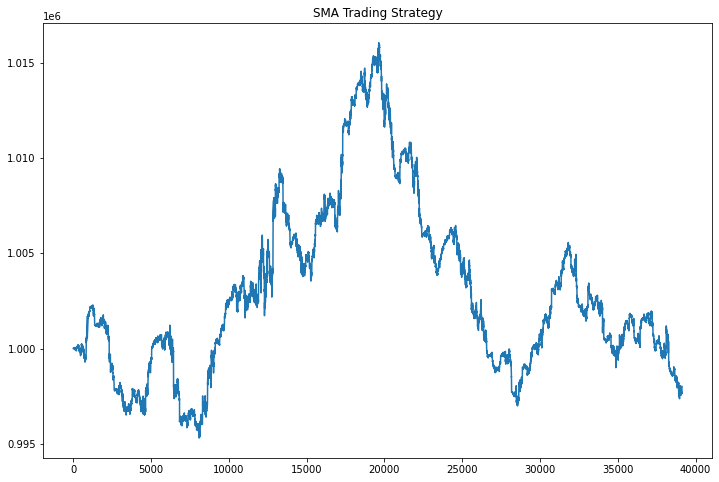

In [3]:
cash = 1_000_000
active_operations = []
com = 0.00125
strategy_value = [1_000_000]
n_shares = 10

sma_sell_signal = data.iloc[0].LONG_SMA > data.iloc[0].SHORT_SMA 
sma_buy_signal = data.iloc[0].LONG_SMA < data.iloc[0].SHORT_SMA


for i, row in data.iterrows():
    # Close operations
    temp_operations = []
    for op in active_operations:
        # Close losing position
        if op.stop_loss > row.Close:
            cash += row.Close * op.n_shares * (1 - com)  
        elif op.take_profit < row.Close: # Close profit
            cash += row.Close * op.n_shares *  (1 - com)
        else:
            temp_operations.append(op)
    active_operations = temp_operations
    
    if cash > row.Close * n_shares * (1 + com):   
        # Buy signal
        if (row.LONG_SMA < row.SHORT_SMA) and SMA_buy_signal == False:
            SMA_buy_signal =True
            print(i, "buy")
            #buy....
            active_operations.append(Operation(operation_type = 'long', 
                                               bought_at = row.Close, 
                                               timestamp = row.Timestamp, 
                                               n_shares = n_shares,
                                               stop_loss = row.Close * 0.95,
                                               take_profit = row.Close * 1.05))
            cash -= row.Close * n_shares *  (1 + com)
            
        elif row.LONG_SMA > row.SHORT_SMA:
            SMA_buy_signal =False
            print(i, "sell")
        
            
    else:
        print('no money available..')
    
    total_value = len(active_operations) * row.Close * n_shares
    strategy_value.append(cash + total_value)
    
    
plt.figure(figsize = (12, 8))
plt.plot(strategy_value)
plt.title('SMA Trading Strategy')
plt.show()

40 buy
91 sell
126 buy
143 sell
166 buy
193 sell
224 buy
226 sell
228 buy
229 sell
230 buy
232 sell
234 buy
258 sell
293 buy
296 sell
299 buy
315 sell
318 buy
319 sell
337 buy
350 sell
369 buy
390 sell
401 buy
438 sell
455 buy
460 sell
465 buy
472 sell
479 buy
492 sell
507 buy
532 sell
538 buy
570 sell
622 buy
623 sell
636 buy
650 sell
665 buy
672 sell
674 buy
676 sell
689 buy
693 sell
698 buy
700 sell
702 buy
708 sell
722 buy
735 sell
747 buy
758 sell
780 buy
787 sell
795 buy
831 sell
858 buy
877 sell
919 buy
923 sell
932 buy
934 sell
936 buy
954 sell
994 buy
1000 sell
1005 buy
1013 sell
1019 buy
1024 sell
1033 buy
1057 sell
1073 buy
1091 sell
1092 buy
1104 sell
1121 buy
1125 sell
1132 buy
1144 sell
1155 buy
1158 sell
1168 buy
1177 sell
1188 buy
1193 sell
1203 buy
1231 sell
1254 buy
1266 sell
1281 buy
1298 sell
1299 buy
1307 sell
1325 buy
1326 sell
1335 buy
1370 sell
1415 buy
1423 sell
1431 buy
1442 sell
1447 buy
1467 sell
1470 buy
1481 sell
1482 buy
1485 sell
1493 buy
1520 sell
1528 

11250 sell
11254 buy
11258 sell
11270 buy
11274 sell
11305 buy
11357 sell
11378 buy
11381 sell
11386 buy
11398 sell
11412 buy
11430 sell
11450 buy
11455 sell
11458 buy
11462 sell
11463 buy
11469 sell
11472 buy
11496 sell
11532 buy
11534 sell
11554 buy
11576 sell
11599 buy
11606 sell
11611 buy
11631 sell
11656 buy
11666 sell
11683 buy
11685 sell
11692 buy
11703 sell
11715 buy
11733 sell
11739 buy
11750 sell
11753 buy
11779 sell
11808 buy
11831 sell
11834 buy
11838 sell
11841 buy
11855 sell
11873 buy
11898 sell
11902 buy
11919 sell
11922 buy
11931 sell
11945 buy
11968 sell
11990 buy
11995 sell
12001 buy
12026 sell
12059 buy
12072 sell
12084 buy
12094 sell
12119 buy
12140 sell
12154 buy
12155 sell
12157 buy
12164 sell
12179 buy
12219 sell
12252 buy
12261 sell
12285 buy
12314 sell
12315 buy
12318 sell
12324 buy
12328 sell
12348 buy
12364 sell
12371 buy
12381 sell
12405 buy
12438 sell
12461 buy
12472 sell
12475 buy
12493 sell
12511 buy
12524 sell
12540 buy
12574 sell
12616 buy
12620 sell
12

22346 sell
22350 buy
22351 sell
22352 buy
22356 sell
22387 buy
22395 sell
22398 buy
22405 sell
22415 buy
22423 sell
22425 buy
22430 sell
22442 buy
22462 sell
22482 buy
22487 sell
22497 buy
22512 sell
22515 buy
22522 sell
22532 buy
22548 sell
22551 buy
22556 sell
22578 buy
22591 sell
22622 buy
22630 sell
22639 buy
22664 sell
22668 buy
22671 sell
22674 buy
22701 sell
22702 buy
22712 sell
22724 buy
22740 sell
22782 buy
22788 sell
22801 buy
22819 sell
22831 buy
22834 sell
22840 buy
22842 sell
22853 buy
22880 sell
22905 buy
22912 sell
22923 buy
22940 sell
22946 buy
22974 sell
22978 buy
22980 sell
23025 buy
23033 sell
23049 buy
23075 sell
23081 buy
23086 sell
23125 buy
23156 sell
23180 buy
23189 sell
23201 buy
23214 sell
23233 buy
23245 sell
23265 buy
23268 sell
23279 buy
23286 sell
23290 buy
23309 sell
23326 buy
23333 sell
23342 buy
23361 sell
23379 buy
23383 sell
23401 buy
23416 sell
23436 buy
23461 sell
23464 buy
23489 sell
23515 buy
23518 sell
23537 buy
23561 sell
23587 buy
23604 sell
23

33131 sell
33134 buy
33143 sell
33150 buy
33169 sell
33191 buy
33203 sell
33204 buy
33210 sell
33212 buy
33213 sell
33214 buy
33225 sell
33236 buy
33249 sell
33253 buy
33263 sell
33265 buy
33276 sell
33281 buy
33292 sell
33309 buy
33322 sell
33339 buy
33370 sell
33371 buy
33393 sell
33417 buy
33426 sell
33432 buy
33435 sell
33442 buy
33451 sell
33453 buy
33467 sell
33500 buy
33508 sell
33549 buy
33586 sell
33611 buy
33634 sell
33671 buy
33700 sell
33715 buy
33742 sell
33766 buy
33769 sell
33780 buy
33805 sell
33807 buy
33844 sell
33854 buy
33872 sell
33885 buy
33893 sell
33914 buy
33929 sell
33930 buy
33935 sell
33942 buy
33962 sell
33985 buy
33988 sell
33990 buy
34010 sell
34036 buy
34060 sell
34068 buy
34077 sell
34096 buy
34143 sell
34149 buy
34162 sell
34179 buy
34213 sell
34218 buy
34219 sell
34231 buy
34258 sell
34295 buy
34296 sell
34297 buy
34318 sell
34319 buy
34320 sell
34322 buy
34332 sell
34362 buy
34394 sell
34412 buy
34452 sell
34461 buy
34480 sell
34496 buy
34521 sell
34

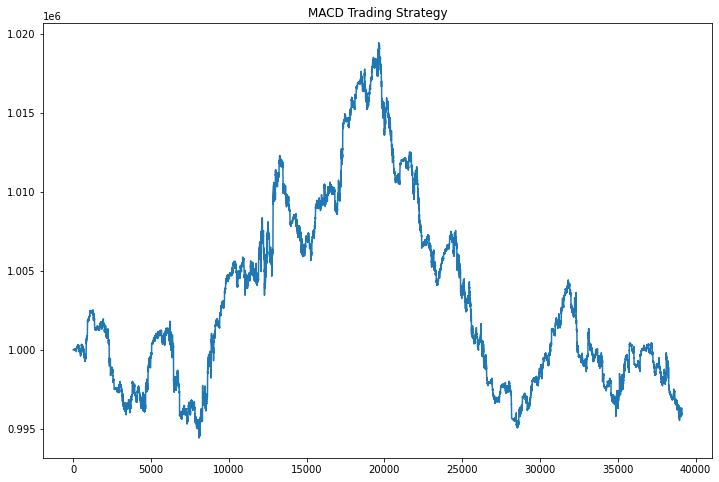

In [4]:
cash = 1_000_000
active_operations = []
com = 0.00125
strategy_value = [1_000_000]
n_shares = 10

for i, row in data.iterrows():
    temp_operations = []
    for op in active_operations:
        if op.stop_loss > row.Close: 
            cash += row.Close * op.n_shares * (1 - com)
        elif op.take_profit < row.Close:  
            cash += row.Close * op.n_shares * (1 - com)
        else:
            temp_operations.append(op)
    active_operations = temp_operations
    
    # Verificamos si tenemos suficiente efectivo
    if cash > row.Close * n_shares * (1 + com):
        # Señal de compra: la línea MACD cruza por encima de la línea de señal
        prev_macd = data['MACD'].shift(1)[i]  # Valor MACD de la fila anterior
        prev_signal = data['Signal_Line'].shift(1)[i]  # Valor de la línea de señal de la fila anterior
        if row['MACD'] > row['Signal_Line'] and prev_macd < prev_signal:
            print(i, "buy")
            active_operations.append(Operation(operation_type='long',
                                                bought_at=row.Close,
                                                timestamp=row.Timestamp,
                                                n_shares=n_shares,
                                                stop_loss=row.Close * 0.95,
                                                take_profit=row.Close * 1.05))
            cash -= row.Close * n_shares * (1 + com)
        if row['MACD'] < row['Signal_Line'] and prev_macd > prev_signal:
            print(i, "sell")
    else:
        print('no money available..')
    
    
    total_value = len(active_operations) * row.Close * n_shares
    strategy_value.append(cash + total_value)


plt.figure(figsize=(12, 8))
plt.plot(strategy_value)
plt.title('MACD Trading Strategy')
plt.show()

34 buy
55 sell
57 buy
64 sell
72 sell
76 buy
94 sell
112 buy
118 sell
126 buy
221 buy
226 sell
256 sell
272 buy
278 sell
302 sell
303 buy
311 sell
315 sell
337 buy
349 sell
365 buy
468 buy
480 buy
494 sell
505 buy
527 sell
538 buy
553 sell
557 buy
571 sell
572 buy
576 sell
600 sell
620 buy
635 buy
664 buy
672 sell
734 sell
747 buy
771 buy
839 buy
840 sell
846 buy
880 buy
894 sell
912 sell
918 buy
926 sell
932 buy
935 sell
958 sell
965 buy
988 sell
992 buy
1012 sell
1081 sell
1144 sell
1153 buy
1167 buy
1188 buy
1218 buy
1233 sell
1242 buy
1269 sell
1280 buy
1298 sell
1301 buy
1319 buy
1339 buy
1353 sell
1357 buy
1369 sell
1410 buy
1411 sell
1419 sell
1432 buy
1438 sell
1470 buy
1479 sell
1496 buy
1519 sell
1524 buy
1531 sell
1546 buy
1586 sell
1626 buy
1628 sell
1631 buy
1638 sell
1654 buy
1682 sell
1707 buy
1709 sell
1811 buy
1834 sell
1842 sell
1859 buy
1885 buy
1896 sell
1911 buy
1913 sell
1921 buy
1955 sell
1961 buy
1967 sell
1982 buy
1988 sell
1999 buy
2048 buy
2062 sell
2082 buy


13540 buy
13572 sell
13612 buy
13629 sell
13644 buy
13670 sell
13723 buy
13734 sell
13771 sell
13805 buy
13820 sell
13846 sell
13850 buy
13880 buy
13881 sell
13885 buy
13894 sell
13909 buy
13914 sell
13916 buy
13917 sell
13922 buy
13939 sell
13973 sell
13986 buy
13992 sell
14002 buy
14005 sell
14011 buy
14025 buy
14026 sell
14032 buy
14035 sell
14041 buy
14051 sell
14053 buy
14100 buy
14121 buy
14141 sell
14170 sell
14186 buy
14187 sell
14196 buy
14213 buy
14221 sell
14223 buy
14243 sell
14261 buy
14265 sell
14272 sell
14274 buy
14276 sell
14282 buy
14288 sell
14289 buy
14292 sell
14339 sell
14340 buy
14357 buy
14360 sell
14368 buy
14369 sell
14393 buy
14414 sell
14437 sell
14440 buy
14447 sell
14488 buy
14511 sell
14553 buy
14557 sell
14582 sell
14587 buy
14601 sell
14627 sell
14638 buy
14642 sell
14648 buy
14678 sell
14695 sell
14709 buy
14724 buy
14735 sell
14740 sell
14742 buy
14752 sell
14756 buy
14761 sell
14782 buy
14796 sell
14808 sell
14837 sell
14841 sell
14843 sell
14865 buy

24422 buy
24443 sell
24458 sell
24468 buy
24481 sell
24492 buy
24505 sell
24508 buy
24520 sell
24522 buy
24523 sell
24527 buy
24531 sell
24535 buy
24540 sell
24556 buy
24577 sell
24598 buy
24617 buy
24619 sell
24620 buy
24627 sell
24631 buy
24640 sell
24653 buy
24660 sell
24675 sell
24708 sell
24710 buy
24711 sell
24724 buy
24775 sell
24783 buy
24802 sell
24838 sell
24844 buy
24845 sell
24860 buy
24863 sell
24882 buy
24890 sell
24903 sell
24905 buy
24906 sell
24915 buy
24937 buy
24940 sell
24943 buy
24955 sell
24980 buy
25005 buy
25037 sell
25061 sell
25063 buy
25091 buy
25115 sell
25120 buy
25137 buy
25154 sell
25177 buy
25183 sell
25184 buy
25198 buy
25205 sell
25213 buy
25214 sell
25222 buy
25270 sell
25281 buy
25287 sell
25299 buy
25316 sell
25318 buy
25344 sell
25368 sell
25393 sell
25396 sell
25416 buy
25421 sell
25423 buy
25425 sell
25439 buy
25445 buy
25465 buy
25467 sell
25477 buy
25493 sell
25512 buy
25530 sell
25532 sell
25533 buy
25554 sell
25564 sell
25565 buy
25595 buy
25

35487 sell
35496 sell
35505 sell
35562 sell
35586 sell
35590 buy
35601 sell
35602 buy
35614 buy
35621 sell
35639 buy
35645 sell
35646 buy
35650 sell
35665 sell
35666 buy
35679 sell
35690 buy
35725 buy
35757 sell
35768 buy
35779 sell
35784 buy
35801 sell
35808 buy
35824 sell
35826 buy
35843 sell
35845 buy
35859 sell
35874 buy
35902 buy
35920 sell
35941 sell
35948 buy
35949 sell
35950 buy
35953 sell
35957 buy
35968 sell
35995 buy
36034 buy
36048 buy
36077 sell
36125 buy
36162 sell
36172 buy
36191 sell
36201 buy
36206 sell
36233 buy
36247 sell
36251 buy
36274 sell
36302 sell
36334 sell
36343 buy
36346 sell
36352 buy
36366 sell
36372 buy
36407 buy
36440 sell
36475 sell
36502 sell
36527 sell
36574 sell
36593 buy
36622 buy
36633 sell
36636 buy
36641 sell
36648 buy
36660 sell
36678 sell
36692 sell
36693 buy
36695 sell
36705 buy
36725 sell
36728 buy
36754 buy
36791 buy
36801 sell
36838 buy
36858 sell
36859 buy
36876 sell
36886 sell
36936 buy
36950 sell
36980 sell
37008 sell
37022 buy
37032 sel

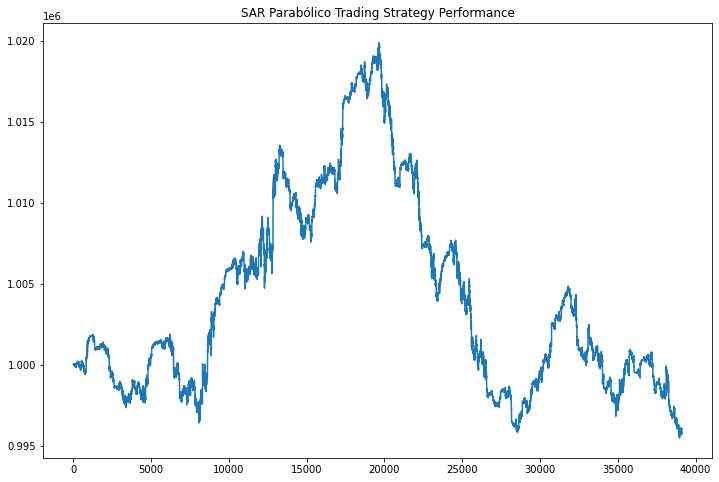

In [5]:
cash = 1_000_000
active_operations = []
com = 0.00125
strategy_value = [1_000_000]
n_shares = 10
data['prev_SAR'] = data['SAR'].shift(1)

for index, row in data.iterrows():

    temp_operations = []
    for op in active_operations:
        if op.stop_loss > row.Close or op.take_profit < row.Close:
            cash += row.Close * op.n_shares * (1 - com)
        else:
            temp_operations.append(op)
    active_operations = temp_operations

    if cash > row.Close * n_shares * (1 + com):
        # Señal de compra: puntos del SAR pasan de estar arriba a debajo del precio
        if pd.notnull(row['prev_SAR']):  # Asegura que el valor previo de SAR no sea NaN
            if row['SAR'] < row['Close'] and row['prev_SAR'] > row['Close']:
                print(index, "buy")
                active_operations.append(Operation('long', row.Close, row.Timestamp, n_shares, row.Close * 0.95, row.Close * 1.05))
                cash -= row.Close * n_shares * (1 + com)
            elif row['SAR'] > row['Close'] and row['prev_SAR'] < row['Close']:
                print(index, "sell")

            
    total_value = sum(op.n_shares * row.Close for op in active_operations)
    strategy_value.append(cash + total_value)


plt.figure(figsize=(12, 8))
plt.plot(strategy_value)
plt.title('SAR Parabólico Trading Strategy Performance')
plt.show()

65 buy
156 sell
234 buy
237 sell
239 buy
516 buy
576 sell
702 buy
780 buy
784 sell
968 sell
971 buy
1027 sell
1109 sell
1325 buy
1326 sell
1453 buy
1716 buy
1794 sell
1797 buy
1799 sell
1969 sell
2173 buy
2184 sell
2198 buy
2277 sell
2318 buy
2321 sell
2381 buy
2454 buy
2574 sell
2615 buy
2730 sell
2747 buy
2863 buy
2886 buy
3046 sell
3047 buy
3052 sell
3199 buy
3200 sell
3212 buy
3260 buy
3354 sell
3432 buy
3491 sell
3493 buy
3507 sell
3853 sell
3859 buy
3862 sell
3954 buy
3978 sell
4203 sell
4210 buy
4212 sell
4219 buy
4312 buy
4374 buy
4544 sell
4626 buy
4758 buy
5141 sell
5215 sell
5217 buy
5226 sell
5266 buy
5382 sell
5460 buy
5546 buy
5850 sell
6077 sell
6080 buy
6081 sell
6084 buy
6230 sell
6396 buy
6412 sell
6529 buy
6746 sell
6818 buy
6889 buy
6988 buy
7048 sell
7050 buy
7176 sell
7183 sell
7286 sell
7370 buy
7547 buy
7649 sell
7657 buy
7659 sell
7730 buy
8115 buy
8118 sell
8149 buy
8152 sell
8280 sell
8389 sell
8751 sell
8755 buy
8757 sell
8838 buy
8839 sell
8842 buy
8912 buy

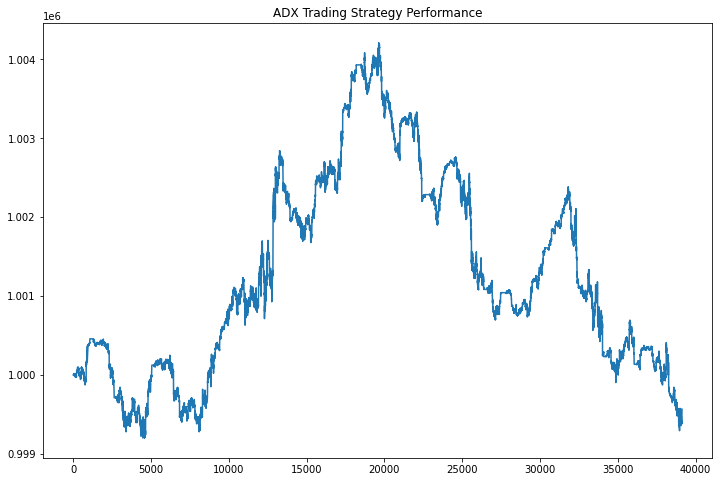

In [6]:

data = data.dropna()

cash = 1_000_000
active_operations = []
com = 0.00125
strategy_value = [1_000_000]
n_shares = 10

for index, row in data.iterrows():
    temp_operations = []
    for op in active_operations:
        if op.stop_loss > row.Close or op.take_profit < row.Close:
            cash += row.Close * op.n_shares * (1 - com)
        else:
            temp_operations.append(op)
    active_operations = temp_operations

    if cash > row.Close * n_shares * (1 + com):
        # Señal de compra
        if pd.notnull(row['prev_DI+']) and pd.notnull(row['prev_DI-']):  # Verifica que los valores previos no sean NaN
            if row['+DI'] > row['-DI'] and row['ADX'] > 25 and row['prev_DI+'] < row['prev_DI-']:
                print(index, "buy")
                active_operations.append(Operation('long', row.Close, row.Timestamp, n_shares, row.Close * 0.95, row.Close * 1.05))
                cash -= row.Close * n_shares * (1 + com)
            elif row['+DI'] < row['-DI'] and row['ADX'] > 25 and row['prev_DI+'] > row['prev_DI-']:
                print(index, "sell")

    total_value = sum(op.n_shares * row.Close for op in active_operations)
    strategy_value.append(cash + total_value)


plt.figure(figsize=(12, 8))
plt.plot(strategy_value)
plt.title('ADX Trading Strategy Performance')
plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
from technical_analysis import TradingStrategy, Operation


In [3]:
strategy = TradingStrategy()
strategy.load_data('5m')

In [4]:
strategy.define_buy_sell_signals()
strategy.activate_indicator('RSI')
strategy.activate_indicator('SMA')
strategy.activate_indicator('MACD')
strategy.activate_indicator('SAR')  
strategy.activate_indicator('ADX') 

In [5]:
data, value = strategy.execute_trades()

In [6]:
data.head(15)

,Unnamed: 0,Timestamp,Gmtoffset,Datetime,Open,High,Low,Close,Volume,RSI,...,RSI_buy,RSI_sell,SMA_buy,SMA_sell,MACD_buy,MACD_sell,SAR_buy,SAR_sell,ADX_buy,ADX_sell
33,33,1609780500,0,2021-01-04 17:15:00,127.410003,128.029998,126.760002,128.005004,2891333.0,26.712155,...,True,False,False,False,False,False,False,False,False,False
34,34,1609780800,0,2021-01-04 17:20:00,128.000793,128.399993,127.750000,128.289993,1956101.0,31.714234,...,False,False,False,False,False,False,True,False,False,False
35,35,1609781100,0,2021-01-04 17:25:00,128.289993,128.320007,127.889999,128.250000,1331407.0,31.390449,...,False,False,False,False,False,False,False,False,False,False
36,36,1609781400,0,2021-01-04 17:30:00,128.246902,128.310104,127.910003,128.119995,1314757.0,30.307246,...,False,False,False,False,False,False,False,False,False,False
37,37,1609781700,0,2021-01-04 17:35:00,128.125000,128.210006,127.889999,127.955001,982464.0,28.942233,...,True,False,False,False,False,False,False,False,False,False
38,38,1609782000,0,2021-01-04 17:40:00,127.950103,128.020004,127.720001,127.980003,1238030.0,29.460690,...,True,False,False,False,False,False,False,False,False,False
39,39,1609782300,0,2021-01-04 17:45:00,127.985000,127.985000,127.650001,127.710098,910041.0,27.157098,...,True,False,False,False,False,False,False,False,False,False
40,40,1609782600,0,2021-01-04 17:50:00,127.709999,128.289993,127.630096,128.229995,1161917.0,37.323323,...,False,False,False,False,True,False,False,False,False,False
41,41,1609782900,0,2021-01-04 17:55:00,128.225006,128.594497,128.169998,128.419998,1592648.0,40.586819,...,False,False,False,False,False,False,False,False,False,False
42,42,1609783200,0,2021-01-04 18:00:00,128.410003,128.600006,128.255996,128.320007,1250689.0,39.423452,...,False,False,False,False,False,False,False,False,False,False


In [7]:
value

[1000000, 998614.9557304129]

In [5]:
strategy.execute_trades()

    Unnamed: 0   Timestamp  Gmtoffset             Datetime        Open  \
33          33  1609780500          0  2021-01-04 17:15:00  127.410003   
34          34  1609780800          0  2021-01-04 17:20:00  128.000793   
35          35  1609781100          0  2021-01-04 17:25:00  128.289993   
36          36  1609781400          0  2021-01-04 17:30:00  128.246902   
37          37  1609781700          0  2021-01-04 17:35:00  128.125000   
38          38  1609782000          0  2021-01-04 17:40:00  127.950103   
39          39  1609782300          0  2021-01-04 17:45:00  127.985000   
40          40  1609782600          0  2021-01-04 17:50:00  127.709999   
41          41  1609782900          0  2021-01-04 17:55:00  128.225006   
42          42  1609783200          0  2021-01-04 18:00:00  128.410003   

          High         Low       Close     Volume        RSI  ...         SAR  \
33  128.029998  126.760002  128.005004  2891333.0  26.712155  ...  128.770004   
34  128.399993  127.750

Señales de compra: 1, Señales de venta: 0 en la fila 487
Señales de compra: 1, Señales de venta: 0 en la fila 488
Señales de compra: 1, Señales de venta: 0 en la fila 489
Señales de compra: 1, Señales de venta: 0 en la fila 490
Señales de compra: 1, Señales de venta: 0 en la fila 491
Señales de compra: 1, Señales de venta: 0 en la fila 492
Señales de compra: 0, Señales de venta: 1 en la fila 493
Señales de compra: 0, Señales de venta: 1 en la fila 494
Señales de compra: 0, Señales de venta: 1 en la fila 495
Señales de compra: 0, Señales de venta: 1 en la fila 496
Señales de compra: 0, Señales de venta: 1 en la fila 497
Señales de compra: 0, Señales de venta: 1 en la fila 498
Señales de compra: 1, Señales de venta: 1 en la fila 499
Señales de compra: 1, Señales de venta: 1 en la fila 500
Señales de compra: 1, Señales de venta: 1 en la fila 501
Señales de compra: 1, Señales de venta: 1 en la fila 502
Señales de compra: 0, Señales de venta: 1 en la fila 503
Señales de compra: 0, Señales d

Señales de compra: 0, Señales de venta: 1 en la fila 857
Señales de compra: 1, Señales de venta: 1 en la fila 858
Señales de compra: 1, Señales de venta: 1 en la fila 859
Señales de compra: 1, Señales de venta: 1 en la fila 860
Señales de compra: 1, Señales de venta: 1 en la fila 861
Señales de compra: 1, Señales de venta: 1 en la fila 862
Señales de compra: 1, Señales de venta: 1 en la fila 863
Señales de compra: 1, Señales de venta: 1 en la fila 864
Señales de compra: 1, Señales de venta: 1 en la fila 865
Señales de compra: 1, Señales de venta: 1 en la fila 866
Señales de compra: 1, Señales de venta: 1 en la fila 867
Señales de compra: 1, Señales de venta: 1 en la fila 868
Señales de compra: 1, Señales de venta: 1 en la fila 869
Señales de compra: 1, Señales de venta: 1 en la fila 870
Señales de compra: 1, Señales de venta: 1 en la fila 871
Señales de compra: 1, Señales de venta: 1 en la fila 872
Señales de compra: 1, Señales de venta: 1 en la fila 873
Señales de compra: 1, Señales d

Señales de compra: 1, Señales de venta: 1 en la fila 1405
Señales de compra: 1, Señales de venta: 1 en la fila 1406
Señales de compra: 1, Señales de venta: 1 en la fila 1407
Señales de compra: 1, Señales de venta: 1 en la fila 1408
Señales de compra: 1, Señales de venta: 1 en la fila 1409
Señales de compra: 1, Señales de venta: 1 en la fila 1410
Señales de compra: 1, Señales de venta: 1 en la fila 1411
Señales de compra: 1, Señales de venta: 1 en la fila 1412
Señales de compra: 1, Señales de venta: 1 en la fila 1413
Señales de compra: 0, Señales de venta: 1 en la fila 1414
Señales de compra: 0, Señales de venta: 1 en la fila 1415
Señales de compra: 0, Señales de venta: 1 en la fila 1416
Señales de compra: 0, Señales de venta: 1 en la fila 1417
Señales de compra: 1, Señales de venta: 1 en la fila 1418
Señales de compra: 1, Señales de venta: 1 en la fila 1419
Señales de compra: 1, Señales de venta: 1 en la fila 1420
Señales de compra: 0, Señales de venta: 1 en la fila 1421
Señales de com

Señales de compra: 0, Señales de venta: 1 en la fila 1801
Señales de compra: 0, Señales de venta: 1 en la fila 1802
Señales de compra: 0, Señales de venta: 1 en la fila 1803
Señales de compra: 0, Señales de venta: 1 en la fila 1804
Señales de compra: 0, Señales de venta: 1 en la fila 1805
Señales de compra: 0, Señales de venta: 1 en la fila 1806
Señales de compra: 0, Señales de venta: 1 en la fila 1807
Señales de compra: 0, Señales de venta: 1 en la fila 1808
Señales de compra: 0, Señales de venta: 1 en la fila 1809
Señales de compra: 0, Señales de venta: 1 en la fila 1810
Señales de compra: 0, Señales de venta: 1 en la fila 1811
Señales de compra: 0, Señales de venta: 1 en la fila 1812
Señales de compra: 0, Señales de venta: 1 en la fila 1813
Señales de compra: 1, Señales de venta: 0 en la fila 1814
Señales de compra: 0, Señales de venta: 1 en la fila 1815
Señales de compra: 0, Señales de venta: 1 en la fila 1816
Señales de compra: 0, Señales de venta: 1 en la fila 1817
Señales de com

Señales de compra: 0, Señales de venta: 1 en la fila 2118
Señales de compra: 0, Señales de venta: 1 en la fila 2119
Señales de compra: 0, Señales de venta: 1 en la fila 2120
Señales de compra: 0, Señales de venta: 1 en la fila 2121
Señales de compra: 0, Señales de venta: 1 en la fila 2122
Señales de compra: 0, Señales de venta: 1 en la fila 2123
Señales de compra: 0, Señales de venta: 1 en la fila 2124
Señales de compra: 0, Señales de venta: 1 en la fila 2125
Señales de compra: 0, Señales de venta: 1 en la fila 2126
Señales de compra: 0, Señales de venta: 1 en la fila 2127
Señales de compra: 0, Señales de venta: 1 en la fila 2128
Señales de compra: 0, Señales de venta: 1 en la fila 2129
Señales de compra: 0, Señales de venta: 1 en la fila 2130
Señales de compra: 0, Señales de venta: 1 en la fila 2131
Señales de compra: 0, Señales de venta: 1 en la fila 2132
Señales de compra: 0, Señales de venta: 1 en la fila 2133
Señales de compra: 0, Señales de venta: 1 en la fila 2134
Señales de com

Señales de compra: 1, Señales de venta: 0 en la fila 2570
Señales de compra: 1, Señales de venta: 0 en la fila 2571
Señales de compra: 1, Señales de venta: 0 en la fila 2572
Señales de compra: 1, Señales de venta: 0 en la fila 2573
Señales de compra: 2, Señales de venta: 0 en la fila 2574
Señales de compra: 0, Señales de venta: 1 en la fila 2575
Señales de compra: 0, Señales de venta: 1 en la fila 2576
Señales de compra: 0, Señales de venta: 1 en la fila 2577
Señales de compra: 0, Señales de venta: 1 en la fila 2578
Señales de compra: 0, Señales de venta: 1 en la fila 2579
Señales de compra: 0, Señales de venta: 1 en la fila 2580
Señales de compra: 0, Señales de venta: 1 en la fila 2581
Señales de compra: 0, Señales de venta: 1 en la fila 2582
Señales de compra: 0, Señales de venta: 1 en la fila 2583
Señales de compra: 1, Señales de venta: 1 en la fila 2584
Señales de compra: 1, Señales de venta: 1 en la fila 2585
Señales de compra: 1, Señales de venta: 1 en la fila 2586
Señales de com

Señales de compra: 1, Señales de venta: 0 en la fila 2730
Señales de compra: 0, Señales de venta: 1 en la fila 2731
Señales de compra: 0, Señales de venta: 1 en la fila 2732
Señales de compra: 0, Señales de venta: 1 en la fila 2733
Señales de compra: 0, Señales de venta: 1 en la fila 2734
Señales de compra: 0, Señales de venta: 1 en la fila 2735
Señales de compra: 1, Señales de venta: 1 en la fila 2736
Señales de compra: 0, Señales de venta: 1 en la fila 2737
Señales de compra: 0, Señales de venta: 1 en la fila 2738
Señales de compra: 0, Señales de venta: 1 en la fila 2739
Señales de compra: 0, Señales de venta: 1 en la fila 2740
Señales de compra: 0, Señales de venta: 1 en la fila 2741
Señales de compra: 0, Señales de venta: 1 en la fila 2742
Señales de compra: 0, Señales de venta: 1 en la fila 2743
Señales de compra: 0, Señales de venta: 1 en la fila 2744
Señales de compra: 0, Señales de venta: 1 en la fila 2745
Señales de compra: 0, Señales de venta: 1 en la fila 2746
Señales de com

Señales de compra: 0, Señales de venta: 1 en la fila 3134
Señales de compra: 0, Señales de venta: 1 en la fila 3135
Señales de compra: 0, Señales de venta: 1 en la fila 3136
Señales de compra: 0, Señales de venta: 1 en la fila 3137
Señales de compra: 1, Señales de venta: 0 en la fila 3138
Señales de compra: 1, Señales de venta: 0 en la fila 3139
Señales de compra: 1, Señales de venta: 0 en la fila 3140
Señales de compra: 1, Señales de venta: 0 en la fila 3141
Señales de compra: 1, Señales de venta: 0 en la fila 3142
Señales de compra: 1, Señales de venta: 0 en la fila 3143
Señales de compra: 1, Señales de venta: 0 en la fila 3144
Señales de compra: 1, Señales de venta: 0 en la fila 3145
Señales de compra: 1, Señales de venta: 0 en la fila 3146
Señales de compra: 1, Señales de venta: 0 en la fila 3147
Señales de compra: 1, Señales de venta: 0 en la fila 3148
Señales de compra: 1, Señales de venta: 0 en la fila 3149
Señales de compra: 0, Señales de venta: 1 en la fila 3150
Señales de com

Señales de compra: 1, Señales de venta: 0 en la fila 3325
Señales de compra: 1, Señales de venta: 0 en la fila 3326
Señales de compra: 1, Señales de venta: 0 en la fila 3327
Señales de compra: 1, Señales de venta: 0 en la fila 3328
Señales de compra: 1, Señales de venta: 0 en la fila 3329
Señales de compra: 1, Señales de venta: 0 en la fila 3330
Señales de compra: 1, Señales de venta: 0 en la fila 3331
Señales de compra: 1, Señales de venta: 0 en la fila 3332
Señales de compra: 1, Señales de venta: 0 en la fila 3333
Señales de compra: 1, Señales de venta: 0 en la fila 3334
Señales de compra: 1, Señales de venta: 0 en la fila 3335
Señales de compra: 1, Señales de venta: 0 en la fila 3336
Señales de compra: 1, Señales de venta: 0 en la fila 3337
Señales de compra: 1, Señales de venta: 0 en la fila 3338
Señales de compra: 1, Señales de venta: 0 en la fila 3339
Señales de compra: 1, Señales de venta: 0 en la fila 3340
Señales de compra: 1, Señales de venta: 0 en la fila 3341
Señales de com

Señales de compra: 0, Señales de venta: 1 en la fila 3728
Señales de compra: 0, Señales de venta: 1 en la fila 3729
Señales de compra: 0, Señales de venta: 1 en la fila 3730
Señales de compra: 1, Señales de venta: 0 en la fila 3731
Señales de compra: 1, Señales de venta: 0 en la fila 3732
Señales de compra: 0, Señales de venta: 1 en la fila 3733
Señales de compra: 0, Señales de venta: 1 en la fila 3734
Señales de compra: 0, Señales de venta: 1 en la fila 3735
Señales de compra: 1, Señales de venta: 0 en la fila 3736
Señales de compra: 1, Señales de venta: 0 en la fila 3737
Señales de compra: 1, Señales de venta: 0 en la fila 3738
Señales de compra: 1, Señales de venta: 0 en la fila 3739
Señales de compra: 1, Señales de venta: 0 en la fila 3740
Señales de compra: 1, Señales de venta: 0 en la fila 3741
Señales de compra: 1, Señales de venta: 0 en la fila 3742
Señales de compra: 1, Señales de venta: 0 en la fila 3743
Señales de compra: 1, Señales de venta: 0 en la fila 3744
Señales de com

Señales de compra: 1, Señales de venta: 1 en la fila 3967
Señales de compra: 1, Señales de venta: 0 en la fila 3968
Señales de compra: 1, Señales de venta: 0 en la fila 3969
Señales de compra: 1, Señales de venta: 0 en la fila 3970
Señales de compra: 1, Señales de venta: 0 en la fila 3971
Señales de compra: 1, Señales de venta: 0 en la fila 3972
Señales de compra: 1, Señales de venta: 0 en la fila 3973
Señales de compra: 1, Señales de venta: 0 en la fila 3974
Señales de compra: 1, Señales de venta: 0 en la fila 3975
Señales de compra: 1, Señales de venta: 0 en la fila 3976
Señales de compra: 0, Señales de venta: 1 en la fila 3977
Señales de compra: 0, Señales de venta: 1 en la fila 3978
Señales de compra: 0, Señales de venta: 1 en la fila 3979
Señales de compra: 1, Señales de venta: 1 en la fila 3980
Señales de compra: 1, Señales de venta: 1 en la fila 3981
Señales de compra: 1, Señales de venta: 1 en la fila 3982
Señales de compra: 0, Señales de venta: 1 en la fila 3983
Señales de com

Señales de compra: 1, Señales de venta: 1 en la fila 4170
Señales de compra: 1, Señales de venta: 1 en la fila 4171
Señales de compra: 1, Señales de venta: 1 en la fila 4172
Señales de compra: 1, Señales de venta: 1 en la fila 4173
Señales de compra: 1, Señales de venta: 1 en la fila 4174
Señales de compra: 1, Señales de venta: 0 en la fila 4175
Señales de compra: 1, Señales de venta: 0 en la fila 4176
Señales de compra: 1, Señales de venta: 0 en la fila 4177
Señales de compra: 1, Señales de venta: 0 en la fila 4178
Señales de compra: 1, Señales de venta: 0 en la fila 4179
Señales de compra: 1, Señales de venta: 0 en la fila 4180
Señales de compra: 1, Señales de venta: 0 en la fila 4181
Señales de compra: 1, Señales de venta: 0 en la fila 4182
Señales de compra: 0, Señales de venta: 1 en la fila 4183
Señales de compra: 0, Señales de venta: 1 en la fila 4184
Señales de compra: 0, Señales de venta: 1 en la fila 4185
Señales de compra: 1, Señales de venta: 0 en la fila 4186
Señales de com

Señales de compra: 0, Señales de venta: 1 en la fila 4425
Señales de compra: 0, Señales de venta: 1 en la fila 4426
Señales de compra: 0, Señales de venta: 1 en la fila 4427
Señales de compra: 0, Señales de venta: 1 en la fila 4428
Señales de compra: 0, Señales de venta: 1 en la fila 4429
Señales de compra: 0, Señales de venta: 1 en la fila 4430
Señales de compra: 0, Señales de venta: 1 en la fila 4431
Señales de compra: 1, Señales de venta: 0 en la fila 4432
Señales de compra: 1, Señales de venta: 0 en la fila 4433
Señales de compra: 1, Señales de venta: 0 en la fila 4434
Señales de compra: 1, Señales de venta: 0 en la fila 4435
Señales de compra: 1, Señales de venta: 0 en la fila 4436
Señales de compra: 1, Señales de venta: 0 en la fila 4437
Señales de compra: 1, Señales de venta: 0 en la fila 4438
Señales de compra: 1, Señales de venta: 0 en la fila 4439
Señales de compra: 1, Señales de venta: 0 en la fila 4440
Señales de compra: 1, Señales de venta: 0 en la fila 4441
Señales de com

Señales de compra: 1, Señales de venta: 0 en la fila 4679
Señales de compra: 1, Señales de venta: 1 en la fila 4680
Señales de compra: 1, Señales de venta: 1 en la fila 4681
Señales de compra: 1, Señales de venta: 1 en la fila 4682
Señales de compra: 1, Señales de venta: 1 en la fila 4683
Señales de compra: 1, Señales de venta: 1 en la fila 4684
Señales de compra: 1, Señales de venta: 1 en la fila 4685
Señales de compra: 1, Señales de venta: 1 en la fila 4686
Señales de compra: 1, Señales de venta: 1 en la fila 4687
Señales de compra: 1, Señales de venta: 1 en la fila 4688
Señales de compra: 1, Señales de venta: 1 en la fila 4689
Señales de compra: 1, Señales de venta: 1 en la fila 4690
Señales de compra: 1, Señales de venta: 1 en la fila 4691
Señales de compra: 1, Señales de venta: 1 en la fila 4692
Señales de compra: 1, Señales de venta: 1 en la fila 4693
Señales de compra: 1, Señales de venta: 1 en la fila 4694
Señales de compra: 1, Señales de venta: 1 en la fila 4695
Señales de com

Señales de compra: 1, Señales de venta: 0 en la fila 4947
Señales de compra: 0, Señales de venta: 1 en la fila 4948
Señales de compra: 0, Señales de venta: 1 en la fila 4949
Señales de compra: 0, Señales de venta: 1 en la fila 4950
Señales de compra: 0, Señales de venta: 1 en la fila 4951
Señales de compra: 0, Señales de venta: 1 en la fila 4952
Señales de compra: 0, Señales de venta: 1 en la fila 4953
Señales de compra: 0, Señales de venta: 1 en la fila 4954
Señales de compra: 0, Señales de venta: 1 en la fila 4955
Señales de compra: 0, Señales de venta: 1 en la fila 4956
Señales de compra: 0, Señales de venta: 1 en la fila 4957
Señales de compra: 0, Señales de venta: 1 en la fila 4958
Señales de compra: 0, Señales de venta: 1 en la fila 4959
Señales de compra: 0, Señales de venta: 1 en la fila 4960
Señales de compra: 0, Señales de venta: 1 en la fila 4961
Señales de compra: 0, Señales de venta: 1 en la fila 4962
Señales de compra: 0, Señales de venta: 1 en la fila 4963
Señales de com

Señales de compra: 1, Señales de venta: 0 en la fila 5195
Señales de compra: 1, Señales de venta: 1 en la fila 5196
Señales de compra: 1, Señales de venta: 1 en la fila 5197
Señales de compra: 1, Señales de venta: 1 en la fila 5198
Señales de compra: 1, Señales de venta: 1 en la fila 5199
Señales de compra: 1, Señales de venta: 0 en la fila 5200
Señales de compra: 1, Señales de venta: 1 en la fila 5201
Señales de compra: 1, Señales de venta: 1 en la fila 5202
Señales de compra: 1, Señales de venta: 0 en la fila 5203
Señales de compra: 1, Señales de venta: 0 en la fila 5204
Señales de compra: 1, Señales de venta: 0 en la fila 5205
Señales de compra: 1, Señales de venta: 0 en la fila 5206
Señales de compra: 1, Señales de venta: 0 en la fila 5207
Señales de compra: 1, Señales de venta: 0 en la fila 5208
Señales de compra: 1, Señales de venta: 0 en la fila 5209
Señales de compra: 0, Señales de venta: 1 en la fila 5210
Señales de compra: 0, Señales de venta: 1 en la fila 5211
Señales de com

Señales de compra: 1, Señales de venta: 0 en la fila 5893
Señales de compra: 0, Señales de venta: 1 en la fila 5894
Señales de compra: 1, Señales de venta: 1 en la fila 5895
Señales de compra: 0, Señales de venta: 1 en la fila 5896
Señales de compra: 0, Señales de venta: 1 en la fila 5897
Señales de compra: 0, Señales de venta: 1 en la fila 5898
Señales de compra: 0, Señales de venta: 1 en la fila 5899
Señales de compra: 1, Señales de venta: 1 en la fila 5900
Señales de compra: 1, Señales de venta: 1 en la fila 5901
Señales de compra: 1, Señales de venta: 1 en la fila 5902
Señales de compra: 1, Señales de venta: 1 en la fila 5903
Señales de compra: 1, Señales de venta: 1 en la fila 5904
Señales de compra: 1, Señales de venta: 1 en la fila 5905
Señales de compra: 0, Señales de venta: 1 en la fila 5906
Señales de compra: 0, Señales de venta: 1 en la fila 5907
Señales de compra: 0, Señales de venta: 1 en la fila 5908
Señales de compra: 0, Señales de venta: 1 en la fila 5909
Señales de com

Señales de compra: 1, Señales de venta: 0 en la fila 6077
Señales de compra: 1, Señales de venta: 0 en la fila 6078
Señales de compra: 0, Señales de venta: 1 en la fila 6079
Señales de compra: 0, Señales de venta: 1 en la fila 6080
Señales de compra: 0, Señales de venta: 1 en la fila 6081
Señales de compra: 0, Señales de venta: 1 en la fila 6082
Señales de compra: 0, Señales de venta: 1 en la fila 6083
Señales de compra: 0, Señales de venta: 1 en la fila 6084
Señales de compra: 0, Señales de venta: 1 en la fila 6085
Señales de compra: 0, Señales de venta: 1 en la fila 6086
Señales de compra: 0, Señales de venta: 1 en la fila 6087
Señales de compra: 0, Señales de venta: 1 en la fila 6088
Señales de compra: 0, Señales de venta: 1 en la fila 6089
Señales de compra: 0, Señales de venta: 1 en la fila 6090
Señales de compra: 0, Señales de venta: 1 en la fila 6091
Señales de compra: 0, Señales de venta: 1 en la fila 6092
Señales de compra: 0, Señales de venta: 1 en la fila 6093
Señales de com

Señales de compra: 0, Señales de venta: 1 en la fila 6314
Señales de compra: 0, Señales de venta: 1 en la fila 6315
Señales de compra: 0, Señales de venta: 1 en la fila 6316
Señales de compra: 0, Señales de venta: 1 en la fila 6317
Señales de compra: 1, Señales de venta: 1 en la fila 6318
Señales de compra: 1, Señales de venta: 1 en la fila 6319
Señales de compra: 1, Señales de venta: 1 en la fila 6320
Señales de compra: 1, Señales de venta: 1 en la fila 6321
Señales de compra: 1, Señales de venta: 1 en la fila 6322
Señales de compra: 0, Señales de venta: 1 en la fila 6323
Señales de compra: 0, Señales de venta: 1 en la fila 6324
Señales de compra: 0, Señales de venta: 1 en la fila 6325
Señales de compra: 0, Señales de venta: 1 en la fila 6326
Señales de compra: 0, Señales de venta: 1 en la fila 6327
Señales de compra: 0, Señales de venta: 1 en la fila 6328
Señales de compra: 0, Señales de venta: 1 en la fila 6329
Señales de compra: 0, Señales de venta: 1 en la fila 6330
Señales de com

Señales de compra: 1, Señales de venta: 0 en la fila 6460
Señales de compra: 1, Señales de venta: 0 en la fila 6461
Señales de compra: 1, Señales de venta: 0 en la fila 6462
Señales de compra: 1, Señales de venta: 0 en la fila 6463
Señales de compra: 1, Señales de venta: 0 en la fila 6464
Señales de compra: 1, Señales de venta: 0 en la fila 6465
Señales de compra: 1, Señales de venta: 0 en la fila 6466
Señales de compra: 1, Señales de venta: 0 en la fila 6467
Señales de compra: 0, Señales de venta: 1 en la fila 6468
Señales de compra: 0, Señales de venta: 1 en la fila 6469
Señales de compra: 0, Señales de venta: 1 en la fila 6470
Señales de compra: 0, Señales de venta: 1 en la fila 6471
Señales de compra: 0, Señales de venta: 1 en la fila 6472
Señales de compra: 0, Señales de venta: 1 en la fila 6473
Señales de compra: 1, Señales de venta: 1 en la fila 6474
Señales de compra: 1, Señales de venta: 1 en la fila 6475
Señales de compra: 1, Señales de venta: 1 en la fila 6476
Señales de com

Señales de compra: 1, Señales de venta: 0 en la fila 6656
Señales de compra: 1, Señales de venta: 0 en la fila 6657
Señales de compra: 1, Señales de venta: 0 en la fila 6658
Señales de compra: 1, Señales de venta: 0 en la fila 6659
Señales de compra: 1, Señales de venta: 0 en la fila 6660
Señales de compra: 1, Señales de venta: 0 en la fila 6661
Señales de compra: 1, Señales de venta: 0 en la fila 6662
Señales de compra: 1, Señales de venta: 0 en la fila 6663
Señales de compra: 1, Señales de venta: 0 en la fila 6664
Señales de compra: 1, Señales de venta: 0 en la fila 6665
Señales de compra: 1, Señales de venta: 0 en la fila 6666
Señales de compra: 1, Señales de venta: 0 en la fila 6667
Señales de compra: 1, Señales de venta: 0 en la fila 6668
Señales de compra: 1, Señales de venta: 0 en la fila 6669
Señales de compra: 1, Señales de venta: 0 en la fila 6670
Señales de compra: 1, Señales de venta: 0 en la fila 6671
Señales de compra: 1, Señales de venta: 0 en la fila 6672
Señales de com

Señales de compra: 0, Señales de venta: 1 en la fila 6950
Señales de compra: 0, Señales de venta: 1 en la fila 6951
Señales de compra: 0, Señales de venta: 1 en la fila 6952
Señales de compra: 0, Señales de venta: 1 en la fila 6953
Señales de compra: 0, Señales de venta: 1 en la fila 6954
Señales de compra: 0, Señales de venta: 1 en la fila 6955
Señales de compra: 0, Señales de venta: 1 en la fila 6956
Señales de compra: 0, Señales de venta: 1 en la fila 6957
Señales de compra: 1, Señales de venta: 1 en la fila 6958
Señales de compra: 1, Señales de venta: 1 en la fila 6959
Señales de compra: 1, Señales de venta: 1 en la fila 6960
Señales de compra: 1, Señales de venta: 1 en la fila 6961
Señales de compra: 1, Señales de venta: 1 en la fila 6962
Señales de compra: 1, Señales de venta: 1 en la fila 6963
Señales de compra: 0, Señales de venta: 1 en la fila 6964
Señales de compra: 0, Señales de venta: 1 en la fila 6965
Señales de compra: 0, Señales de venta: 1 en la fila 6966
Señales de com

Señales de compra: 1, Señales de venta: 0 en la fila 7280
Señales de compra: 1, Señales de venta: 0 en la fila 7281
Señales de compra: 1, Señales de venta: 0 en la fila 7282
Señales de compra: 1, Señales de venta: 0 en la fila 7283
Señales de compra: 1, Señales de venta: 0 en la fila 7284
Señales de compra: 1, Señales de venta: 0 en la fila 7285
Señales de compra: 0, Señales de venta: 1 en la fila 7286
Señales de compra: 0, Señales de venta: 1 en la fila 7287
Señales de compra: 0, Señales de venta: 1 en la fila 7288
Señales de compra: 0, Señales de venta: 1 en la fila 7289
Señales de compra: 0, Señales de venta: 1 en la fila 7290
Señales de compra: 0, Señales de venta: 1 en la fila 7291
Señales de compra: 0, Señales de venta: 1 en la fila 7292
Señales de compra: 0, Señales de venta: 1 en la fila 7293
Señales de compra: 0, Señales de venta: 1 en la fila 7294
Señales de compra: 0, Señales de venta: 1 en la fila 7295
Señales de compra: 0, Señales de venta: 1 en la fila 7296
Señales de com

Señales de compra: 0, Señales de venta: 1 en la fila 7520
Señales de compra: 0, Señales de venta: 1 en la fila 7521
Señales de compra: 0, Señales de venta: 1 en la fila 7522
Señales de compra: 0, Señales de venta: 1 en la fila 7523
Señales de compra: 0, Señales de venta: 1 en la fila 7524
Señales de compra: 0, Señales de venta: 1 en la fila 7525
Señales de compra: 0, Señales de venta: 1 en la fila 7526
Señales de compra: 0, Señales de venta: 1 en la fila 7527
Señales de compra: 0, Señales de venta: 1 en la fila 7528
Señales de compra: 0, Señales de venta: 1 en la fila 7529
Señales de compra: 0, Señales de venta: 1 en la fila 7530
Señales de compra: 0, Señales de venta: 1 en la fila 7531
Señales de compra: 0, Señales de venta: 1 en la fila 7532
Señales de compra: 0, Señales de venta: 1 en la fila 7533
Señales de compra: 0, Señales de venta: 1 en la fila 7534
Señales de compra: 0, Señales de venta: 1 en la fila 7535
Señales de compra: 0, Señales de venta: 1 en la fila 7536
Señales de com

Señales de compra: 1, Señales de venta: 0 en la fila 7995
Señales de compra: 1, Señales de venta: 0 en la fila 7996
Señales de compra: 1, Señales de venta: 0 en la fila 7997
Señales de compra: 1, Señales de venta: 0 en la fila 7998
Señales de compra: 1, Señales de venta: 0 en la fila 7999
Señales de compra: 1, Señales de venta: 0 en la fila 8000
Señales de compra: 1, Señales de venta: 0 en la fila 8001
Señales de compra: 1, Señales de venta: 0 en la fila 8002
Señales de compra: 1, Señales de venta: 0 en la fila 8003
Señales de compra: 0, Señales de venta: 1 en la fila 8004
Señales de compra: 0, Señales de venta: 1 en la fila 8005
Señales de compra: 0, Señales de venta: 1 en la fila 8006
Señales de compra: 0, Señales de venta: 1 en la fila 8007
Señales de compra: 0, Señales de venta: 1 en la fila 8008
Señales de compra: 0, Señales de venta: 1 en la fila 8009
Señales de compra: 0, Señales de venta: 1 en la fila 8010
Señales de compra: 1, Señales de venta: 0 en la fila 8011
Señales de com

Señales de compra: 1, Señales de venta: 0 en la fila 8491
Señales de compra: 1, Señales de venta: 0 en la fila 8492
Señales de compra: 1, Señales de venta: 0 en la fila 8493
Señales de compra: 1, Señales de venta: 0 en la fila 8494
Señales de compra: 1, Señales de venta: 0 en la fila 8495
Señales de compra: 1, Señales de venta: 0 en la fila 8496
Señales de compra: 1, Señales de venta: 0 en la fila 8497
Señales de compra: 1, Señales de venta: 0 en la fila 8498
Señales de compra: 0, Señales de venta: 1 en la fila 8499
Señales de compra: 0, Señales de venta: 1 en la fila 8500
Señales de compra: 0, Señales de venta: 1 en la fila 8501
Señales de compra: 0, Señales de venta: 1 en la fila 8502
Señales de compra: 0, Señales de venta: 1 en la fila 8503
Señales de compra: 0, Señales de venta: 1 en la fila 8504
Señales de compra: 0, Señales de venta: 1 en la fila 8505
Señales de compra: 0, Señales de venta: 1 en la fila 8506
Señales de compra: 1, Señales de venta: 0 en la fila 8507
Señales de com

Señales de compra: 1, Señales de venta: 0 en la fila 8996
Señales de compra: 1, Señales de venta: 0 en la fila 8997
Señales de compra: 0, Señales de venta: 1 en la fila 8998
Señales de compra: 1, Señales de venta: 1 en la fila 9000
Señales de compra: 0, Señales de venta: 1 en la fila 9001
Señales de compra: 0, Señales de venta: 1 en la fila 9002
Señales de compra: 0, Señales de venta: 1 en la fila 9003
Señales de compra: 1, Señales de venta: 1 en la fila 9004
Señales de compra: 0, Señales de venta: 1 en la fila 9005
Señales de compra: 0, Señales de venta: 1 en la fila 9006
Señales de compra: 0, Señales de venta: 1 en la fila 9007
Señales de compra: 0, Señales de venta: 1 en la fila 9008
Señales de compra: 0, Señales de venta: 1 en la fila 9009
Señales de compra: 0, Señales de venta: 1 en la fila 9010
Señales de compra: 0, Señales de venta: 1 en la fila 9011
Señales de compra: 0, Señales de venta: 1 en la fila 9012
Señales de compra: 0, Señales de venta: 1 en la fila 9013
Señales de com

Señales de compra: 1, Señales de venta: 0 en la fila 9287
Señales de compra: 1, Señales de venta: 0 en la fila 9288
Señales de compra: 1, Señales de venta: 0 en la fila 9289
Señales de compra: 1, Señales de venta: 0 en la fila 9290
Señales de compra: 1, Señales de venta: 0 en la fila 9291
Señales de compra: 1, Señales de venta: 0 en la fila 9292
Señales de compra: 1, Señales de venta: 0 en la fila 9293
Señales de compra: 1, Señales de venta: 0 en la fila 9294
Señales de compra: 0, Señales de venta: 1 en la fila 9295
Señales de compra: 0, Señales de venta: 1 en la fila 9296
Señales de compra: 0, Señales de venta: 1 en la fila 9297
Señales de compra: 0, Señales de venta: 1 en la fila 9298
Señales de compra: 0, Señales de venta: 1 en la fila 9299
Señales de compra: 0, Señales de venta: 1 en la fila 9300
Señales de compra: 0, Señales de venta: 1 en la fila 9301
Señales de compra: 0, Señales de venta: 1 en la fila 9302
Señales de compra: 1, Señales de venta: 0 en la fila 9303
Señales de com

Señales de compra: 1, Señales de venta: 1 en la fila 9486
Señales de compra: 1, Señales de venta: 1 en la fila 9487
Señales de compra: 1, Señales de venta: 1 en la fila 9488
Señales de compra: 1, Señales de venta: 1 en la fila 9489
Señales de compra: 1, Señales de venta: 1 en la fila 9490
Señales de compra: 1, Señales de venta: 0 en la fila 9491
Señales de compra: 1, Señales de venta: 0 en la fila 9492
Señales de compra: 1, Señales de venta: 0 en la fila 9493
Señales de compra: 1, Señales de venta: 0 en la fila 9494
Señales de compra: 0, Señales de venta: 1 en la fila 9495
Señales de compra: 0, Señales de venta: 1 en la fila 9496
Señales de compra: 0, Señales de venta: 1 en la fila 9497
Señales de compra: 0, Señales de venta: 1 en la fila 9498
Señales de compra: 1, Señales de venta: 0 en la fila 9499
Señales de compra: 1, Señales de venta: 0 en la fila 9500
Señales de compra: 1, Señales de venta: 0 en la fila 9501
Señales de compra: 1, Señales de venta: 0 en la fila 9502
Señales de com

Señales de compra: 1, Señales de venta: 0 en la fila 10008
Señales de compra: 1, Señales de venta: 0 en la fila 10009
Señales de compra: 1, Señales de venta: 0 en la fila 10010
Señales de compra: 1, Señales de venta: 0 en la fila 10011
Señales de compra: 0, Señales de venta: 1 en la fila 10012
Señales de compra: 0, Señales de venta: 1 en la fila 10013
Señales de compra: 0, Señales de venta: 1 en la fila 10014
Señales de compra: 1, Señales de venta: 0 en la fila 10015
Señales de compra: 1, Señales de venta: 0 en la fila 10016
Señales de compra: 1, Señales de venta: 0 en la fila 10017
Señales de compra: 1, Señales de venta: 0 en la fila 10018
Señales de compra: 0, Señales de venta: 1 en la fila 10019
Señales de compra: 0, Señales de venta: 1 en la fila 10020
Señales de compra: 0, Señales de venta: 1 en la fila 10021
Señales de compra: 0, Señales de venta: 1 en la fila 10022
Señales de compra: 1, Señales de venta: 0 en la fila 10023
Señales de compra: 1, Señales de venta: 0 en la fila 100

Señales de compra: 1, Señales de venta: 1 en la fila 10361
Señales de compra: 1, Señales de venta: 0 en la fila 10362
Señales de compra: 1, Señales de venta: 0 en la fila 10363
Señales de compra: 1, Señales de venta: 0 en la fila 10364
Señales de compra: 1, Señales de venta: 0 en la fila 10365
Señales de compra: 1, Señales de venta: 0 en la fila 10366
Señales de compra: 1, Señales de venta: 0 en la fila 10367
Señales de compra: 1, Señales de venta: 0 en la fila 10368
Señales de compra: 0, Señales de venta: 1 en la fila 10369
Señales de compra: 0, Señales de venta: 1 en la fila 10370
Señales de compra: 0, Señales de venta: 1 en la fila 10371
Señales de compra: 0, Señales de venta: 1 en la fila 10372
Señales de compra: 0, Señales de venta: 1 en la fila 10373
Señales de compra: 0, Señales de venta: 1 en la fila 10374
Señales de compra: 0, Señales de venta: 1 en la fila 10375
Señales de compra: 0, Señales de venta: 1 en la fila 10376
Señales de compra: 0, Señales de venta: 1 en la fila 103

Señales de compra: 1, Señales de venta: 0 en la fila 10649
Señales de compra: 1, Señales de venta: 0 en la fila 10650
Señales de compra: 0, Señales de venta: 1 en la fila 10651
Señales de compra: 0, Señales de venta: 1 en la fila 10652
Señales de compra: 0, Señales de venta: 1 en la fila 10653
Señales de compra: 0, Señales de venta: 1 en la fila 10654
Señales de compra: 0, Señales de venta: 1 en la fila 10655
Señales de compra: 0, Señales de venta: 1 en la fila 10656
Señales de compra: 0, Señales de venta: 1 en la fila 10657
Señales de compra: 1, Señales de venta: 0 en la fila 10659
Señales de compra: 1, Señales de venta: 0 en la fila 10660
Señales de compra: 1, Señales de venta: 1 en la fila 10661
Señales de compra: 1, Señales de venta: 1 en la fila 10662
Señales de compra: 1, Señales de venta: 1 en la fila 10663
Señales de compra: 1, Señales de venta: 1 en la fila 10664
Señales de compra: 1, Señales de venta: 0 en la fila 10665
Señales de compra: 1, Señales de venta: 0 en la fila 106

Señales de compra: 1, Señales de venta: 0 en la fila 10865
Señales de compra: 1, Señales de venta: 0 en la fila 10866
Señales de compra: 1, Señales de venta: 0 en la fila 10867
Señales de compra: 1, Señales de venta: 0 en la fila 10868
Señales de compra: 1, Señales de venta: 0 en la fila 10869
Señales de compra: 1, Señales de venta: 0 en la fila 10870
Señales de compra: 1, Señales de venta: 0 en la fila 10871
Señales de compra: 1, Señales de venta: 0 en la fila 10872
Señales de compra: 0, Señales de venta: 1 en la fila 10873
Señales de compra: 0, Señales de venta: 1 en la fila 10874
Señales de compra: 0, Señales de venta: 1 en la fila 10875
Señales de compra: 0, Señales de venta: 1 en la fila 10876
Señales de compra: 0, Señales de venta: 1 en la fila 10877
Señales de compra: 0, Señales de venta: 1 en la fila 10878
Señales de compra: 0, Señales de venta: 1 en la fila 10879
Señales de compra: 0, Señales de venta: 1 en la fila 10880
Señales de compra: 0, Señales de venta: 1 en la fila 108

Señales de compra: 1, Señales de venta: 0 en la fila 11115
Señales de compra: 1, Señales de venta: 0 en la fila 11116
Señales de compra: 1, Señales de venta: 0 en la fila 11117
Señales de compra: 1, Señales de venta: 0 en la fila 11118
Señales de compra: 1, Señales de venta: 0 en la fila 11119
Señales de compra: 1, Señales de venta: 0 en la fila 11120
Señales de compra: 1, Señales de venta: 0 en la fila 11121
Señales de compra: 1, Señales de venta: 0 en la fila 11122
Señales de compra: 1, Señales de venta: 0 en la fila 11123
Señales de compra: 1, Señales de venta: 0 en la fila 11124
Señales de compra: 1, Señales de venta: 0 en la fila 11125
Señales de compra: 1, Señales de venta: 0 en la fila 11126
Señales de compra: 1, Señales de venta: 0 en la fila 11127
Señales de compra: 0, Señales de venta: 1 en la fila 11128
Señales de compra: 0, Señales de venta: 1 en la fila 11129
Señales de compra: 0, Señales de venta: 1 en la fila 11130
Señales de compra: 0, Señales de venta: 1 en la fila 111

Señales de compra: 0, Señales de venta: 1 en la fila 11362
Señales de compra: 0, Señales de venta: 1 en la fila 11363
Señales de compra: 0, Señales de venta: 1 en la fila 11364
Señales de compra: 0, Señales de venta: 1 en la fila 11365
Señales de compra: 0, Señales de venta: 1 en la fila 11366
Señales de compra: 0, Señales de venta: 1 en la fila 11367
Señales de compra: 0, Señales de venta: 1 en la fila 11368
Señales de compra: 0, Señales de venta: 1 en la fila 11369
Señales de compra: 0, Señales de venta: 1 en la fila 11370
Señales de compra: 0, Señales de venta: 1 en la fila 11371
Señales de compra: 0, Señales de venta: 1 en la fila 11372
Señales de compra: 0, Señales de venta: 1 en la fila 11373
Señales de compra: 0, Señales de venta: 1 en la fila 11374
Señales de compra: 0, Señales de venta: 1 en la fila 11375
Señales de compra: 0, Señales de venta: 1 en la fila 11376
Señales de compra: 0, Señales de venta: 1 en la fila 11377
Señales de compra: 1, Señales de venta: 0 en la fila 113

Señales de compra: 1, Señales de venta: 0 en la fila 11662
Señales de compra: 1, Señales de venta: 0 en la fila 11663
Señales de compra: 1, Señales de venta: 0 en la fila 11664
Señales de compra: 1, Señales de venta: 0 en la fila 11665
Señales de compra: 1, Señales de venta: 0 en la fila 11666
Señales de compra: 0, Señales de venta: 1 en la fila 11667
Señales de compra: 0, Señales de venta: 1 en la fila 11668
Señales de compra: 0, Señales de venta: 1 en la fila 11669
Señales de compra: 0, Señales de venta: 1 en la fila 11670
Señales de compra: 0, Señales de venta: 1 en la fila 11671
Señales de compra: 0, Señales de venta: 1 en la fila 11672
Señales de compra: 0, Señales de venta: 1 en la fila 11673
Señales de compra: 0, Señales de venta: 1 en la fila 11674
Señales de compra: 0, Señales de venta: 1 en la fila 11675
Señales de compra: 0, Señales de venta: 1 en la fila 11676
Señales de compra: 0, Señales de venta: 1 en la fila 11677
Señales de compra: 1, Señales de venta: 1 en la fila 116

Señales de compra: 1, Señales de venta: 1 en la fila 12011
Señales de compra: 1, Señales de venta: 1 en la fila 12012
Señales de compra: 1, Señales de venta: 1 en la fila 12013
Señales de compra: 1, Señales de venta: 0 en la fila 12014
Señales de compra: 1, Señales de venta: 1 en la fila 12015
Señales de compra: 1, Señales de venta: 1 en la fila 12016
Señales de compra: 1, Señales de venta: 1 en la fila 12017
Señales de compra: 1, Señales de venta: 1 en la fila 12018
Señales de compra: 1, Señales de venta: 1 en la fila 12019
Señales de compra: 1, Señales de venta: 1 en la fila 12020
Señales de compra: 1, Señales de venta: 1 en la fila 12021
Señales de compra: 1, Señales de venta: 1 en la fila 12022
Señales de compra: 1, Señales de venta: 1 en la fila 12023
Señales de compra: 1, Señales de venta: 1 en la fila 12024
Señales de compra: 1, Señales de venta: 1 en la fila 12025
Señales de compra: 1, Señales de venta: 1 en la fila 12026
Señales de compra: 1, Señales de venta: 0 en la fila 120

Señales de compra: 0, Señales de venta: 1 en la fila 12285
Señales de compra: 0, Señales de venta: 1 en la fila 12286
Señales de compra: 0, Señales de venta: 1 en la fila 12287
Señales de compra: 0, Señales de venta: 1 en la fila 12288
Señales de compra: 0, Señales de venta: 1 en la fila 12289
Señales de compra: 0, Señales de venta: 1 en la fila 12290
Señales de compra: 0, Señales de venta: 1 en la fila 12291
Señales de compra: 0, Señales de venta: 1 en la fila 12292
Señales de compra: 0, Señales de venta: 1 en la fila 12293
Señales de compra: 1, Señales de venta: 0 en la fila 12294
Señales de compra: 1, Señales de venta: 0 en la fila 12295
Señales de compra: 1, Señales de venta: 0 en la fila 12296
Señales de compra: 1, Señales de venta: 0 en la fila 12297
Señales de compra: 1, Señales de venta: 0 en la fila 12298
Señales de compra: 1, Señales de venta: 0 en la fila 12299
Señales de compra: 1, Señales de venta: 0 en la fila 12300
Señales de compra: 1, Señales de venta: 0 en la fila 123

Señales de compra: 1, Señales de venta: 0 en la fila 12593
Señales de compra: 1, Señales de venta: 0 en la fila 12594
Señales de compra: 0, Señales de venta: 1 en la fila 12595
Señales de compra: 1, Señales de venta: 0 en la fila 12596
Señales de compra: 1, Señales de venta: 0 en la fila 12597
Señales de compra: 1, Señales de venta: 0 en la fila 12598
Señales de compra: 1, Señales de venta: 0 en la fila 12599
Señales de compra: 1, Señales de venta: 0 en la fila 12600
Señales de compra: 1, Señales de venta: 0 en la fila 12601
Señales de compra: 1, Señales de venta: 0 en la fila 12602
Señales de compra: 0, Señales de venta: 1 en la fila 12603
Señales de compra: 0, Señales de venta: 1 en la fila 12604
Señales de compra: 0, Señales de venta: 1 en la fila 12605
Señales de compra: 1, Señales de venta: 0 en la fila 12606
Señales de compra: 1, Señales de venta: 0 en la fila 12607
Señales de compra: 1, Señales de venta: 0 en la fila 12608
Señales de compra: 1, Señales de venta: 0 en la fila 126

Señales de compra: 1, Señales de venta: 0 en la fila 12883
Señales de compra: 1, Señales de venta: 0 en la fila 12884
Señales de compra: 1, Señales de venta: 0 en la fila 12885
Señales de compra: 1, Señales de venta: 0 en la fila 12886
Señales de compra: 1, Señales de venta: 0 en la fila 12887
Señales de compra: 1, Señales de venta: 0 en la fila 12888
Señales de compra: 1, Señales de venta: 0 en la fila 12889
Señales de compra: 1, Señales de venta: 0 en la fila 12890
Señales de compra: 1, Señales de venta: 0 en la fila 12891
Señales de compra: 1, Señales de venta: 0 en la fila 12892
Señales de compra: 1, Señales de venta: 0 en la fila 12893
Señales de compra: 1, Señales de venta: 0 en la fila 12894
Señales de compra: 1, Señales de venta: 0 en la fila 12895
Señales de compra: 1, Señales de venta: 0 en la fila 12896
Señales de compra: 1, Señales de venta: 0 en la fila 12897
Señales de compra: 1, Señales de venta: 0 en la fila 12898
Señales de compra: 1, Señales de venta: 0 en la fila 128

Señales de compra: 1, Señales de venta: 0 en la fila 13515
Señales de compra: 1, Señales de venta: 0 en la fila 13516
Señales de compra: 1, Señales de venta: 0 en la fila 13517
Señales de compra: 1, Señales de venta: 0 en la fila 13518
Señales de compra: 1, Señales de venta: 0 en la fila 13519
Señales de compra: 0, Señales de venta: 1 en la fila 13520
Señales de compra: 0, Señales de venta: 1 en la fila 13521
Señales de compra: 0, Señales de venta: 1 en la fila 13522
Señales de compra: 0, Señales de venta: 1 en la fila 13523
Señales de compra: 0, Señales de venta: 1 en la fila 13524
Señales de compra: 0, Señales de venta: 1 en la fila 13525
Señales de compra: 0, Señales de venta: 1 en la fila 13526
Señales de compra: 0, Señales de venta: 1 en la fila 13527
Señales de compra: 0, Señales de venta: 1 en la fila 13528
Señales de compra: 0, Señales de venta: 1 en la fila 13529
Señales de compra: 0, Señales de venta: 1 en la fila 13530
Señales de compra: 0, Señales de venta: 1 en la fila 135

Señales de compra: 1, Señales de venta: 0 en la fila 13849
Señales de compra: 1, Señales de venta: 0 en la fila 13850
Señales de compra: 1, Señales de venta: 0 en la fila 13851
Señales de compra: 1, Señales de venta: 0 en la fila 13852
Señales de compra: 1, Señales de venta: 0 en la fila 13853
Señales de compra: 1, Señales de venta: 0 en la fila 13854
Señales de compra: 1, Señales de venta: 0 en la fila 13855
Señales de compra: 1, Señales de venta: 0 en la fila 13856
Señales de compra: 1, Señales de venta: 0 en la fila 13857
Señales de compra: 1, Señales de venta: 0 en la fila 13858
Señales de compra: 1, Señales de venta: 0 en la fila 13859
Señales de compra: 1, Señales de venta: 0 en la fila 13860
Señales de compra: 1, Señales de venta: 0 en la fila 13861
Señales de compra: 1, Señales de venta: 0 en la fila 13862
Señales de compra: 1, Señales de venta: 0 en la fila 13863
Señales de compra: 1, Señales de venta: 0 en la fila 13864
Señales de compra: 1, Señales de venta: 0 en la fila 138

Señales de compra: 1, Señales de venta: 0 en la fila 14394
Señales de compra: 0, Señales de venta: 1 en la fila 14395
Señales de compra: 0, Señales de venta: 1 en la fila 14396
Señales de compra: 0, Señales de venta: 1 en la fila 14397
Señales de compra: 0, Señales de venta: 1 en la fila 14398
Señales de compra: 1, Señales de venta: 0 en la fila 14399
Señales de compra: 1, Señales de venta: 0 en la fila 14400
Señales de compra: 1, Señales de venta: 0 en la fila 14401
Señales de compra: 1, Señales de venta: 0 en la fila 14402
Señales de compra: 1, Señales de venta: 0 en la fila 14403
Señales de compra: 1, Señales de venta: 0 en la fila 14404
Señales de compra: 1, Señales de venta: 0 en la fila 14405
Señales de compra: 1, Señales de venta: 0 en la fila 14406
Señales de compra: 1, Señales de venta: 0 en la fila 14407
Señales de compra: 1, Señales de venta: 0 en la fila 14408
Señales de compra: 1, Señales de venta: 0 en la fila 14409
Señales de compra: 1, Señales de venta: 0 en la fila 144

Señales de compra: 1, Señales de venta: 1 en la fila 14831
Señales de compra: 1, Señales de venta: 1 en la fila 14832
Señales de compra: 1, Señales de venta: 1 en la fila 14833
Señales de compra: 1, Señales de venta: 1 en la fila 14834
Señales de compra: 1, Señales de venta: 1 en la fila 14835
Señales de compra: 1, Señales de venta: 1 en la fila 14836
Señales de compra: 1, Señales de venta: 0 en la fila 14837
Señales de compra: 1, Señales de venta: 1 en la fila 14838
Señales de compra: 1, Señales de venta: 0 en la fila 14839
Señales de compra: 1, Señales de venta: 1 en la fila 14840
Señales de compra: 1, Señales de venta: 0 en la fila 14841
Señales de compra: 1, Señales de venta: 1 en la fila 14842
Señales de compra: 1, Señales de venta: 0 en la fila 14843
Señales de compra: 1, Señales de venta: 0 en la fila 14845
Señales de compra: 0, Señales de venta: 1 en la fila 14846
Señales de compra: 0, Señales de venta: 1 en la fila 14847
Señales de compra: 0, Señales de venta: 1 en la fila 148

Señales de compra: 0, Señales de venta: 1 en la fila 15206
Señales de compra: 1, Señales de venta: 1 en la fila 15207
Señales de compra: 0, Señales de venta: 1 en la fila 15208
Señales de compra: 0, Señales de venta: 1 en la fila 15209
Señales de compra: 0, Señales de venta: 1 en la fila 15210
Señales de compra: 0, Señales de venta: 1 en la fila 15211
Señales de compra: 0, Señales de venta: 1 en la fila 15212
Señales de compra: 0, Señales de venta: 1 en la fila 15213
Señales de compra: 0, Señales de venta: 1 en la fila 15214
Señales de compra: 0, Señales de venta: 1 en la fila 15215
Señales de compra: 0, Señales de venta: 1 en la fila 15216
Señales de compra: 1, Señales de venta: 0 en la fila 15217
Señales de compra: 1, Señales de venta: 0 en la fila 15218
Señales de compra: 1, Señales de venta: 0 en la fila 15219
Señales de compra: 1, Señales de venta: 0 en la fila 15220
Señales de compra: 1, Señales de venta: 0 en la fila 15221
Señales de compra: 1, Señales de venta: 0 en la fila 152

Señales de compra: 1, Señales de venta: 0 en la fila 15576
Señales de compra: 1, Señales de venta: 0 en la fila 15577
Señales de compra: 1, Señales de venta: 0 en la fila 15578
Señales de compra: 1, Señales de venta: 0 en la fila 15579
Señales de compra: 1, Señales de venta: 0 en la fila 15580
Señales de compra: 1, Señales de venta: 0 en la fila 15581
Señales de compra: 0, Señales de venta: 1 en la fila 15582
Señales de compra: 0, Señales de venta: 1 en la fila 15583
Señales de compra: 0, Señales de venta: 1 en la fila 15584
Señales de compra: 0, Señales de venta: 1 en la fila 15585
Señales de compra: 0, Señales de venta: 1 en la fila 15586
Señales de compra: 0, Señales de venta: 1 en la fila 15587
Señales de compra: 0, Señales de venta: 1 en la fila 15588
Señales de compra: 0, Señales de venta: 1 en la fila 15589
Señales de compra: 0, Señales de venta: 1 en la fila 15590
Señales de compra: 0, Señales de venta: 1 en la fila 15591
Señales de compra: 0, Señales de venta: 1 en la fila 155

Señales de compra: 0, Señales de venta: 1 en la fila 16038
Señales de compra: 0, Señales de venta: 1 en la fila 16039
Señales de compra: 0, Señales de venta: 1 en la fila 16040
Señales de compra: 0, Señales de venta: 1 en la fila 16041
Señales de compra: 0, Señales de venta: 1 en la fila 16042
Señales de compra: 0, Señales de venta: 1 en la fila 16043
Señales de compra: 0, Señales de venta: 1 en la fila 16044
Señales de compra: 0, Señales de venta: 1 en la fila 16045
Señales de compra: 0, Señales de venta: 1 en la fila 16046
Señales de compra: 0, Señales de venta: 1 en la fila 16047
Señales de compra: 0, Señales de venta: 1 en la fila 16048
Señales de compra: 0, Señales de venta: 1 en la fila 16049
Señales de compra: 0, Señales de venta: 1 en la fila 16050
Señales de compra: 1, Señales de venta: 0 en la fila 16051
Señales de compra: 1, Señales de venta: 0 en la fila 16052
Señales de compra: 1, Señales de venta: 0 en la fila 16053
Señales de compra: 1, Señales de venta: 0 en la fila 160

Señales de compra: 1, Señales de venta: 0 en la fila 16471
Señales de compra: 1, Señales de venta: 0 en la fila 16472
Señales de compra: 0, Señales de venta: 1 en la fila 16473
Señales de compra: 0, Señales de venta: 1 en la fila 16474
Señales de compra: 0, Señales de venta: 1 en la fila 16475
Señales de compra: 0, Señales de venta: 1 en la fila 16476
Señales de compra: 0, Señales de venta: 1 en la fila 16477
Señales de compra: 0, Señales de venta: 1 en la fila 16478
Señales de compra: 0, Señales de venta: 1 en la fila 16479
Señales de compra: 0, Señales de venta: 1 en la fila 16480
Señales de compra: 0, Señales de venta: 1 en la fila 16481
Señales de compra: 0, Señales de venta: 1 en la fila 16482
Señales de compra: 0, Señales de venta: 1 en la fila 16483
Señales de compra: 0, Señales de venta: 1 en la fila 16484
Señales de compra: 0, Señales de venta: 1 en la fila 16485
Señales de compra: 0, Señales de venta: 1 en la fila 16486
Señales de compra: 0, Señales de venta: 1 en la fila 164

Señales de compra: 1, Señales de venta: 0 en la fila 16717
Señales de compra: 1, Señales de venta: 0 en la fila 16718
Señales de compra: 1, Señales de venta: 0 en la fila 16719
Señales de compra: 1, Señales de venta: 0 en la fila 16720
Señales de compra: 1, Señales de venta: 0 en la fila 16721
Señales de compra: 0, Señales de venta: 1 en la fila 16722
Señales de compra: 0, Señales de venta: 1 en la fila 16723
Señales de compra: 0, Señales de venta: 1 en la fila 16724
Señales de compra: 0, Señales de venta: 1 en la fila 16725
Señales de compra: 0, Señales de venta: 1 en la fila 16726
Señales de compra: 0, Señales de venta: 1 en la fila 16727
Señales de compra: 0, Señales de venta: 1 en la fila 16728
Señales de compra: 0, Señales de venta: 1 en la fila 16729
Señales de compra: 0, Señales de venta: 1 en la fila 16730
Señales de compra: 0, Señales de venta: 1 en la fila 16731
Señales de compra: 1, Señales de venta: 0 en la fila 16732
Señales de compra: 1, Señales de venta: 0 en la fila 167

Señales de compra: 1, Señales de venta: 0 en la fila 17467
Señales de compra: 1, Señales de venta: 0 en la fila 17468
Señales de compra: 1, Señales de venta: 0 en la fila 17469
Señales de compra: 1, Señales de venta: 0 en la fila 17470
Señales de compra: 1, Señales de venta: 0 en la fila 17471
Señales de compra: 1, Señales de venta: 0 en la fila 17472
Señales de compra: 0, Señales de venta: 1 en la fila 17473
Señales de compra: 0, Señales de venta: 1 en la fila 17474
Señales de compra: 1, Señales de venta: 0 en la fila 17475
Señales de compra: 1, Señales de venta: 0 en la fila 17476
Señales de compra: 1, Señales de venta: 0 en la fila 17477
Señales de compra: 1, Señales de venta: 0 en la fila 17478
Señales de compra: 1, Señales de venta: 0 en la fila 17479
Señales de compra: 1, Señales de venta: 0 en la fila 17480
Señales de compra: 1, Señales de venta: 0 en la fila 17481
Señales de compra: 1, Señales de venta: 0 en la fila 17482
Señales de compra: 1, Señales de venta: 0 en la fila 174

Señales de compra: 1, Señales de venta: 1 en la fila 17983
Señales de compra: 1, Señales de venta: 0 en la fila 17984
Señales de compra: 1, Señales de venta: 0 en la fila 17985
Señales de compra: 1, Señales de venta: 0 en la fila 17986
Señales de compra: 1, Señales de venta: 0 en la fila 17987
Señales de compra: 1, Señales de venta: 0 en la fila 17988
Señales de compra: 0, Señales de venta: 1 en la fila 17989
Señales de compra: 0, Señales de venta: 1 en la fila 17990
Señales de compra: 0, Señales de venta: 1 en la fila 17991
Señales de compra: 0, Señales de venta: 1 en la fila 17992
Señales de compra: 0, Señales de venta: 1 en la fila 17993
Señales de compra: 0, Señales de venta: 1 en la fila 17994
Señales de compra: 0, Señales de venta: 1 en la fila 17995
Señales de compra: 0, Señales de venta: 1 en la fila 17996
Señales de compra: 0, Señales de venta: 1 en la fila 17997
Señales de compra: 0, Señales de venta: 1 en la fila 17998
Señales de compra: 0, Señales de venta: 1 en la fila 179

Señales de compra: 0, Señales de venta: 1 en la fila 18598
Señales de compra: 0, Señales de venta: 1 en la fila 18599
Señales de compra: 0, Señales de venta: 1 en la fila 18601
Señales de compra: 1, Señales de venta: 0 en la fila 18602
Señales de compra: 1, Señales de venta: 0 en la fila 18603
Señales de compra: 1, Señales de venta: 0 en la fila 18604
Señales de compra: 1, Señales de venta: 0 en la fila 18605
Señales de compra: 1, Señales de venta: 0 en la fila 18606
Señales de compra: 1, Señales de venta: 0 en la fila 18607
Señales de compra: 1, Señales de venta: 0 en la fila 18608
Señales de compra: 1, Señales de venta: 0 en la fila 18609
Señales de compra: 1, Señales de venta: 0 en la fila 18610
Señales de compra: 1, Señales de venta: 0 en la fila 18611
Señales de compra: 1, Señales de venta: 0 en la fila 18612
Señales de compra: 1, Señales de venta: 0 en la fila 18613
Señales de compra: 1, Señales de venta: 0 en la fila 18614
Señales de compra: 1, Señales de venta: 0 en la fila 186

Señales de compra: 1, Señales de venta: 0 en la fila 18825
Señales de compra: 1, Señales de venta: 0 en la fila 18826
Señales de compra: 1, Señales de venta: 0 en la fila 18827
Señales de compra: 1, Señales de venta: 1 en la fila 18828
Señales de compra: 1, Señales de venta: 0 en la fila 18829
Señales de compra: 1, Señales de venta: 1 en la fila 18830
Señales de compra: 1, Señales de venta: 0 en la fila 18831
Señales de compra: 1, Señales de venta: 0 en la fila 18832
Señales de compra: 1, Señales de venta: 0 en la fila 18833
Señales de compra: 1, Señales de venta: 0 en la fila 18834
Señales de compra: 1, Señales de venta: 0 en la fila 18835
Señales de compra: 0, Señales de venta: 1 en la fila 18836
Señales de compra: 0, Señales de venta: 1 en la fila 18838
Señales de compra: 0, Señales de venta: 1 en la fila 18839
Señales de compra: 0, Señales de venta: 1 en la fila 18840
Señales de compra: 0, Señales de venta: 1 en la fila 18841
Señales de compra: 0, Señales de venta: 1 en la fila 188

Señales de compra: 1, Señales de venta: 0 en la fila 19216
Señales de compra: 1, Señales de venta: 1 en la fila 19217
Señales de compra: 1, Señales de venta: 1 en la fila 19218
Señales de compra: 1, Señales de venta: 1 en la fila 19219
Señales de compra: 1, Señales de venta: 1 en la fila 19220
Señales de compra: 1, Señales de venta: 0 en la fila 19221
Señales de compra: 1, Señales de venta: 0 en la fila 19222
Señales de compra: 1, Señales de venta: 0 en la fila 19223
Señales de compra: 1, Señales de venta: 0 en la fila 19224
Señales de compra: 1, Señales de venta: 0 en la fila 19225
Señales de compra: 1, Señales de venta: 0 en la fila 19226
Señales de compra: 1, Señales de venta: 0 en la fila 19227
Señales de compra: 1, Señales de venta: 0 en la fila 19228
Señales de compra: 1, Señales de venta: 0 en la fila 19229
Señales de compra: 1, Señales de venta: 0 en la fila 19230
Señales de compra: 1, Señales de venta: 0 en la fila 19231
Señales de compra: 1, Señales de venta: 0 en la fila 192

Señales de compra: 0, Señales de venta: 1 en la fila 19674
Señales de compra: 0, Señales de venta: 1 en la fila 19675
Señales de compra: 0, Señales de venta: 1 en la fila 19676
Señales de compra: 0, Señales de venta: 1 en la fila 19677
Señales de compra: 0, Señales de venta: 1 en la fila 19678
Señales de compra: 0, Señales de venta: 1 en la fila 19679
Señales de compra: 0, Señales de venta: 1 en la fila 19680
Señales de compra: 0, Señales de venta: 1 en la fila 19681
Señales de compra: 1, Señales de venta: 1 en la fila 19682
Señales de compra: 1, Señales de venta: 1 en la fila 19683
Señales de compra: 0, Señales de venta: 1 en la fila 19684
Señales de compra: 0, Señales de venta: 1 en la fila 19685
Señales de compra: 0, Señales de venta: 1 en la fila 19686
Señales de compra: 0, Señales de venta: 1 en la fila 19687
Señales de compra: 0, Señales de venta: 1 en la fila 19688
Señales de compra: 0, Señales de venta: 1 en la fila 19689
Señales de compra: 0, Señales de venta: 1 en la fila 196

Señales de compra: 0, Señales de venta: 1 en la fila 20049
Señales de compra: 0, Señales de venta: 1 en la fila 20050
Señales de compra: 0, Señales de venta: 1 en la fila 20051
Señales de compra: 0, Señales de venta: 1 en la fila 20052
Señales de compra: 0, Señales de venta: 1 en la fila 20053
Señales de compra: 0, Señales de venta: 1 en la fila 20054
Señales de compra: 0, Señales de venta: 1 en la fila 20055
Señales de compra: 0, Señales de venta: 1 en la fila 20056
Señales de compra: 0, Señales de venta: 1 en la fila 20057
Señales de compra: 0, Señales de venta: 1 en la fila 20058
Señales de compra: 0, Señales de venta: 1 en la fila 20059
Señales de compra: 0, Señales de venta: 1 en la fila 20060
Señales de compra: 0, Señales de venta: 1 en la fila 20061
Señales de compra: 0, Señales de venta: 1 en la fila 20062
Señales de compra: 0, Señales de venta: 1 en la fila 20063
Señales de compra: 0, Señales de venta: 1 en la fila 20064
Señales de compra: 1, Señales de venta: 0 en la fila 200

Señales de compra: 0, Señales de venta: 1 en la fila 20355
Señales de compra: 0, Señales de venta: 1 en la fila 20356
Señales de compra: 0, Señales de venta: 1 en la fila 20357
Señales de compra: 0, Señales de venta: 1 en la fila 20358
Señales de compra: 0, Señales de venta: 1 en la fila 20359
Señales de compra: 0, Señales de venta: 1 en la fila 20360
Señales de compra: 0, Señales de venta: 1 en la fila 20361
Señales de compra: 0, Señales de venta: 1 en la fila 20362
Señales de compra: 0, Señales de venta: 1 en la fila 20363
Señales de compra: 0, Señales de venta: 1 en la fila 20364
Señales de compra: 0, Señales de venta: 1 en la fila 20365
Señales de compra: 0, Señales de venta: 1 en la fila 20366
Señales de compra: 1, Señales de venta: 0 en la fila 20367
Señales de compra: 1, Señales de venta: 0 en la fila 20368
Señales de compra: 1, Señales de venta: 0 en la fila 20369
Señales de compra: 1, Señales de venta: 0 en la fila 20370
Señales de compra: 1, Señales de venta: 0 en la fila 203

Señales de compra: 1, Señales de venta: 0 en la fila 20627
Señales de compra: 1, Señales de venta: 0 en la fila 20628
Señales de compra: 1, Señales de venta: 0 en la fila 20629
Señales de compra: 1, Señales de venta: 0 en la fila 20630
Señales de compra: 1, Señales de venta: 0 en la fila 20631
Señales de compra: 1, Señales de venta: 0 en la fila 20632
Señales de compra: 1, Señales de venta: 0 en la fila 20633
Señales de compra: 1, Señales de venta: 0 en la fila 20634
Señales de compra: 1, Señales de venta: 0 en la fila 20635
Señales de compra: 1, Señales de venta: 0 en la fila 20636
Señales de compra: 1, Señales de venta: 0 en la fila 20637
Señales de compra: 1, Señales de venta: 0 en la fila 20638
Señales de compra: 1, Señales de venta: 0 en la fila 20639
Señales de compra: 1, Señales de venta: 0 en la fila 20640
Señales de compra: 1, Señales de venta: 0 en la fila 20641
Señales de compra: 1, Señales de venta: 0 en la fila 20642
Señales de compra: 1, Señales de venta: 0 en la fila 206

Señales de compra: 0, Señales de venta: 1 en la fila 20890
Señales de compra: 1, Señales de venta: 1 en la fila 20892
Señales de compra: 1, Señales de venta: 1 en la fila 20893
Señales de compra: 1, Señales de venta: 1 en la fila 20894
Señales de compra: 1, Señales de venta: 1 en la fila 20895
Señales de compra: 1, Señales de venta: 1 en la fila 20896
Señales de compra: 1, Señales de venta: 1 en la fila 20897
Señales de compra: 1, Señales de venta: 1 en la fila 20898
Señales de compra: 1, Señales de venta: 1 en la fila 20899
Señales de compra: 0, Señales de venta: 1 en la fila 20900
Señales de compra: 1, Señales de venta: 1 en la fila 20901
Señales de compra: 0, Señales de venta: 1 en la fila 20902
Señales de compra: 0, Señales de venta: 1 en la fila 20903
Señales de compra: 0, Señales de venta: 1 en la fila 20904
Señales de compra: 0, Señales de venta: 1 en la fila 20905
Señales de compra: 0, Señales de venta: 1 en la fila 20906
Señales de compra: 0, Señales de venta: 1 en la fila 209

Señales de compra: 0, Señales de venta: 1 en la fila 21112
Señales de compra: 0, Señales de venta: 1 en la fila 21113
Señales de compra: 0, Señales de venta: 1 en la fila 21114
Señales de compra: 0, Señales de venta: 1 en la fila 21115
Señales de compra: 0, Señales de venta: 1 en la fila 21116
Señales de compra: 0, Señales de venta: 1 en la fila 21117
Señales de compra: 0, Señales de venta: 1 en la fila 21118
Señales de compra: 0, Señales de venta: 1 en la fila 21119
Señales de compra: 0, Señales de venta: 1 en la fila 21120
Señales de compra: 0, Señales de venta: 1 en la fila 21121
Señales de compra: 0, Señales de venta: 1 en la fila 21122
Señales de compra: 0, Señales de venta: 1 en la fila 21123
Señales de compra: 0, Señales de venta: 1 en la fila 21124
Señales de compra: 0, Señales de venta: 1 en la fila 21125
Señales de compra: 0, Señales de venta: 1 en la fila 21126
Señales de compra: 0, Señales de venta: 1 en la fila 21127
Señales de compra: 0, Señales de venta: 1 en la fila 211

Señales de compra: 1, Señales de venta: 0 en la fila 21318
Señales de compra: 1, Señales de venta: 0 en la fila 21319
Señales de compra: 1, Señales de venta: 0 en la fila 21320
Señales de compra: 0, Señales de venta: 1 en la fila 21321
Señales de compra: 0, Señales de venta: 1 en la fila 21322
Señales de compra: 0, Señales de venta: 1 en la fila 21323
Señales de compra: 0, Señales de venta: 1 en la fila 21324
Señales de compra: 0, Señales de venta: 1 en la fila 21325
Señales de compra: 0, Señales de venta: 1 en la fila 21326
Señales de compra: 0, Señales de venta: 1 en la fila 21327
Señales de compra: 0, Señales de venta: 1 en la fila 21328
Señales de compra: 0, Señales de venta: 1 en la fila 21329
Señales de compra: 1, Señales de venta: 0 en la fila 21330
Señales de compra: 1, Señales de venta: 0 en la fila 21331
Señales de compra: 0, Señales de venta: 1 en la fila 21332
Señales de compra: 0, Señales de venta: 1 en la fila 21333
Señales de compra: 1, Señales de venta: 0 en la fila 213

Señales de compra: 1, Señales de venta: 0 en la fila 21484
Señales de compra: 1, Señales de venta: 0 en la fila 21485
Señales de compra: 1, Señales de venta: 0 en la fila 21486
Señales de compra: 1, Señales de venta: 0 en la fila 21487
Señales de compra: 1, Señales de venta: 0 en la fila 21488
Señales de compra: 1, Señales de venta: 0 en la fila 21489
Señales de compra: 1, Señales de venta: 0 en la fila 21490
Señales de compra: 1, Señales de venta: 0 en la fila 21491
Señales de compra: 0, Señales de venta: 1 en la fila 21492
Señales de compra: 0, Señales de venta: 1 en la fila 21493
Señales de compra: 0, Señales de venta: 1 en la fila 21494
Señales de compra: 0, Señales de venta: 1 en la fila 21495
Señales de compra: 0, Señales de venta: 1 en la fila 21496
Señales de compra: 1, Señales de venta: 0 en la fila 21497
Señales de compra: 1, Señales de venta: 0 en la fila 21498
Señales de compra: 1, Señales de venta: 0 en la fila 21499
Señales de compra: 1, Señales de venta: 0 en la fila 215

Señales de compra: 0, Señales de venta: 1 en la fila 21719
Señales de compra: 0, Señales de venta: 1 en la fila 21720
Señales de compra: 0, Señales de venta: 1 en la fila 21721
Señales de compra: 0, Señales de venta: 1 en la fila 21722
Señales de compra: 0, Señales de venta: 1 en la fila 21723
Señales de compra: 0, Señales de venta: 1 en la fila 21724
Señales de compra: 0, Señales de venta: 1 en la fila 21725
Señales de compra: 0, Señales de venta: 1 en la fila 21726
Señales de compra: 1, Señales de venta: 0 en la fila 21727
Señales de compra: 1, Señales de venta: 0 en la fila 21728
Señales de compra: 1, Señales de venta: 0 en la fila 21729
Señales de compra: 1, Señales de venta: 0 en la fila 21730
Señales de compra: 1, Señales de venta: 0 en la fila 21731
Señales de compra: 1, Señales de venta: 0 en la fila 21732
Señales de compra: 1, Señales de venta: 0 en la fila 21733
Señales de compra: 1, Señales de venta: 0 en la fila 21734
Señales de compra: 1, Señales de venta: 0 en la fila 217

Señales de compra: 0, Señales de venta: 1 en la fila 22012
Señales de compra: 1, Señales de venta: 0 en la fila 22013
Señales de compra: 1, Señales de venta: 0 en la fila 22014
Señales de compra: 1, Señales de venta: 0 en la fila 22015
Señales de compra: 1, Señales de venta: 0 en la fila 22016
Señales de compra: 1, Señales de venta: 0 en la fila 22017
Señales de compra: 1, Señales de venta: 0 en la fila 22018
Señales de compra: 1, Señales de venta: 0 en la fila 22019
Señales de compra: 1, Señales de venta: 0 en la fila 22020
Señales de compra: 0, Señales de venta: 1 en la fila 22021
Señales de compra: 0, Señales de venta: 1 en la fila 22022
Señales de compra: 0, Señales de venta: 1 en la fila 22023
Señales de compra: 0, Señales de venta: 1 en la fila 22024
Señales de compra: 0, Señales de venta: 1 en la fila 22025
Señales de compra: 0, Señales de venta: 1 en la fila 22026
Señales de compra: 0, Señales de venta: 1 en la fila 22027
Señales de compra: 0, Señales de venta: 1 en la fila 220

Señales de compra: 1, Señales de venta: 1 en la fila 22295
Señales de compra: 1, Señales de venta: 1 en la fila 22296
Señales de compra: 1, Señales de venta: 0 en la fila 22297
Señales de compra: 1, Señales de venta: 0 en la fila 22298
Señales de compra: 1, Señales de venta: 1 en la fila 22299
Señales de compra: 1, Señales de venta: 1 en la fila 22300
Señales de compra: 1, Señales de venta: 1 en la fila 22301
Señales de compra: 1, Señales de venta: 1 en la fila 22302
Señales de compra: 1, Señales de venta: 1 en la fila 22303
Señales de compra: 1, Señales de venta: 1 en la fila 22304
Señales de compra: 1, Señales de venta: 0 en la fila 22305
Señales de compra: 1, Señales de venta: 1 en la fila 22306
Señales de compra: 1, Señales de venta: 0 en la fila 22307
Señales de compra: 1, Señales de venta: 0 en la fila 22308
Señales de compra: 1, Señales de venta: 0 en la fila 22309
Señales de compra: 1, Señales de venta: 0 en la fila 22310
Señales de compra: 1, Señales de venta: 0 en la fila 223

Señales de compra: 1, Señales de venta: 1 en la fila 22611
Señales de compra: 1, Señales de venta: 1 en la fila 22612
Señales de compra: 1, Señales de venta: 1 en la fila 22613
Señales de compra: 0, Señales de venta: 1 en la fila 22614
Señales de compra: 1, Señales de venta: 1 en la fila 22615
Señales de compra: 0, Señales de venta: 1 en la fila 22616
Señales de compra: 1, Señales de venta: 1 en la fila 22617
Señales de compra: 1, Señales de venta: 1 en la fila 22618
Señales de compra: 1, Señales de venta: 1 en la fila 22619
Señales de compra: 1, Señales de venta: 1 en la fila 22620
Señales de compra: 1, Señales de venta: 1 en la fila 22621
Señales de compra: 0, Señales de venta: 1 en la fila 22622
Señales de compra: 0, Señales de venta: 1 en la fila 22623
Señales de compra: 0, Señales de venta: 1 en la fila 22624
Señales de compra: 0, Señales de venta: 1 en la fila 22625
Señales de compra: 1, Señales de venta: 1 en la fila 22626
Señales de compra: 1, Señales de venta: 1 en la fila 226

Señales de compra: 0, Señales de venta: 1 en la fila 22845
Señales de compra: 0, Señales de venta: 1 en la fila 22846
Señales de compra: 0, Señales de venta: 1 en la fila 22847
Señales de compra: 0, Señales de venta: 1 en la fila 22848
Señales de compra: 0, Señales de venta: 1 en la fila 22849
Señales de compra: 0, Señales de venta: 1 en la fila 22850
Señales de compra: 0, Señales de venta: 1 en la fila 22851
Señales de compra: 0, Señales de venta: 1 en la fila 22852
Señales de compra: 0, Señales de venta: 1 en la fila 22853
Señales de compra: 0, Señales de venta: 1 en la fila 22854
Señales de compra: 0, Señales de venta: 1 en la fila 22855
Señales de compra: 0, Señales de venta: 1 en la fila 22856
Señales de compra: 1, Señales de venta: 0 en la fila 22857
Señales de compra: 1, Señales de venta: 0 en la fila 22858
Señales de compra: 1, Señales de venta: 0 en la fila 22859
Señales de compra: 1, Señales de venta: 0 en la fila 22860
Señales de compra: 1, Señales de venta: 0 en la fila 228

Señales de compra: 1, Señales de venta: 0 en la fila 23086
Señales de compra: 1, Señales de venta: 0 en la fila 23087
Señales de compra: 0, Señales de venta: 1 en la fila 23088
Señales de compra: 0, Señales de venta: 1 en la fila 23089
Señales de compra: 0, Señales de venta: 1 en la fila 23090
Señales de compra: 0, Señales de venta: 1 en la fila 23091
Señales de compra: 0, Señales de venta: 1 en la fila 23092
Señales de compra: 1, Señales de venta: 1 en la fila 23093
Señales de compra: 0, Señales de venta: 1 en la fila 23094
Señales de compra: 0, Señales de venta: 1 en la fila 23095
Señales de compra: 0, Señales de venta: 1 en la fila 23096
Señales de compra: 0, Señales de venta: 1 en la fila 23097
Señales de compra: 0, Señales de venta: 1 en la fila 23098
Señales de compra: 0, Señales de venta: 1 en la fila 23099
Señales de compra: 0, Señales de venta: 1 en la fila 23100
Señales de compra: 0, Señales de venta: 1 en la fila 23101
Señales de compra: 0, Señales de venta: 1 en la fila 231

Señales de compra: 0, Señales de venta: 1 en la fila 23235
Señales de compra: 0, Señales de venta: 1 en la fila 23236
Señales de compra: 0, Señales de venta: 1 en la fila 23237
Señales de compra: 0, Señales de venta: 1 en la fila 23238
Señales de compra: 0, Señales de venta: 1 en la fila 23239
Señales de compra: 0, Señales de venta: 1 en la fila 23240
Señales de compra: 0, Señales de venta: 1 en la fila 23241
Señales de compra: 0, Señales de venta: 1 en la fila 23242
Señales de compra: 0, Señales de venta: 1 en la fila 23243
Señales de compra: 0, Señales de venta: 1 en la fila 23244
Señales de compra: 0, Señales de venta: 1 en la fila 23245
Señales de compra: 0, Señales de venta: 1 en la fila 23246
Señales de compra: 0, Señales de venta: 1 en la fila 23247
Señales de compra: 0, Señales de venta: 1 en la fila 23248
Señales de compra: 0, Señales de venta: 1 en la fila 23249
Señales de compra: 0, Señales de venta: 1 en la fila 23250
Señales de compra: 0, Señales de venta: 1 en la fila 232

Señales de compra: 1, Señales de venta: 0 en la fila 23546
Señales de compra: 1, Señales de venta: 0 en la fila 23547
Señales de compra: 1, Señales de venta: 0 en la fila 23548
Señales de compra: 1, Señales de venta: 0 en la fila 23549
Señales de compra: 1, Señales de venta: 0 en la fila 23550
Señales de compra: 1, Señales de venta: 0 en la fila 23551
Señales de compra: 1, Señales de venta: 0 en la fila 23552
Señales de compra: 1, Señales de venta: 0 en la fila 23553
Señales de compra: 1, Señales de venta: 0 en la fila 23554
Señales de compra: 1, Señales de venta: 0 en la fila 23555
Señales de compra: 1, Señales de venta: 0 en la fila 23556
Señales de compra: 1, Señales de venta: 0 en la fila 23557
Señales de compra: 1, Señales de venta: 0 en la fila 23558
Señales de compra: 1, Señales de venta: 0 en la fila 23559
Señales de compra: 1, Señales de venta: 0 en la fila 23560
Señales de compra: 1, Señales de venta: 0 en la fila 23561
Señales de compra: 1, Señales de venta: 0 en la fila 235

Señales de compra: 1, Señales de venta: 0 en la fila 23823
Señales de compra: 1, Señales de venta: 0 en la fila 23824
Señales de compra: 1, Señales de venta: 0 en la fila 23825
Señales de compra: 1, Señales de venta: 0 en la fila 23826
Señales de compra: 1, Señales de venta: 0 en la fila 23827
Señales de compra: 1, Señales de venta: 0 en la fila 23828
Señales de compra: 0, Señales de venta: 1 en la fila 23829
Señales de compra: 0, Señales de venta: 1 en la fila 23830
Señales de compra: 0, Señales de venta: 1 en la fila 23831
Señales de compra: 0, Señales de venta: 1 en la fila 23832
Señales de compra: 0, Señales de venta: 1 en la fila 23833
Señales de compra: 0, Señales de venta: 1 en la fila 23834
Señales de compra: 0, Señales de venta: 1 en la fila 23835
Señales de compra: 0, Señales de venta: 1 en la fila 23836
Señales de compra: 0, Señales de venta: 1 en la fila 23837
Señales de compra: 0, Señales de venta: 1 en la fila 23838
Señales de compra: 0, Señales de venta: 1 en la fila 238

Señales de compra: 1, Señales de venta: 1 en la fila 24054
Señales de compra: 1, Señales de venta: 0 en la fila 24055
Señales de compra: 1, Señales de venta: 0 en la fila 24056
Señales de compra: 1, Señales de venta: 0 en la fila 24057
Señales de compra: 1, Señales de venta: 1 en la fila 24058
Señales de compra: 1, Señales de venta: 1 en la fila 24059
Señales de compra: 1, Señales de venta: 1 en la fila 24060
Señales de compra: 1, Señales de venta: 1 en la fila 24061
Señales de compra: 1, Señales de venta: 1 en la fila 24062
Señales de compra: 1, Señales de venta: 1 en la fila 24063
Señales de compra: 1, Señales de venta: 1 en la fila 24064
Señales de compra: 1, Señales de venta: 1 en la fila 24065
Señales de compra: 1, Señales de venta: 1 en la fila 24066
Señales de compra: 1, Señales de venta: 1 en la fila 24067
Señales de compra: 1, Señales de venta: 1 en la fila 24068
Señales de compra: 1, Señales de venta: 1 en la fila 24069
Señales de compra: 1, Señales de venta: 1 en la fila 240

Señales de compra: 0, Señales de venta: 1 en la fila 24362
Señales de compra: 0, Señales de venta: 1 en la fila 24363
Señales de compra: 0, Señales de venta: 1 en la fila 24364
Señales de compra: 0, Señales de venta: 1 en la fila 24365
Señales de compra: 0, Señales de venta: 1 en la fila 24366
Señales de compra: 0, Señales de venta: 1 en la fila 24368
Señales de compra: 1, Señales de venta: 0 en la fila 24369
Señales de compra: 1, Señales de venta: 0 en la fila 24370
Señales de compra: 1, Señales de venta: 0 en la fila 24371
Señales de compra: 1, Señales de venta: 0 en la fila 24372
Señales de compra: 1, Señales de venta: 0 en la fila 24373
Señales de compra: 1, Señales de venta: 0 en la fila 24374
Señales de compra: 1, Señales de venta: 0 en la fila 24375
Señales de compra: 1, Señales de venta: 0 en la fila 24376
Señales de compra: 1, Señales de venta: 0 en la fila 24377
Señales de compra: 1, Señales de venta: 0 en la fila 24378
Señales de compra: 1, Señales de venta: 0 en la fila 243

Señales de compra: 0, Señales de venta: 1 en la fila 24586
Señales de compra: 0, Señales de venta: 1 en la fila 24587
Señales de compra: 0, Señales de venta: 1 en la fila 24588
Señales de compra: 0, Señales de venta: 1 en la fila 24589
Señales de compra: 0, Señales de venta: 1 en la fila 24590
Señales de compra: 0, Señales de venta: 1 en la fila 24591
Señales de compra: 0, Señales de venta: 1 en la fila 24592
Señales de compra: 0, Señales de venta: 1 en la fila 24593
Señales de compra: 0, Señales de venta: 1 en la fila 24594
Señales de compra: 1, Señales de venta: 1 en la fila 24595
Señales de compra: 1, Señales de venta: 1 en la fila 24596
Señales de compra: 0, Señales de venta: 1 en la fila 24597
Señales de compra: 0, Señales de venta: 1 en la fila 24598
Señales de compra: 0, Señales de venta: 1 en la fila 24599
Señales de compra: 0, Señales de venta: 1 en la fila 24600
Señales de compra: 0, Señales de venta: 1 en la fila 24601
Señales de compra: 0, Señales de venta: 1 en la fila 246

Señales de compra: 0, Señales de venta: 1 en la fila 24848
Señales de compra: 0, Señales de venta: 1 en la fila 24849
Señales de compra: 0, Señales de venta: 1 en la fila 24850
Señales de compra: 0, Señales de venta: 1 en la fila 24851
Señales de compra: 0, Señales de venta: 1 en la fila 24852
Señales de compra: 0, Señales de venta: 1 en la fila 24853
Señales de compra: 0, Señales de venta: 1 en la fila 24854
Señales de compra: 0, Señales de venta: 1 en la fila 24855
Señales de compra: 0, Señales de venta: 1 en la fila 24856
Señales de compra: 0, Señales de venta: 1 en la fila 24857
Señales de compra: 0, Señales de venta: 1 en la fila 24858
Señales de compra: 0, Señales de venta: 1 en la fila 24859
Señales de compra: 0, Señales de venta: 1 en la fila 24860
Señales de compra: 0, Señales de venta: 1 en la fila 24861
Señales de compra: 0, Señales de venta: 1 en la fila 24862
Señales de compra: 0, Señales de venta: 1 en la fila 24863
Señales de compra: 0, Señales de venta: 1 en la fila 248

Señales de compra: 1, Señales de venta: 0 en la fila 25057
Señales de compra: 1, Señales de venta: 0 en la fila 25058
Señales de compra: 1, Señales de venta: 0 en la fila 25059
Señales de compra: 1, Señales de venta: 0 en la fila 25060
Señales de compra: 1, Señales de venta: 0 en la fila 25061
Señales de compra: 1, Señales de venta: 0 en la fila 25062
Señales de compra: 1, Señales de venta: 0 en la fila 25063
Señales de compra: 1, Señales de venta: 0 en la fila 25064
Señales de compra: 1, Señales de venta: 1 en la fila 25065
Señales de compra: 1, Señales de venta: 1 en la fila 25066
Señales de compra: 1, Señales de venta: 1 en la fila 25067
Señales de compra: 1, Señales de venta: 1 en la fila 25068
Señales de compra: 1, Señales de venta: 1 en la fila 25069
Señales de compra: 1, Señales de venta: 0 en la fila 25070
Señales de compra: 1, Señales de venta: 0 en la fila 25071
Señales de compra: 1, Señales de venta: 1 en la fila 25072
Señales de compra: 1, Señales de venta: 1 en la fila 250

Señales de compra: 1, Señales de venta: 1 en la fila 25239
Señales de compra: 1, Señales de venta: 1 en la fila 25240
Señales de compra: 1, Señales de venta: 1 en la fila 25241
Señales de compra: 1, Señales de venta: 1 en la fila 25242
Señales de compra: 1, Señales de venta: 1 en la fila 25243
Señales de compra: 1, Señales de venta: 1 en la fila 25244
Señales de compra: 1, Señales de venta: 1 en la fila 25245
Señales de compra: 1, Señales de venta: 0 en la fila 25246
Señales de compra: 1, Señales de venta: 1 en la fila 25247
Señales de compra: 1, Señales de venta: 1 en la fila 25248
Señales de compra: 1, Señales de venta: 1 en la fila 25249
Señales de compra: 1, Señales de venta: 0 en la fila 25250
Señales de compra: 1, Señales de venta: 0 en la fila 25251
Señales de compra: 1, Señales de venta: 0 en la fila 25252
Señales de compra: 1, Señales de venta: 0 en la fila 25253
Señales de compra: 1, Señales de venta: 0 en la fila 25254
Señales de compra: 0, Señales de venta: 1 en la fila 252

Señales de compra: 1, Señales de venta: 0 en la fila 25576
Señales de compra: 1, Señales de venta: 0 en la fila 25577
Señales de compra: 1, Señales de venta: 0 en la fila 25578
Señales de compra: 1, Señales de venta: 0 en la fila 25579
Señales de compra: 1, Señales de venta: 0 en la fila 25580
Señales de compra: 1, Señales de venta: 0 en la fila 25581
Señales de compra: 1, Señales de venta: 0 en la fila 25582
Señales de compra: 1, Señales de venta: 0 en la fila 25583
Señales de compra: 1, Señales de venta: 0 en la fila 25584
Señales de compra: 0, Señales de venta: 1 en la fila 25585
Señales de compra: 0, Señales de venta: 1 en la fila 25586
Señales de compra: 0, Señales de venta: 1 en la fila 25587
Señales de compra: 0, Señales de venta: 1 en la fila 25588
Señales de compra: 0, Señales de venta: 1 en la fila 25589
Señales de compra: 0, Señales de venta: 1 en la fila 25590
Señales de compra: 0, Señales de venta: 1 en la fila 25591
Señales de compra: 0, Señales de venta: 1 en la fila 255

Señales de compra: 1, Señales de venta: 0 en la fila 25992
Señales de compra: 1, Señales de venta: 0 en la fila 25993
Señales de compra: 0, Señales de venta: 1 en la fila 25994
Señales de compra: 0, Señales de venta: 1 en la fila 25995
Señales de compra: 0, Señales de venta: 1 en la fila 25996
Señales de compra: 0, Señales de venta: 1 en la fila 25997
Señales de compra: 0, Señales de venta: 1 en la fila 25998
Señales de compra: 0, Señales de venta: 1 en la fila 25999
Señales de compra: 0, Señales de venta: 1 en la fila 26000
Señales de compra: 0, Señales de venta: 1 en la fila 26001
Señales de compra: 0, Señales de venta: 1 en la fila 26002
Señales de compra: 0, Señales de venta: 1 en la fila 26003
Señales de compra: 0, Señales de venta: 1 en la fila 26004
Señales de compra: 0, Señales de venta: 1 en la fila 26005
Señales de compra: 0, Señales de venta: 1 en la fila 26006
Señales de compra: 0, Señales de venta: 1 en la fila 26007
Señales de compra: 0, Señales de venta: 1 en la fila 260

Señales de compra: 1, Señales de venta: 1 en la fila 26271
Señales de compra: 1, Señales de venta: 1 en la fila 26272
Señales de compra: 1, Señales de venta: 1 en la fila 26273
Señales de compra: 1, Señales de venta: 1 en la fila 26274
Señales de compra: 0, Señales de venta: 1 en la fila 26275
Señales de compra: 0, Señales de venta: 1 en la fila 26276
Señales de compra: 0, Señales de venta: 1 en la fila 26277
Señales de compra: 0, Señales de venta: 1 en la fila 26278
Señales de compra: 0, Señales de venta: 1 en la fila 26279
Señales de compra: 1, Señales de venta: 0 en la fila 26280
Señales de compra: 1, Señales de venta: 0 en la fila 26281
Señales de compra: 0, Señales de venta: 1 en la fila 26282
Señales de compra: 0, Señales de venta: 1 en la fila 26283
Señales de compra: 0, Señales de venta: 1 en la fila 26284
Señales de compra: 0, Señales de venta: 1 en la fila 26285
Señales de compra: 0, Señales de venta: 1 en la fila 26286
Señales de compra: 0, Señales de venta: 1 en la fila 262

Señales de compra: 1, Señales de venta: 0 en la fila 26456
Señales de compra: 1, Señales de venta: 0 en la fila 26457
Señales de compra: 1, Señales de venta: 0 en la fila 26458
Señales de compra: 1, Señales de venta: 0 en la fila 26459
Señales de compra: 1, Señales de venta: 0 en la fila 26460
Señales de compra: 1, Señales de venta: 0 en la fila 26461
Señales de compra: 1, Señales de venta: 0 en la fila 26462
Señales de compra: 1, Señales de venta: 0 en la fila 26463
Señales de compra: 1, Señales de venta: 0 en la fila 26464
Señales de compra: 1, Señales de venta: 0 en la fila 26465
Señales de compra: 1, Señales de venta: 0 en la fila 26466
Señales de compra: 1, Señales de venta: 0 en la fila 26467
Señales de compra: 1, Señales de venta: 0 en la fila 26468
Señales de compra: 1, Señales de venta: 0 en la fila 26469
Señales de compra: 1, Señales de venta: 0 en la fila 26470
Señales de compra: 1, Señales de venta: 0 en la fila 26471
Señales de compra: 1, Señales de venta: 1 en la fila 264

Señales de compra: 0, Señales de venta: 1 en la fila 26664
Señales de compra: 0, Señales de venta: 1 en la fila 26665
Señales de compra: 1, Señales de venta: 1 en la fila 26666
Señales de compra: 0, Señales de venta: 1 en la fila 26667
Señales de compra: 0, Señales de venta: 1 en la fila 26668
Señales de compra: 0, Señales de venta: 1 en la fila 26669
Señales de compra: 0, Señales de venta: 1 en la fila 26670
Señales de compra: 0, Señales de venta: 1 en la fila 26671
Señales de compra: 0, Señales de venta: 1 en la fila 26672
Señales de compra: 0, Señales de venta: 1 en la fila 26673
Señales de compra: 0, Señales de venta: 1 en la fila 26674
Señales de compra: 0, Señales de venta: 1 en la fila 26675
Señales de compra: 0, Señales de venta: 1 en la fila 26676
Señales de compra: 0, Señales de venta: 1 en la fila 26677
Señales de compra: 0, Señales de venta: 1 en la fila 26678
Señales de compra: 0, Señales de venta: 1 en la fila 26679
Señales de compra: 0, Señales de venta: 1 en la fila 266

Señales de compra: 0, Señales de venta: 1 en la fila 26891
Señales de compra: 0, Señales de venta: 1 en la fila 26892
Señales de compra: 0, Señales de venta: 1 en la fila 26893
Señales de compra: 0, Señales de venta: 1 en la fila 26894
Señales de compra: 1, Señales de venta: 1 en la fila 26896
Señales de compra: 1, Señales de venta: 1 en la fila 26897
Señales de compra: 1, Señales de venta: 1 en la fila 26898
Señales de compra: 1, Señales de venta: 1 en la fila 26899
Señales de compra: 1, Señales de venta: 1 en la fila 26900
Señales de compra: 1, Señales de venta: 1 en la fila 26901
Señales de compra: 1, Señales de venta: 1 en la fila 26902
Señales de compra: 0, Señales de venta: 1 en la fila 26903
Señales de compra: 0, Señales de venta: 1 en la fila 26904
Señales de compra: 0, Señales de venta: 1 en la fila 26905
Señales de compra: 0, Señales de venta: 1 en la fila 26906
Señales de compra: 0, Señales de venta: 1 en la fila 26907
Señales de compra: 1, Señales de venta: 0 en la fila 269

Señales de compra: 0, Señales de venta: 1 en la fila 27097
Señales de compra: 0, Señales de venta: 1 en la fila 27098
Señales de compra: 0, Señales de venta: 1 en la fila 27099
Señales de compra: 1, Señales de venta: 0 en la fila 27100
Señales de compra: 1, Señales de venta: 0 en la fila 27101
Señales de compra: 1, Señales de venta: 0 en la fila 27102
Señales de compra: 1, Señales de venta: 0 en la fila 27103
Señales de compra: 1, Señales de venta: 0 en la fila 27104
Señales de compra: 1, Señales de venta: 0 en la fila 27105
Señales de compra: 1, Señales de venta: 0 en la fila 27106
Señales de compra: 1, Señales de venta: 0 en la fila 27107
Señales de compra: 1, Señales de venta: 0 en la fila 27108
Señales de compra: 1, Señales de venta: 0 en la fila 27109
Señales de compra: 1, Señales de venta: 0 en la fila 27110
Señales de compra: 1, Señales de venta: 0 en la fila 27111
Señales de compra: 1, Señales de venta: 0 en la fila 27112
Señales de compra: 1, Señales de venta: 0 en la fila 271

Señales de compra: 0, Señales de venta: 1 en la fila 27344
Señales de compra: 0, Señales de venta: 1 en la fila 27345
Señales de compra: 0, Señales de venta: 1 en la fila 27346
Señales de compra: 0, Señales de venta: 1 en la fila 27347
Señales de compra: 0, Señales de venta: 1 en la fila 27348
Señales de compra: 0, Señales de venta: 1 en la fila 27349
Señales de compra: 1, Señales de venta: 0 en la fila 27350
Señales de compra: 1, Señales de venta: 0 en la fila 27351
Señales de compra: 1, Señales de venta: 0 en la fila 27352
Señales de compra: 1, Señales de venta: 0 en la fila 27353
Señales de compra: 1, Señales de venta: 0 en la fila 27354
Señales de compra: 1, Señales de venta: 0 en la fila 27355
Señales de compra: 1, Señales de venta: 0 en la fila 27356
Señales de compra: 1, Señales de venta: 0 en la fila 27357
Señales de compra: 1, Señales de venta: 0 en la fila 27358
Señales de compra: 1, Señales de venta: 0 en la fila 27359
Señales de compra: 1, Señales de venta: 0 en la fila 273

Señales de compra: 1, Señales de venta: 0 en la fila 27560
Señales de compra: 1, Señales de venta: 0 en la fila 27561
Señales de compra: 1, Señales de venta: 0 en la fila 27562
Señales de compra: 1, Señales de venta: 0 en la fila 27563
Señales de compra: 1, Señales de venta: 0 en la fila 27564
Señales de compra: 1, Señales de venta: 0 en la fila 27565
Señales de compra: 1, Señales de venta: 0 en la fila 27566
Señales de compra: 0, Señales de venta: 1 en la fila 27567
Señales de compra: 0, Señales de venta: 1 en la fila 27568
Señales de compra: 0, Señales de venta: 1 en la fila 27569
Señales de compra: 0, Señales de venta: 1 en la fila 27570
Señales de compra: 0, Señales de venta: 1 en la fila 27571
Señales de compra: 0, Señales de venta: 1 en la fila 27572
Señales de compra: 0, Señales de venta: 1 en la fila 27573
Señales de compra: 0, Señales de venta: 1 en la fila 27574
Señales de compra: 0, Señales de venta: 1 en la fila 27575
Señales de compra: 0, Señales de venta: 1 en la fila 275

Señales de compra: 0, Señales de venta: 1 en la fila 28055
Señales de compra: 1, Señales de venta: 0 en la fila 28056
Señales de compra: 1, Señales de venta: 0 en la fila 28057
Señales de compra: 1, Señales de venta: 0 en la fila 28058
Señales de compra: 1, Señales de venta: 0 en la fila 28059
Señales de compra: 1, Señales de venta: 0 en la fila 28060
Señales de compra: 1, Señales de venta: 0 en la fila 28061
Señales de compra: 1, Señales de venta: 0 en la fila 28062
Señales de compra: 1, Señales de venta: 0 en la fila 28063
Señales de compra: 1, Señales de venta: 0 en la fila 28064
Señales de compra: 1, Señales de venta: 0 en la fila 28065
Señales de compra: 1, Señales de venta: 0 en la fila 28066
Señales de compra: 0, Señales de venta: 1 en la fila 28067
Señales de compra: 0, Señales de venta: 1 en la fila 28068
Señales de compra: 0, Señales de venta: 1 en la fila 28069
Señales de compra: 0, Señales de venta: 1 en la fila 28070
Señales de compra: 0, Señales de venta: 1 en la fila 280

Señales de compra: 0, Señales de venta: 1 en la fila 28364
Señales de compra: 0, Señales de venta: 1 en la fila 28365
Señales de compra: 0, Señales de venta: 1 en la fila 28366
Señales de compra: 0, Señales de venta: 1 en la fila 28367
Señales de compra: 0, Señales de venta: 1 en la fila 28368
Señales de compra: 0, Señales de venta: 1 en la fila 28369
Señales de compra: 0, Señales de venta: 1 en la fila 28370
Señales de compra: 0, Señales de venta: 1 en la fila 28371
Señales de compra: 1, Señales de venta: 0 en la fila 28372
Señales de compra: 1, Señales de venta: 0 en la fila 28373
Señales de compra: 1, Señales de venta: 0 en la fila 28374
Señales de compra: 1, Señales de venta: 0 en la fila 28375
Señales de compra: 1, Señales de venta: 0 en la fila 28376
Señales de compra: 1, Señales de venta: 0 en la fila 28377
Señales de compra: 0, Señales de venta: 1 en la fila 28378
Señales de compra: 0, Señales de venta: 1 en la fila 28379
Señales de compra: 0, Señales de venta: 1 en la fila 283

Señales de compra: 1, Señales de venta: 0 en la fila 28777
Señales de compra: 1, Señales de venta: 0 en la fila 28778
Señales de compra: 1, Señales de venta: 0 en la fila 28779
Señales de compra: 1, Señales de venta: 0 en la fila 28780
Señales de compra: 1, Señales de venta: 0 en la fila 28781
Señales de compra: 1, Señales de venta: 0 en la fila 28782
Señales de compra: 1, Señales de venta: 0 en la fila 28783
Señales de compra: 1, Señales de venta: 0 en la fila 28784
Señales de compra: 1, Señales de venta: 0 en la fila 28785
Señales de compra: 1, Señales de venta: 0 en la fila 28786
Señales de compra: 1, Señales de venta: 0 en la fila 28787
Señales de compra: 1, Señales de venta: 0 en la fila 28788
Señales de compra: 1, Señales de venta: 0 en la fila 28789
Señales de compra: 1, Señales de venta: 0 en la fila 28790
Señales de compra: 0, Señales de venta: 1 en la fila 28792
Señales de compra: 0, Señales de venta: 1 en la fila 28793
Señales de compra: 0, Señales de venta: 1 en la fila 287

Señales de compra: 1, Señales de venta: 0 en la fila 29161
Señales de compra: 1, Señales de venta: 0 en la fila 29162
Señales de compra: 1, Señales de venta: 0 en la fila 29163
Señales de compra: 1, Señales de venta: 0 en la fila 29164
Señales de compra: 1, Señales de venta: 0 en la fila 29165
Señales de compra: 1, Señales de venta: 0 en la fila 29166
Señales de compra: 1, Señales de venta: 0 en la fila 29167
Señales de compra: 1, Señales de venta: 0 en la fila 29168
Señales de compra: 1, Señales de venta: 0 en la fila 29169
Señales de compra: 1, Señales de venta: 0 en la fila 29170
Señales de compra: 1, Señales de venta: 0 en la fila 29171
Señales de compra: 1, Señales de venta: 0 en la fila 29172
Señales de compra: 1, Señales de venta: 0 en la fila 29173
Señales de compra: 1, Señales de venta: 0 en la fila 29174
Señales de compra: 1, Señales de venta: 0 en la fila 29175
Señales de compra: 1, Señales de venta: 0 en la fila 29176
Señales de compra: 1, Señales de venta: 0 en la fila 291

Señales de compra: 1, Señales de venta: 0 en la fila 29716
Señales de compra: 1, Señales de venta: 0 en la fila 29717
Señales de compra: 1, Señales de venta: 0 en la fila 29718
Señales de compra: 1, Señales de venta: 0 en la fila 29719
Señales de compra: 1, Señales de venta: 0 en la fila 29720
Señales de compra: 1, Señales de venta: 1 en la fila 29721
Señales de compra: 1, Señales de venta: 1 en la fila 29722
Señales de compra: 1, Señales de venta: 1 en la fila 29723
Señales de compra: 1, Señales de venta: 0 en la fila 29724
Señales de compra: 1, Señales de venta: 0 en la fila 29725
Señales de compra: 1, Señales de venta: 0 en la fila 29726
Señales de compra: 1, Señales de venta: 0 en la fila 29727
Señales de compra: 1, Señales de venta: 0 en la fila 29728
Señales de compra: 1, Señales de venta: 0 en la fila 29729
Señales de compra: 1, Señales de venta: 0 en la fila 29730
Señales de compra: 1, Señales de venta: 0 en la fila 29731
Señales de compra: 1, Señales de venta: 0 en la fila 297

Señales de compra: 1, Señales de venta: 0 en la fila 29972
Señales de compra: 0, Señales de venta: 1 en la fila 29973
Señales de compra: 0, Señales de venta: 1 en la fila 29974
Señales de compra: 0, Señales de venta: 1 en la fila 29975
Señales de compra: 1, Señales de venta: 1 en la fila 29977
Señales de compra: 1, Señales de venta: 1 en la fila 29978
Señales de compra: 1, Señales de venta: 1 en la fila 29979
Señales de compra: 1, Señales de venta: 1 en la fila 29980
Señales de compra: 1, Señales de venta: 1 en la fila 29981
Señales de compra: 1, Señales de venta: 1 en la fila 29982
Señales de compra: 1, Señales de venta: 1 en la fila 29983
Señales de compra: 1, Señales de venta: 1 en la fila 29984
Señales de compra: 1, Señales de venta: 1 en la fila 29985
Señales de compra: 0, Señales de venta: 1 en la fila 29986
Señales de compra: 0, Señales de venta: 1 en la fila 29987
Señales de compra: 0, Señales de venta: 1 en la fila 29988
Señales de compra: 0, Señales de venta: 1 en la fila 299

Señales de compra: 1, Señales de venta: 0 en la fila 30198
Señales de compra: 1, Señales de venta: 0 en la fila 30199
Señales de compra: 1, Señales de venta: 0 en la fila 30200
Señales de compra: 1, Señales de venta: 0 en la fila 30201
Señales de compra: 1, Señales de venta: 0 en la fila 30202
Señales de compra: 1, Señales de venta: 0 en la fila 30203
Señales de compra: 1, Señales de venta: 0 en la fila 30204
Señales de compra: 1, Señales de venta: 0 en la fila 30205
Señales de compra: 1, Señales de venta: 0 en la fila 30206
Señales de compra: 1, Señales de venta: 0 en la fila 30207
Señales de compra: 0, Señales de venta: 1 en la fila 30208
Señales de compra: 0, Señales de venta: 1 en la fila 30209
Señales de compra: 0, Señales de venta: 1 en la fila 30210
Señales de compra: 0, Señales de venta: 1 en la fila 30211
Señales de compra: 0, Señales de venta: 1 en la fila 30212
Señales de compra: 1, Señales de venta: 1 en la fila 30214
Señales de compra: 1, Señales de venta: 1 en la fila 302

Señales de compra: 1, Señales de venta: 0 en la fila 30480
Señales de compra: 1, Señales de venta: 0 en la fila 30481
Señales de compra: 1, Señales de venta: 0 en la fila 30482
Señales de compra: 1, Señales de venta: 0 en la fila 30483
Señales de compra: 1, Señales de venta: 0 en la fila 30484
Señales de compra: 0, Señales de venta: 1 en la fila 30485
Señales de compra: 0, Señales de venta: 1 en la fila 30486
Señales de compra: 1, Señales de venta: 0 en la fila 30487
Señales de compra: 1, Señales de venta: 0 en la fila 30488
Señales de compra: 1, Señales de venta: 0 en la fila 30489
Señales de compra: 1, Señales de venta: 0 en la fila 30490
Señales de compra: 1, Señales de venta: 0 en la fila 30491
Señales de compra: 1, Señales de venta: 0 en la fila 30492
Señales de compra: 1, Señales de venta: 0 en la fila 30493
Señales de compra: 1, Señales de venta: 0 en la fila 30494
Señales de compra: 1, Señales de venta: 0 en la fila 30495
Señales de compra: 1, Señales de venta: 0 en la fila 304

Señales de compra: 0, Señales de venta: 1 en la fila 30727
Señales de compra: 1, Señales de venta: 0 en la fila 30728
Señales de compra: 1, Señales de venta: 0 en la fila 30729
Señales de compra: 0, Señales de venta: 1 en la fila 30730
Señales de compra: 0, Señales de venta: 1 en la fila 30731
Señales de compra: 0, Señales de venta: 1 en la fila 30732
Señales de compra: 0, Señales de venta: 1 en la fila 30733
Señales de compra: 0, Señales de venta: 1 en la fila 30734
Señales de compra: 0, Señales de venta: 1 en la fila 30735
Señales de compra: 0, Señales de venta: 1 en la fila 30736
Señales de compra: 0, Señales de venta: 1 en la fila 30737
Señales de compra: 0, Señales de venta: 1 en la fila 30738
Señales de compra: 0, Señales de venta: 1 en la fila 30739
Señales de compra: 0, Señales de venta: 1 en la fila 30740
Señales de compra: 0, Señales de venta: 1 en la fila 30741
Señales de compra: 0, Señales de venta: 1 en la fila 30742
Señales de compra: 0, Señales de venta: 1 en la fila 307

Señales de compra: 1, Señales de venta: 0 en la fila 31057
Señales de compra: 1, Señales de venta: 0 en la fila 31058
Señales de compra: 1, Señales de venta: 0 en la fila 31059
Señales de compra: 1, Señales de venta: 0 en la fila 31060
Señales de compra: 1, Señales de venta: 0 en la fila 31061
Señales de compra: 1, Señales de venta: 0 en la fila 31062
Señales de compra: 1, Señales de venta: 0 en la fila 31063
Señales de compra: 0, Señales de venta: 1 en la fila 31064
Señales de compra: 0, Señales de venta: 1 en la fila 31065
Señales de compra: 0, Señales de venta: 1 en la fila 31066
Señales de compra: 0, Señales de venta: 1 en la fila 31067
Señales de compra: 0, Señales de venta: 1 en la fila 31068
Señales de compra: 0, Señales de venta: 1 en la fila 31069
Señales de compra: 1, Señales de venta: 0 en la fila 31070
Señales de compra: 1, Señales de venta: 0 en la fila 31071
Señales de compra: 1, Señales de venta: 0 en la fila 31072
Señales de compra: 1, Señales de venta: 0 en la fila 310

Señales de compra: 0, Señales de venta: 1 en la fila 31297
Señales de compra: 0, Señales de venta: 1 en la fila 31298
Señales de compra: 0, Señales de venta: 1 en la fila 31299
Señales de compra: 0, Señales de venta: 1 en la fila 31300
Señales de compra: 0, Señales de venta: 1 en la fila 31301
Señales de compra: 0, Señales de venta: 1 en la fila 31302
Señales de compra: 0, Señales de venta: 1 en la fila 31303
Señales de compra: 1, Señales de venta: 0 en la fila 31304
Señales de compra: 1, Señales de venta: 0 en la fila 31305
Señales de compra: 1, Señales de venta: 0 en la fila 31306
Señales de compra: 1, Señales de venta: 0 en la fila 31307
Señales de compra: 1, Señales de venta: 0 en la fila 31308
Señales de compra: 0, Señales de venta: 1 en la fila 31309
Señales de compra: 0, Señales de venta: 1 en la fila 31310
Señales de compra: 0, Señales de venta: 1 en la fila 31311
Señales de compra: 0, Señales de venta: 1 en la fila 31312
Señales de compra: 0, Señales de venta: 1 en la fila 313

Señales de compra: 0, Señales de venta: 1 en la fila 31443
Señales de compra: 0, Señales de venta: 1 en la fila 31444
Señales de compra: 0, Señales de venta: 1 en la fila 31445
Señales de compra: 1, Señales de venta: 0 en la fila 31446
Señales de compra: 1, Señales de venta: 0 en la fila 31447
Señales de compra: 1, Señales de venta: 0 en la fila 31448
Señales de compra: 1, Señales de venta: 0 en la fila 31449
Señales de compra: 1, Señales de venta: 0 en la fila 31450
Señales de compra: 1, Señales de venta: 0 en la fila 31451
Señales de compra: 1, Señales de venta: 0 en la fila 31452
Señales de compra: 1, Señales de venta: 0 en la fila 31453
Señales de compra: 1, Señales de venta: 0 en la fila 31454
Señales de compra: 0, Señales de venta: 1 en la fila 31455
Señales de compra: 0, Señales de venta: 1 en la fila 31456
Señales de compra: 0, Señales de venta: 1 en la fila 31457
Señales de compra: 0, Señales de venta: 1 en la fila 31458
Señales de compra: 0, Señales de venta: 1 en la fila 314

Señales de compra: 1, Señales de venta: 0 en la fila 31691
Señales de compra: 1, Señales de venta: 0 en la fila 31692
Señales de compra: 1, Señales de venta: 0 en la fila 31693
Señales de compra: 1, Señales de venta: 0 en la fila 31694
Señales de compra: 1, Señales de venta: 0 en la fila 31695
Señales de compra: 0, Señales de venta: 1 en la fila 31696
Señales de compra: 0, Señales de venta: 1 en la fila 31697
Señales de compra: 0, Señales de venta: 1 en la fila 31698
Señales de compra: 0, Señales de venta: 1 en la fila 31699
Señales de compra: 0, Señales de venta: 1 en la fila 31700
Señales de compra: 0, Señales de venta: 1 en la fila 31701
Señales de compra: 0, Señales de venta: 1 en la fila 31702
Señales de compra: 0, Señales de venta: 1 en la fila 31703
Señales de compra: 0, Señales de venta: 1 en la fila 31704
Señales de compra: 0, Señales de venta: 1 en la fila 31705
Señales de compra: 0, Señales de venta: 1 en la fila 31706
Señales de compra: 1, Señales de venta: 0 en la fila 317

Señales de compra: 0, Señales de venta: 1 en la fila 31973
Señales de compra: 1, Señales de venta: 0 en la fila 31974
Señales de compra: 1, Señales de venta: 0 en la fila 31975
Señales de compra: 1, Señales de venta: 0 en la fila 31976
Señales de compra: 1, Señales de venta: 0 en la fila 31977
Señales de compra: 1, Señales de venta: 0 en la fila 31978
Señales de compra: 1, Señales de venta: 1 en la fila 31979
Señales de compra: 1, Señales de venta: 1 en la fila 31980
Señales de compra: 1, Señales de venta: 0 en la fila 31981
Señales de compra: 1, Señales de venta: 0 en la fila 31982
Señales de compra: 1, Señales de venta: 0 en la fila 31983
Señales de compra: 1, Señales de venta: 0 en la fila 31984
Señales de compra: 1, Señales de venta: 0 en la fila 31985
Señales de compra: 1, Señales de venta: 0 en la fila 31986
Señales de compra: 1, Señales de venta: 0 en la fila 31987
Señales de compra: 1, Señales de venta: 0 en la fila 31988
Señales de compra: 1, Señales de venta: 0 en la fila 319

Señales de compra: 0, Señales de venta: 1 en la fila 32195
Señales de compra: 0, Señales de venta: 1 en la fila 32196
Señales de compra: 0, Señales de venta: 1 en la fila 32197
Señales de compra: 0, Señales de venta: 1 en la fila 32198
Señales de compra: 0, Señales de venta: 1 en la fila 32199
Señales de compra: 0, Señales de venta: 1 en la fila 32200
Señales de compra: 0, Señales de venta: 1 en la fila 32201
Señales de compra: 0, Señales de venta: 1 en la fila 32202
Señales de compra: 0, Señales de venta: 1 en la fila 32203
Señales de compra: 0, Señales de venta: 1 en la fila 32204
Señales de compra: 1, Señales de venta: 0 en la fila 32205
Señales de compra: 1, Señales de venta: 0 en la fila 32206
Señales de compra: 1, Señales de venta: 0 en la fila 32207
Señales de compra: 1, Señales de venta: 0 en la fila 32208
Señales de compra: 1, Señales de venta: 0 en la fila 32209
Señales de compra: 1, Señales de venta: 0 en la fila 32210
Señales de compra: 1, Señales de venta: 0 en la fila 322

Señales de compra: 0, Señales de venta: 1 en la fila 32428
Señales de compra: 1, Señales de venta: 0 en la fila 32429
Señales de compra: 1, Señales de venta: 0 en la fila 32430
Señales de compra: 1, Señales de venta: 0 en la fila 32431
Señales de compra: 1, Señales de venta: 0 en la fila 32432
Señales de compra: 1, Señales de venta: 0 en la fila 32433
Señales de compra: 1, Señales de venta: 0 en la fila 32434
Señales de compra: 1, Señales de venta: 0 en la fila 32435
Señales de compra: 1, Señales de venta: 0 en la fila 32436
Señales de compra: 1, Señales de venta: 0 en la fila 32437
Señales de compra: 1, Señales de venta: 0 en la fila 32438
Señales de compra: 1, Señales de venta: 0 en la fila 32439
Señales de compra: 1, Señales de venta: 0 en la fila 32440
Señales de compra: 1, Señales de venta: 0 en la fila 32441
Señales de compra: 0, Señales de venta: 1 en la fila 32442
Señales de compra: 0, Señales de venta: 1 en la fila 32443
Señales de compra: 0, Señales de venta: 1 en la fila 324

Señales de compra: 1, Señales de venta: 1 en la fila 32759
Señales de compra: 1, Señales de venta: 1 en la fila 32760
Señales de compra: 1, Señales de venta: 1 en la fila 32761
Señales de compra: 1, Señales de venta: 1 en la fila 32762
Señales de compra: 1, Señales de venta: 1 en la fila 32763
Señales de compra: 1, Señales de venta: 1 en la fila 32764
Señales de compra: 1, Señales de venta: 1 en la fila 32765
Señales de compra: 0, Señales de venta: 1 en la fila 32766
Señales de compra: 0, Señales de venta: 1 en la fila 32767
Señales de compra: 0, Señales de venta: 1 en la fila 32768
Señales de compra: 0, Señales de venta: 1 en la fila 32769
Señales de compra: 0, Señales de venta: 1 en la fila 32770
Señales de compra: 0, Señales de venta: 1 en la fila 32771
Señales de compra: 1, Señales de venta: 0 en la fila 32772
Señales de compra: 1, Señales de venta: 0 en la fila 32773
Señales de compra: 1, Señales de venta: 0 en la fila 32774
Señales de compra: 1, Señales de venta: 0 en la fila 327

Señales de compra: 1, Señales de venta: 0 en la fila 33027
Señales de compra: 1, Señales de venta: 0 en la fila 33028
Señales de compra: 1, Señales de venta: 0 en la fila 33029
Señales de compra: 1, Señales de venta: 0 en la fila 33030
Señales de compra: 1, Señales de venta: 0 en la fila 33031
Señales de compra: 1, Señales de venta: 0 en la fila 33032
Señales de compra: 1, Señales de venta: 0 en la fila 33033
Señales de compra: 1, Señales de venta: 0 en la fila 33034
Señales de compra: 1, Señales de venta: 0 en la fila 33035
Señales de compra: 1, Señales de venta: 0 en la fila 33036
Señales de compra: 1, Señales de venta: 0 en la fila 33037
Señales de compra: 1, Señales de venta: 1 en la fila 33038
Señales de compra: 1, Señales de venta: 1 en la fila 33039
Señales de compra: 1, Señales de venta: 0 en la fila 33040
Señales de compra: 1, Señales de venta: 0 en la fila 33041
Señales de compra: 1, Señales de venta: 0 en la fila 33042
Señales de compra: 1, Señales de venta: 0 en la fila 330

Señales de compra: 1, Señales de venta: 0 en la fila 33365
Señales de compra: 1, Señales de venta: 0 en la fila 33366
Señales de compra: 1, Señales de venta: 0 en la fila 33367
Señales de compra: 1, Señales de venta: 0 en la fila 33368
Señales de compra: 1, Señales de venta: 0 en la fila 33369
Señales de compra: 1, Señales de venta: 0 en la fila 33370
Señales de compra: 1, Señales de venta: 0 en la fila 33371
Señales de compra: 1, Señales de venta: 0 en la fila 33372
Señales de compra: 1, Señales de venta: 0 en la fila 33374
Señales de compra: 1, Señales de venta: 1 en la fila 33375
Señales de compra: 1, Señales de venta: 0 en la fila 33376
Señales de compra: 1, Señales de venta: 0 en la fila 33377
Señales de compra: 1, Señales de venta: 1 en la fila 33378
Señales de compra: 1, Señales de venta: 1 en la fila 33379
Señales de compra: 1, Señales de venta: 1 en la fila 33380
Señales de compra: 1, Señales de venta: 1 en la fila 33381
Señales de compra: 1, Señales de venta: 1 en la fila 333

Señales de compra: 1, Señales de venta: 1 en la fila 33666
Señales de compra: 1, Señales de venta: 1 en la fila 33667
Señales de compra: 0, Señales de venta: 1 en la fila 33668
Señales de compra: 0, Señales de venta: 1 en la fila 33669
Señales de compra: 0, Señales de venta: 1 en la fila 33670
Señales de compra: 0, Señales de venta: 1 en la fila 33671
Señales de compra: 0, Señales de venta: 1 en la fila 33672
Señales de compra: 0, Señales de venta: 1 en la fila 33673
Señales de compra: 0, Señales de venta: 1 en la fila 33674
Señales de compra: 0, Señales de venta: 1 en la fila 33675
Señales de compra: 0, Señales de venta: 1 en la fila 33676
Señales de compra: 0, Señales de venta: 1 en la fila 33677
Señales de compra: 0, Señales de venta: 1 en la fila 33678
Señales de compra: 0, Señales de venta: 1 en la fila 33679
Señales de compra: 0, Señales de venta: 1 en la fila 33680
Señales de compra: 0, Señales de venta: 1 en la fila 33681
Señales de compra: 0, Señales de venta: 1 en la fila 336

Señales de compra: 1, Señales de venta: 0 en la fila 33931
Señales de compra: 1, Señales de venta: 0 en la fila 33932
Señales de compra: 1, Señales de venta: 0 en la fila 33933
Señales de compra: 1, Señales de venta: 0 en la fila 33934
Señales de compra: 1, Señales de venta: 0 en la fila 33935
Señales de compra: 1, Señales de venta: 0 en la fila 33936
Señales de compra: 1, Señales de venta: 0 en la fila 33937
Señales de compra: 1, Señales de venta: 0 en la fila 33938
Señales de compra: 1, Señales de venta: 0 en la fila 33939
Señales de compra: 1, Señales de venta: 0 en la fila 33940
Señales de compra: 1, Señales de venta: 0 en la fila 33941
Señales de compra: 1, Señales de venta: 1 en la fila 33942
Señales de compra: 1, Señales de venta: 1 en la fila 33943
Señales de compra: 1, Señales de venta: 1 en la fila 33944
Señales de compra: 1, Señales de venta: 1 en la fila 33945
Señales de compra: 1, Señales de venta: 1 en la fila 33946
Señales de compra: 1, Señales de venta: 1 en la fila 339

Señales de compra: 1, Señales de venta: 0 en la fila 34240
Señales de compra: 1, Señales de venta: 0 en la fila 34241
Señales de compra: 1, Señales de venta: 0 en la fila 34243
Señales de compra: 1, Señales de venta: 1 en la fila 34244
Señales de compra: 1, Señales de venta: 1 en la fila 34245
Señales de compra: 1, Señales de venta: 1 en la fila 34246
Señales de compra: 1, Señales de venta: 1 en la fila 34247
Señales de compra: 1, Señales de venta: 1 en la fila 34248
Señales de compra: 1, Señales de venta: 1 en la fila 34249
Señales de compra: 1, Señales de venta: 1 en la fila 34250
Señales de compra: 1, Señales de venta: 1 en la fila 34251
Señales de compra: 1, Señales de venta: 1 en la fila 34252
Señales de compra: 1, Señales de venta: 1 en la fila 34253
Señales de compra: 1, Señales de venta: 1 en la fila 34254
Señales de compra: 1, Señales de venta: 1 en la fila 34255
Señales de compra: 1, Señales de venta: 1 en la fila 34256
Señales de compra: 1, Señales de venta: 0 en la fila 342

Señales de compra: 0, Señales de venta: 1 en la fila 34458
Señales de compra: 1, Señales de venta: 0 en la fila 34459
Señales de compra: 1, Señales de venta: 0 en la fila 34460
Señales de compra: 1, Señales de venta: 0 en la fila 34461
Señales de compra: 1, Señales de venta: 0 en la fila 34462
Señales de compra: 1, Señales de venta: 0 en la fila 34463
Señales de compra: 1, Señales de venta: 0 en la fila 34464
Señales de compra: 1, Señales de venta: 0 en la fila 34465
Señales de compra: 1, Señales de venta: 0 en la fila 34466
Señales de compra: 1, Señales de venta: 0 en la fila 34467
Señales de compra: 1, Señales de venta: 0 en la fila 34468
Señales de compra: 1, Señales de venta: 0 en la fila 34469
Señales de compra: 1, Señales de venta: 0 en la fila 34470
Señales de compra: 1, Señales de venta: 0 en la fila 34471
Señales de compra: 1, Señales de venta: 0 en la fila 34472
Señales de compra: 1, Señales de venta: 0 en la fila 34473
Señales de compra: 1, Señales de venta: 0 en la fila 344

Señales de compra: 0, Señales de venta: 1 en la fila 34634
Señales de compra: 1, Señales de venta: 1 en la fila 34635
Operación long cerrada en 34635, Precio: 138.679992
Señales de compra: 1, Señales de venta: 1 en la fila 34636
Señales de compra: 0, Señales de venta: 1 en la fila 34638
Señales de compra: 0, Señales de venta: 1 en la fila 34639
Señales de compra: 0, Señales de venta: 1 en la fila 34640
Señales de compra: 0, Señales de venta: 1 en la fila 34641
Señales de compra: 0, Señales de venta: 1 en la fila 34642
Señales de compra: 0, Señales de venta: 1 en la fila 34643
Señales de compra: 0, Señales de venta: 1 en la fila 34644
Señales de compra: 1, Señales de venta: 0 en la fila 34645
Señales de compra: 1, Señales de venta: 0 en la fila 34646
Señales de compra: 1, Señales de venta: 0 en la fila 34647
Señales de compra: 1, Señales de venta: 0 en la fila 34648
Señales de compra: 1, Señales de venta: 0 en la fila 34649
Señales de compra: 1, Señales de venta: 0 en la fila 34650
Seña

Señales de compra: 0, Señales de venta: 1 en la fila 34894
Señales de compra: 0, Señales de venta: 1 en la fila 34895
Señales de compra: 0, Señales de venta: 1 en la fila 34896
Señales de compra: 0, Señales de venta: 1 en la fila 34897
Señales de compra: 1, Señales de venta: 0 en la fila 34898
Señales de compra: 1, Señales de venta: 0 en la fila 34899
Señales de compra: 1, Señales de venta: 0 en la fila 34900
Señales de compra: 1, Señales de venta: 0 en la fila 34901
Señales de compra: 1, Señales de venta: 0 en la fila 34902
Señales de compra: 1, Señales de venta: 0 en la fila 34903
Señales de compra: 1, Señales de venta: 0 en la fila 34904
Señales de compra: 1, Señales de venta: 0 en la fila 34905
Señales de compra: 0, Señales de venta: 1 en la fila 34906
Señales de compra: 0, Señales de venta: 1 en la fila 34907
Señales de compra: 0, Señales de venta: 1 en la fila 34908
Señales de compra: 0, Señales de venta: 1 en la fila 34909
Señales de compra: 0, Señales de venta: 1 en la fila 349

Señales de compra: 1, Señales de venta: 0 en la fila 35291
Señales de compra: 1, Señales de venta: 1 en la fila 35292
Señales de compra: 1, Señales de venta: 1 en la fila 35293
Señales de compra: 1, Señales de venta: 1 en la fila 35294
Señales de compra: 1, Señales de venta: 1 en la fila 35295
Señales de compra: 1, Señales de venta: 1 en la fila 35296
Señales de compra: 1, Señales de venta: 1 en la fila 35297
Señales de compra: 1, Señales de venta: 1 en la fila 35298
Señales de compra: 1, Señales de venta: 1 en la fila 35299
Señales de compra: 1, Señales de venta: 1 en la fila 35300
Señales de compra: 1, Señales de venta: 0 en la fila 35301
Señales de compra: 1, Señales de venta: 0 en la fila 35302
Señales de compra: 1, Señales de venta: 0 en la fila 35303
Señales de compra: 1, Señales de venta: 0 en la fila 35304
Señales de compra: 1, Señales de venta: 0 en la fila 35305
Señales de compra: 1, Señales de venta: 0 en la fila 35306
Señales de compra: 1, Señales de venta: 0 en la fila 353

Señales de compra: 0, Señales de venta: 1 en la fila 35704
Señales de compra: 0, Señales de venta: 1 en la fila 35705
Señales de compra: 0, Señales de venta: 1 en la fila 35706
Señales de compra: 0, Señales de venta: 1 en la fila 35707
Señales de compra: 0, Señales de venta: 1 en la fila 35708
Señales de compra: 0, Señales de venta: 1 en la fila 35709
Señales de compra: 0, Señales de venta: 1 en la fila 35710
Señales de compra: 0, Señales de venta: 1 en la fila 35711
Señales de compra: 0, Señales de venta: 1 en la fila 35712
Señales de compra: 0, Señales de venta: 1 en la fila 35713
Señales de compra: 0, Señales de venta: 1 en la fila 35714
Señales de compra: 0, Señales de venta: 1 en la fila 35715
Señales de compra: 0, Señales de venta: 1 en la fila 35716
Señales de compra: 0, Señales de venta: 1 en la fila 35717
Señales de compra: 0, Señales de venta: 1 en la fila 35718
Señales de compra: 0, Señales de venta: 1 en la fila 35719
Señales de compra: 1, Señales de venta: 1 en la fila 357

Señales de compra: 1, Señales de venta: 1 en la fila 36160
Señales de compra: 1, Señales de venta: 1 en la fila 36161
Señales de compra: 1, Señales de venta: 1 en la fila 36162
Señales de compra: 1, Señales de venta: 1 en la fila 36163
Señales de compra: 1, Señales de venta: 1 en la fila 36164
Señales de compra: 1, Señales de venta: 1 en la fila 36165
Señales de compra: 1, Señales de venta: 0 en la fila 36166
Señales de compra: 1, Señales de venta: 0 en la fila 36167
Señales de compra: 1, Señales de venta: 0 en la fila 36168
Señales de compra: 0, Señales de venta: 1 en la fila 36169
Señales de compra: 0, Señales de venta: 1 en la fila 36170
Señales de compra: 0, Señales de venta: 1 en la fila 36171
Señales de compra: 0, Señales de venta: 1 en la fila 36172
Señales de compra: 0, Señales de venta: 1 en la fila 36173
Señales de compra: 0, Señales de venta: 1 en la fila 36174
Señales de compra: 1, Señales de venta: 1 en la fila 36175
Señales de compra: 1, Señales de venta: 1 en la fila 361

Señales de compra: 0, Señales de venta: 1 en la fila 36384
Señales de compra: 0, Señales de venta: 1 en la fila 36385
Señales de compra: 0, Señales de venta: 1 en la fila 36386
Señales de compra: 0, Señales de venta: 1 en la fila 36387
Señales de compra: 0, Señales de venta: 1 en la fila 36388
Señales de compra: 0, Señales de venta: 1 en la fila 36389
Señales de compra: 0, Señales de venta: 1 en la fila 36390
Señales de compra: 0, Señales de venta: 1 en la fila 36391
Señales de compra: 0, Señales de venta: 1 en la fila 36392
Señales de compra: 0, Señales de venta: 1 en la fila 36393
Señales de compra: 0, Señales de venta: 1 en la fila 36394
Señales de compra: 1, Señales de venta: 0 en la fila 36395
Señales de compra: 1, Señales de venta: 0 en la fila 36396
Señales de compra: 0, Señales de venta: 1 en la fila 36397
Señales de compra: 0, Señales de venta: 1 en la fila 36398
Señales de compra: 0, Señales de venta: 1 en la fila 36399
Señales de compra: 0, Señales de venta: 1 en la fila 364

Señales de compra: 1, Señales de venta: 0 en la fila 36638
Señales de compra: 1, Señales de venta: 0 en la fila 36639
Señales de compra: 1, Señales de venta: 0 en la fila 36640
Señales de compra: 1, Señales de venta: 0 en la fila 36641
Señales de compra: 0, Señales de venta: 1 en la fila 36642
Señales de compra: 0, Señales de venta: 1 en la fila 36643
Señales de compra: 0, Señales de venta: 1 en la fila 36644
Señales de compra: 0, Señales de venta: 1 en la fila 36645
Señales de compra: 0, Señales de venta: 1 en la fila 36646
Señales de compra: 0, Señales de venta: 1 en la fila 36647
Señales de compra: 1, Señales de venta: 0 en la fila 36648
Señales de compra: 1, Señales de venta: 0 en la fila 36649
Señales de compra: 1, Señales de venta: 0 en la fila 36650
Señales de compra: 1, Señales de venta: 0 en la fila 36651
Señales de compra: 1, Señales de venta: 0 en la fila 36652
Señales de compra: 1, Señales de venta: 0 en la fila 36653
Señales de compra: 1, Señales de venta: 0 en la fila 366

Señales de compra: 0, Señales de venta: 1 en la fila 36843
Señales de compra: 0, Señales de venta: 1 en la fila 36844
Señales de compra: 0, Señales de venta: 1 en la fila 36845
Señales de compra: 0, Señales de venta: 1 en la fila 36846
Señales de compra: 0, Señales de venta: 1 en la fila 36847
Señales de compra: 0, Señales de venta: 1 en la fila 36848
Señales de compra: 1, Señales de venta: 1 en la fila 36850
Señales de compra: 1, Señales de venta: 1 en la fila 36851
Señales de compra: 1, Señales de venta: 1 en la fila 36852
Señales de compra: 1, Señales de venta: 1 en la fila 36853
Señales de compra: 1, Señales de venta: 1 en la fila 36854
Señales de compra: 1, Señales de venta: 1 en la fila 36855
Señales de compra: 1, Señales de venta: 1 en la fila 36856
Señales de compra: 1, Señales de venta: 1 en la fila 36857
Señales de compra: 1, Señales de venta: 1 en la fila 36858
Señales de compra: 1, Señales de venta: 1 en la fila 36859
Señales de compra: 1, Señales de venta: 1 en la fila 368

Señales de compra: 1, Señales de venta: 1 en la fila 37085
Señales de compra: 0, Señales de venta: 2 en la fila 37087
Señales de compra: 1, Señales de venta: 1 en la fila 37088
Señales de compra: 1, Señales de venta: 1 en la fila 37089
Señales de compra: 1, Señales de venta: 1 en la fila 37090
Señales de compra: 1, Señales de venta: 0 en la fila 37091
Señales de compra: 1, Señales de venta: 0 en la fila 37092
Señales de compra: 1, Señales de venta: 1 en la fila 37093
Señales de compra: 1, Señales de venta: 1 en la fila 37094
Señales de compra: 1, Señales de venta: 1 en la fila 37095
Señales de compra: 1, Señales de venta: 0 en la fila 37096
Señales de compra: 1, Señales de venta: 0 en la fila 37097
Señales de compra: 1, Señales de venta: 0 en la fila 37098
Señales de compra: 1, Señales de venta: 0 en la fila 37099
Señales de compra: 1, Señales de venta: 0 en la fila 37100
Señales de compra: 1, Señales de venta: 0 en la fila 37101
Señales de compra: 1, Señales de venta: 0 en la fila 371

Señales de compra: 1, Señales de venta: 0 en la fila 37326
Señales de compra: 1, Señales de venta: 0 en la fila 37327
Señales de compra: 1, Señales de venta: 0 en la fila 37328
Señales de compra: 1, Señales de venta: 0 en la fila 37329
Señales de compra: 1, Señales de venta: 0 en la fila 37330
Señales de compra: 1, Señales de venta: 0 en la fila 37331
Señales de compra: 1, Señales de venta: 0 en la fila 37332
Señales de compra: 1, Señales de venta: 0 en la fila 37333
Señales de compra: 0, Señales de venta: 1 en la fila 37334
Señales de compra: 0, Señales de venta: 1 en la fila 37335
Señales de compra: 1, Señales de venta: 0 en la fila 37336
Señales de compra: 1, Señales de venta: 0 en la fila 37337
Señales de compra: 1, Señales de venta: 0 en la fila 37338
Señales de compra: 1, Señales de venta: 0 en la fila 37339
Señales de compra: 1, Señales de venta: 0 en la fila 37340
Señales de compra: 1, Señales de venta: 0 en la fila 37341
Señales de compra: 1, Señales de venta: 0 en la fila 373

Señales de compra: 0, Señales de venta: 1 en la fila 37715
Señales de compra: 0, Señales de venta: 1 en la fila 37716
Señales de compra: 0, Señales de venta: 1 en la fila 37717
Señales de compra: 0, Señales de venta: 1 en la fila 37718
Señales de compra: 1, Señales de venta: 0 en la fila 37719
Señales de compra: 1, Señales de venta: 0 en la fila 37720
Señales de compra: 1, Señales de venta: 0 en la fila 37721
Señales de compra: 1, Señales de venta: 0 en la fila 37722
Señales de compra: 1, Señales de venta: 0 en la fila 37723
Señales de compra: 0, Señales de venta: 1 en la fila 37724
Operación short cerrada en 37724, Precio: 144.829193
Señales de compra: 0, Señales de venta: 1 en la fila 37725
Señales de compra: 0, Señales de venta: 1 en la fila 37726
Señales de compra: 0, Señales de venta: 1 en la fila 37727
Señales de compra: 0, Señales de venta: 1 en la fila 37728
Señales de compra: 0, Señales de venta: 1 en la fila 37729
Señales de compra: 0, Señales de venta: 1 en la fila 37730
Señ

Señales de compra: 0, Señales de venta: 1 en la fila 38619
Señales de compra: 0, Señales de venta: 1 en la fila 38620
Señales de compra: 0, Señales de venta: 1 en la fila 38621
Señales de compra: 0, Señales de venta: 1 en la fila 38622
Señales de compra: 0, Señales de venta: 1 en la fila 38623
Señales de compra: 1, Señales de venta: 0 en la fila 38624
Señales de compra: 1, Señales de venta: 0 en la fila 38625
Señales de compra: 1, Señales de venta: 0 en la fila 38626
Señales de compra: 1, Señales de venta: 0 en la fila 38627
Señales de compra: 1, Señales de venta: 0 en la fila 38628
Señales de compra: 1, Señales de venta: 0 en la fila 38629
Señales de compra: 1, Señales de venta: 0 en la fila 38631
Señales de compra: 1, Señales de venta: 0 en la fila 38632
Señales de compra: 1, Señales de venta: 0 en la fila 38633
Señales de compra: 1, Señales de venta: 0 en la fila 38634
Señales de compra: 1, Señales de venta: 0 en la fila 38635
Señales de compra: 1, Señales de venta: 0 en la fila 386

Señales de compra: 1, Señales de venta: 0 en la fila 39021
Señales de compra: 1, Señales de venta: 0 en la fila 39022
Señales de compra: 1, Señales de venta: 0 en la fila 39023
Señales de compra: 1, Señales de venta: 0 en la fila 39024
Señales de compra: 1, Señales de venta: 1 en la fila 39026
Señales de compra: 1, Señales de venta: 1 en la fila 39027
Señales de compra: 1, Señales de venta: 0 en la fila 39028
Señales de compra: 1, Señales de venta: 1 en la fila 39029
Señales de compra: 1, Señales de venta: 0 en la fila 39030
Señales de compra: 1, Señales de venta: 0 en la fila 39031
Señales de compra: 1, Señales de venta: 0 en la fila 39032
Señales de compra: 1, Señales de venta: 0 en la fila 39033
Señales de compra: 1, Señales de venta: 0 en la fila 39034
Señales de compra: 1, Señales de venta: 1 en la fila 39035
Señales de compra: 1, Señales de venta: 1 en la fila 39036
Señales de compra: 1, Señales de venta: 1 en la fila 39037
Señales de compra: 1, Señales de venta: 1 en la fila 390

Señales de compra: 1, Señales de venta: 0 en la fila 39253
Señales de compra: 1, Señales de venta: 0 en la fila 39254
Señales de compra: 1, Señales de venta: 0 en la fila 39255
Señales de compra: 1, Señales de venta: 0 en la fila 39256
Señales de compra: 1, Señales de venta: 0 en la fila 39257
Señales de compra: 0, Señales de venta: 1 en la fila 39258
Señales de compra: 0, Señales de venta: 1 en la fila 39259
Señales de compra: 1, Señales de venta: 0 en la fila 39260
Señales de compra: 1, Señales de venta: 0 en la fila 39261
Señales de compra: 1, Señales de venta: 0 en la fila 39263
Señales de compra: 1, Señales de venta: 1 en la fila 39264
Señales de compra: 1, Señales de venta: 1 en la fila 39265
Señales de compra: 1, Señales de venta: 1 en la fila 39266
Señales de compra: 1, Señales de venta: 1 en la fila 39267
Señales de compra: 1, Señales de venta: 1 en la fila 39268
Señales de compra: 1, Señales de venta: 1 en la fila 39269
Señales de compra: 1, Señales de venta: 1 en la fila 392

Señales de compra: 1, Señales de venta: 0 en la fila 39457
Señales de compra: 1, Señales de venta: 0 en la fila 39458
Señales de compra: 0, Señales de venta: 1 en la fila 39459
Señales de compra: 0, Señales de venta: 1 en la fila 39460
Señales de compra: 0, Señales de venta: 1 en la fila 39461
Señales de compra: 0, Señales de venta: 1 en la fila 39462
Señales de compra: 0, Señales de venta: 1 en la fila 39463
Señales de compra: 0, Señales de venta: 1 en la fila 39464
Señales de compra: 0, Señales de venta: 1 en la fila 39465
Señales de compra: 0, Señales de venta: 1 en la fila 39466
Señales de compra: 0, Señales de venta: 1 en la fila 39467
Señales de compra: 0, Señales de venta: 1 en la fila 39468
Señales de compra: 0, Señales de venta: 1 en la fila 39469
Señales de compra: 0, Señales de venta: 1 en la fila 39470
Señales de compra: 0, Señales de venta: 1 en la fila 39471
Señales de compra: 0, Señales de venta: 1 en la fila 39472
Señales de compra: 1, Señales de venta: 0 en la fila 394

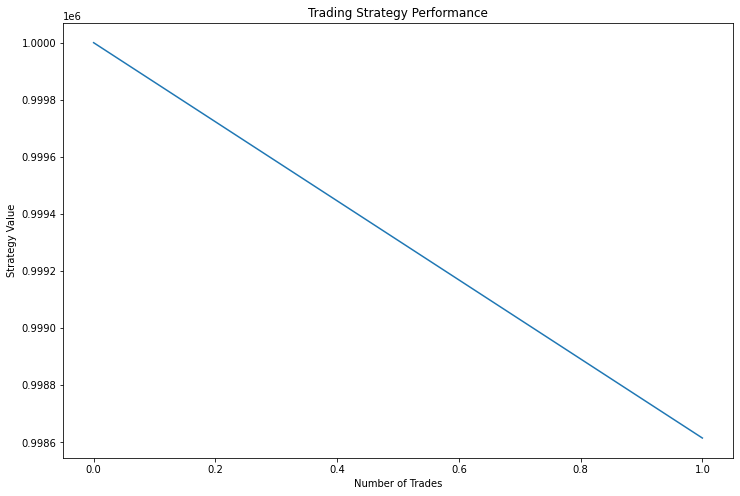

In [8]:
strategy.plot_results()

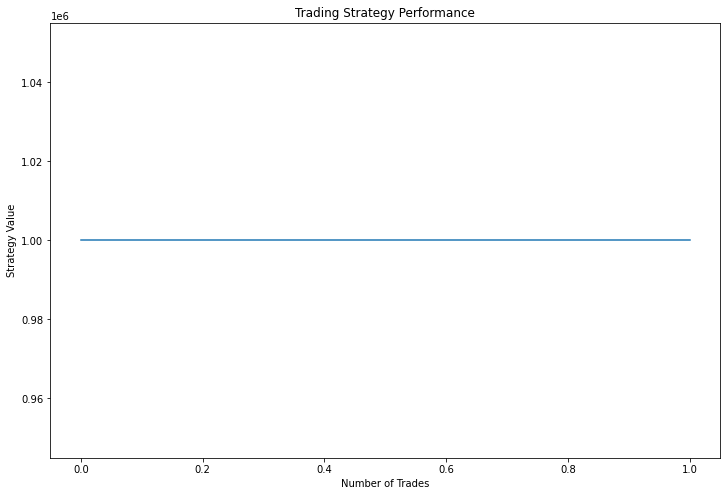

In [6]:
strategy = TradingStrategy()

# 2. Cargar Datos
strategy.load_data('5m')  # Asegúrate de que '5m' corresponde a uno de los mapeos en `self.file_mapping`

# 3. Calcular Indicadores
strategy.calculate_indicators()

# 4. Definir Señales de Compra y Venta
strategy.define_buy_sell_signals()

# 5. Activar Indicadores
strategy.activate_indicator('RSI')
strategy.activate_indicator('SMA')
strategy.activate_indicator('MACD')
strategy.activate_indicator('SAR')  
strategy.activate_indicator('ADX')  

# 6. Ejecutar Operaciones
strategy.execute_trades()

# 7. Visualizar Resultados
strategy.plot_results()

In [ ]:
strategy = TradingStrategy()

# 2. Cargar Datos
strategy.load_data('5m')  # Asegúrate de que '5m' corresponde a uno de los mapeos en `self.file_mapping`

# 3. Calcular Indicadores
strategy.calculate_indicators()

# 4. Definir Señales de Compra y Venta
strategy.define_buy_sell_signals()

# 5. Activar Indicadores
strategy.activate_indicator('RSI')
strategy.activate_indicator('SMA')
strategy.activate_indicator('MACD')
strategy.activate_indicator('SAR')  # Asegúrate de que 'SAR' está implementado en `calculate_indicators` y `define_buy_sell_signals`
strategy.activate_indicator('ADX')  # Asegúrate de que 'ADX' está implementado en `calculate_indicators` y `define_buy_sell_signals`

# 6. Ejecutar Operaciones
strategy.execute_trades()

# 7. Visualizar Resultados
strategy.plot_results()

### Bolinger Bands

In [10]:
data_2 = pd.read_csv('data/aapl_1m_train.csv')
data_2 = data_2.dropna()
data_2

,Unnamed: 0,Timestamp,Gmtoffset,Datetime,Open,High,Low,Close,Volume
0,0,1672736400,0,2023-01-03 09:00:00,130.280,131.000,130.280,131.00,8174
1,1,1672736460,0,2023-01-03 09:01:00,130.870,131.170,130.870,131.10,8820
2,2,1672736520,0,2023-01-03 09:02:00,131.180,131.240,131.170,131.17,2112
3,3,1672736580,0,2023-01-03 09:03:00,131.190,131.290,131.190,131.28,3888
4,4,1672736640,0,2023-01-03 09:04:00,131.280,131.460,131.280,131.46,5984
...,...,...,...,...,...,...,...,...,...
136864,40473,1693526100,0,2023-08-31 23:55:00,188.090,188.100,188.080,188.09,301
136865,40474,1693526160,0,2023-08-31 23:56:00,188.100,188.100,188.080,188.09,335
136866,40475,1693526220,0,2023-08-31 23:57:00,188.095,188.140,188.095,188.12,2391
136867,40476,1693526280,0,2023-08-31 23:58:00,188.130,188.150,188.125,188.15,1416


In [11]:
df = data_2.copy()

In [12]:
df

,Unnamed: 0,Timestamp,Gmtoffset,Datetime,Open,High,Low,Close,Volume
0,0,1672736400,0,2023-01-03 09:00:00,130.280,131.000,130.280,131.00,8174
1,1,1672736460,0,2023-01-03 09:01:00,130.870,131.170,130.870,131.10,8820
2,2,1672736520,0,2023-01-03 09:02:00,131.180,131.240,131.170,131.17,2112
3,3,1672736580,0,2023-01-03 09:03:00,131.190,131.290,131.190,131.28,3888
4,4,1672736640,0,2023-01-03 09:04:00,131.280,131.460,131.280,131.46,5984
...,...,...,...,...,...,...,...,...,...
136864,40473,1693526100,0,2023-08-31 23:55:00,188.090,188.100,188.080,188.09,301
136865,40474,1693526160,0,2023-08-31 23:56:00,188.100,188.100,188.080,188.09,335
136866,40475,1693526220,0,2023-08-31 23:57:00,188.095,188.140,188.095,188.12,2391
136867,40476,1693526280,0,2023-08-31 23:58:00,188.130,188.150,188.125,188.15,1416


In [13]:
df = df.drop(['Unnamed: 0', 'Timestamp', 'Gmtoffset'], axis=1)

In [14]:
df

,Datetime,Open,High,Low,Close,Volume
0,2023-01-03 09:00:00,130.280,131.000,130.280,131.00,8174
1,2023-01-03 09:01:00,130.870,131.170,130.870,131.10,8820
2,2023-01-03 09:02:00,131.180,131.240,131.170,131.17,2112
3,2023-01-03 09:03:00,131.190,131.290,131.190,131.28,3888
4,2023-01-03 09:04:00,131.280,131.460,131.280,131.46,5984
...,...,...,...,...,...,...
136864,2023-08-31 23:55:00,188.090,188.100,188.080,188.09,301
136865,2023-08-31 23:56:00,188.100,188.100,188.080,188.09,335
136866,2023-08-31 23:57:00,188.095,188.140,188.095,188.12,2391
136867,2023-08-31 23:58:00,188.130,188.150,188.125,188.15,1416


In [15]:
window = 30
no_of_std = 1.5

# calculate rolling mean and standard deviation
rolling_mean = df['Close'].rolling(window).mean()
rolling_std = df['Close'].rolling(window).std()

# create two new DataFrame columns to hold values of upper and lower Bollinger bands
df['Rolling Mean'] = rolling_mean
df['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
df['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)


In [16]:
df.tail()

,Datetime,Open,High,Low,Close,Volume,Rolling Mean,Bollinger High,Bollinger Low
136864,2023-08-31 23:55:00,188.090,188.100,188.080,188.09,301,188.118360,188.209709,188.027011
136865,2023-08-31 23:56:00,188.100,188.100,188.080,188.09,335,188.120360,188.208633,188.032087
136866,2023-08-31 23:57:00,188.095,188.140,188.095,188.12,2391,188.124527,188.205350,188.043704
136867,2023-08-31 23:58:00,188.130,188.150,188.125,188.15,1416,188.129527,188.202475,188.056579
136868,2023-08-31 23:59:00,188.130,188.135,188.020,188.06,1754,188.130193,188.201422,188.058964


<Figure size 720x432 with 0 Axes>

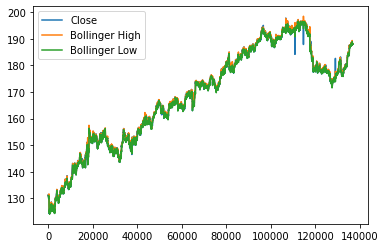

In [17]:
plt.figure(figsize=(10, 6))

# Plotea las columnas Close, Bollinger High y Bollinger Low
df[['Datetime', 'Close', 'Bollinger High', 'Bollinger Low']].plot()

# Muestra el gráfico
plt.show()

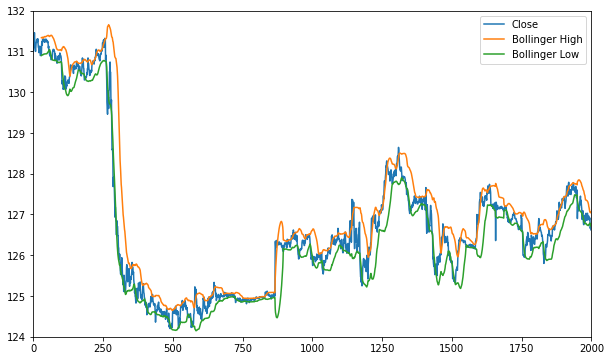

In [18]:
ax = df[['Close', 'Bollinger High', 'Bollinger Low']].plot(figsize=(10, 6))

# Muestra el gráfico
plt.ylim(124,132)
plt.xlim(0,2000)
plt.show()